# Entrainement experiments with $k-\epsilon$ model 

The purpose of this notbook is to focus on the scaling of the mixed layer deepend by mechanical stress without thermal forcing (cf Pollard 1972) and try to extend this scaling behond the 1st inertial oscilation 

In [1]:
# load required packages
import netCDF4 as nc
import matplotlib.pyplot as plt
import cmocean 
import numpy as np
from matplotlib.ticker import MaxNLocator
from matplotlib import colors
import xarray as xr

In [2]:
# Load variable from file

file_norot        = 'entrainment_norot.nc'
file_norot        = 'entrainment_norot_10j.nc'
entrainment_norotdata = nc.Dataset(file_norot)         #  I use netCDF4 to convert the time date in second 
entrainment_norot = xr.open_dataset(file_norot)        #  I prefer use Xarray because it allow to better visualize the data (variable, shapes etc..)

# model parameters (have to be consistent with gotm.yaml)
NN0     = 1.0e-4                    # initial NN 
lat_norot     = 0.0                      # latitude 
tx      = 0.1027                    # surface stress

# derived parameters
f_norot       = 4.*np.pi/86400.*np.sin(np.pi*lat_norot/180.)      # Coriolis parameter
us      = np.sqrt(tx/1027.)                           # surface friction velocity
g=9.81

Simulation **sans rotation**
- durée de simulation 48h
- Model de fermeture $k-\epsilon$


In [3]:
file_rot        = 'entrainment_rot.nc'
file_rot        = 'entrainment_rot_10j.nc'
entrainment_rotdata = nc.Dataset(file_rot)         #  I use netCDF4 to convert the time date in second 
entrainment_rot = xr.open_dataset(file_rot)        #  I prefer use Xarray because it allow to better visualize the data (variable, shapes etc..)

# model parameters (have to be consistent with gotm.yaml)
NN0     = 1.0e-4                    # initial NN 
lat_rot     = 45.0                      # latitude 
tx      = 0.1027                    # surface stress

# derived parameters
f_rot       = 4.*np.pi/86400.*np.sin(np.pi*lat_rot/180.)      # Coriolis parameter
us      = np.sqrt(tx/1027.)                           # surface friction velocity

In [4]:
def coriolis (lat):
    return 4.*np.pi/86400.*np.sin(np.pi*lat/180.) 

Simulation **avec rotation**
- durée de simulation 48h
- Model de fermeture $k-\epsilon$
- Latitude $45°$


In [5]:
entrainment_norot

<xarray.Dataset>
Dimensions:              (time: 217, lon: 1, lat: 1, z: 200, zi: 201)
Coordinates:
  * time                 (time) datetime64[ns] 2005-01-01 ... 2005-01-10
  * lon                  (lon) float32 0.0
  * lat                  (lat) float32 0.0
    z                    (time, z, lat, lon) float32 ...
    zi                   (time, zi, lat, lon) float32 ...
Data variables: (12/117)
    zeta                 (time, lat, lon) float32 ...
    u_taus               (time, lat, lon) float32 ...
    u10                  (time, lat, lon) float32 ...
    v10                  (time, lat, lon) float32 ...
    airt                 (time, lat, lon) float32 ...
    airp                 (time, lat, lon) float32 ...
    ...                   ...
    us0                  (time, lat, lon) float32 ...
    vs0                  (time, lat, lon) float32 ...
    ds                   (time, lat, lon) float32 ...
    Ekin                 (time, lat, lon) float32 ...
    Epot                 (time, lat, lon) float32 ...
    Eturb                (time, lat, lon) float32 ...
Attributes:
    title:    shear-driven entrainment
    comment:  file created by flexout - https://github.com/BoldingBruggeman/f...

### Extraction of the variables

In [6]:
# extract variable for rotation
z           = entrainment_norot.variables['z'][:, :, 0, 0]
zi          = entrainment_norot.variables['zi'][:, :, 0, 0]
t           = entrainment_norotdata.variables['time'][:]
u_norot       = entrainment_norot.variables['u'][:, :, 0, 0]
v_norot       = entrainment_norot.variables['v'][:, :, 0, 0]
NN_norot      = entrainment_norotdata.variables['NN'][:, :, 0, 0]
u_taus_norot  = entrainment_norot.variables['u_taus'][:, 0, 0]
h_norot       = entrainment_norot.variables['mld_surf'][: , 0, 0]
rho_norot     = entrainment_norot.variables['rho'][: ,:, 0, 0]
Ekin_norot     = entrainment_norot.variables['Ekin'][: , 0, 0]
Epot_norot     = entrainment_norot.variables['Epot'][: , 0, 0]
Eturb_norot    = entrainment_norot.variables['Eturb'][: , 0, 0]
tke_norot      = entrainment_norot.variables['tke'][:, :, 0, 0]
eps_norot      = entrainment_norot.variables['eps'][:, :, 0, 0]
P_norot      = entrainment_norot.variables['P'][:, :, 0, 0]
G_norot      = entrainment_norot.variables['G'][:, :, 0, 0]
num_norot      = entrainment_norot.variables['num'][:, :, 0, 0]
nuh_norot     = entrainment_norot.variables['nuh'][:, :, 0, 0]
nus_norot     = entrainment_norot.variables['nus'][:, :, 0, 0]
avh_norot     = entrainment_norot.variables['avh'][:, :, 0, 0]


# extract variable for no rotation
z           = entrainment_rot.variables['z'][:, :, 0, 0]
zi          = entrainment_rot.variables['zi'][:, :, 0, 0]
t           = entrainment_rotdata.variables['time'][:]
u_rot       = entrainment_rot.variables['u'][:, :, 0, 0]
v_rot       = entrainment_rot.variables['v'][:, :, 0, 0]
nuh_rot     = entrainment_rot.variables['nuh'][:, :, 0, 0]
NN_rot      = entrainment_rotdata.variables['NN'][:, :, 0, 0]
u_taus_rot  = entrainment_rot.variables['u_taus'][:, 0, 0]
h_rot       = entrainment_rot.variables['mld_surf'][:, 0, 0]
rho_rot     = entrainment_rot.variables['rho'][: ,:, 0, 0]
T_rot     = entrainment_rot.variables['temp'][: ,:, 0, 0]
Ekin_rot     = entrainment_rot.variables['Ekin'][: , 0, 0]
Epot_rot     = entrainment_rot.variables['Epot'][: , 0, 0]
Eturb_rot    = entrainment_rot.variables['Eturb'][: , 0, 0]
Rig_rot           = entrainment_rot.variables['Rig'][: ,:, 0, 0]
Rif_rot           = entrainment_rot.variables['xRf'][: ,:, 0, 0]
tke_rot      = entrainment_rot.variables['tke'][:, :, 0, 0]
eps_rot      = entrainment_rot.variables['eps'][:, :, 0, 0]
P_rot      = entrainment_rot.variables['P'][:, :, 0, 0]
G_rot      = entrainment_rot.variables['G'][:, :, 0, 0]
num_rot      = entrainment_rot.variables['num'][:, :, 0, 0]
nuh_rot     = entrainment_rot.variables['nuh'][:, :, 0, 0]
nus_rot     = entrainment_rot.variables['nus'][:, :, 0, 0]
avh_rot     = entrainment_rot.variables['avh'][:, :, 0, 0]


In [7]:
u_taus_rot

<xarray.Variable (time: 217)>
[217 values with dtype=float32]
Attributes:
    units:      m/s
    long_name:  surface friction velocity
    path:       /surface

In [8]:
# set the plot parameter 
NT      = t.size
iPlt    = NT-1

# water depth
H       = - z[iPlt,0]
hour = 3600
bprops = {'facecolor': 'white', 'edgecolor': 'none', 'pad': 2}     # text label box properties

# 1st Task : Evolution of the mixed layer depth with/without rotation and comparaison to the Pollard's scaling 

Tips: 
- Plot the time evolution of h (the mixed layer depth) in log-log and see if there is multiple regime
- Plot $u_s$ at the surfece in function of time 
- It would be interesting to plot also the evolution of the overall Richardson number
- Try the experiment with an already formed mixed layer (greater than $h_{max}$ in Pollard,1973
- Plot the evolution of KE and PE
- Make an diagnosis of the evolution and the echanges of the energy (KE,TKE,PE,Dissipation)
- And A more precise diognosis of the TKE terms (dissipation, production) 

## Time evolution of $h$  

Faire apparaitre les calcul de Pollard et la longueur $l_{rot}$ (longueur a partire de laquel la rotation se fait ressentire

### Entrainment depth from Pollard et al., 1973

In [9]:
# entrainment depth without rotation (Pollard et al., 1973; Price, 1979)
Rv      = 0.6    # bulk Richardson number  (set by Price 1979) 
h_poll_norot       = (2*Rv)**0.25 * us * (t/np.sqrt(NN0))**0.5



# entrainment depth with rotation (Pollard et al., 1973)
Rv      = 1    # bulk Richardson number
h_poll_rot       = us * ( ( 4*Rv*(1.0 - np.cos(f_rot * t)) ) / ( f_rot**2.0 * NN0 ) )**0.25
h_ref_rot   = (8*Rv)**0.25 * us / ( f_rot*np.sqrt(NN0) )**0.5
h_poll_rot[np.where(t > np.pi/f_rot)] = h_ref_rot


# Lmax 
lmax = np.ones(t.shape)*(np.sqrt(tx))*f_rot


### Plot of Time evolution of Entrainment Depth

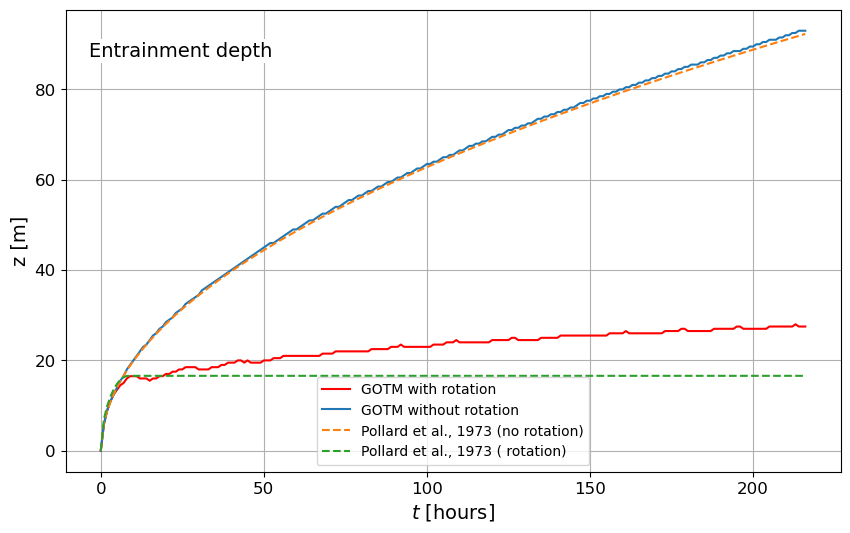

In [10]:
fig,ax=  plt.subplots(1, figsize=(10, 6))
ax.plot(t/hour,h_rot.data,color= 'r', label = 'GOTM with rotation' )
ax.plot(t/hour,h_norot.data, label = 'GOTM without rotation')
ax.plot(t/hour,h_poll_norot, '--', label = 'Pollard et al., 1973 (no rotation)' )
ax.plot(t/hour,h_poll_rot,'--', label = 'Pollard et al., 1973 ( rotation)')
#ax.plot(t/hour,lmax,color='k', label = '$L_{max}=u^*f$')
ax.legend(loc='lower center')
ax.text(0.03, 0.89, 'Entrainment depth', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax.transAxes, fontsize=14, bbox=bprops)
ax.set_ylabel('z [m]', fontsize=14)
ax.set_xlabel('$t$ [hours]', fontsize=14)
ax.tick_params(axis='both', labelsize=12)
ax.grid()





### Plot of Time evolution of Entrainment Depth In Log-Log

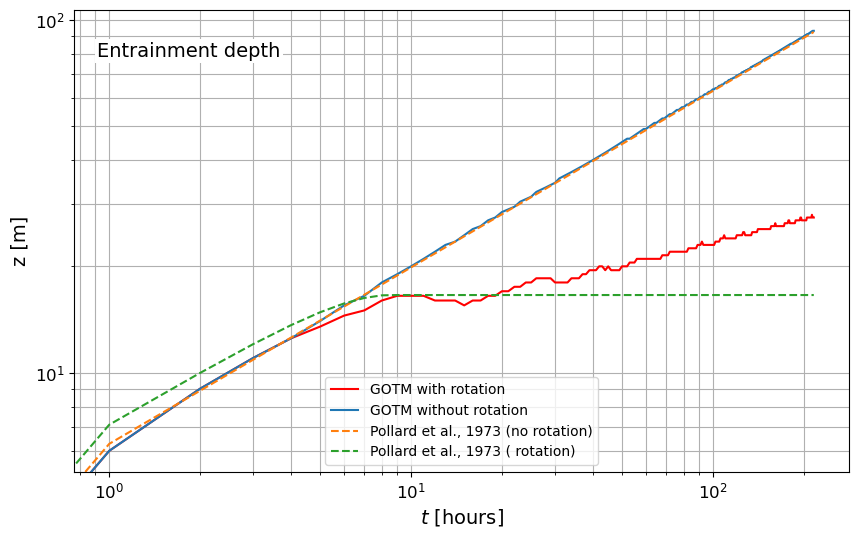

In [11]:
fig,ax=  plt.subplots(1, figsize=(10, 6))
ax.plot(t/hour,h_rot.data,color= 'r', label = 'GOTM with rotation' )
ax.plot(t/hour,h_norot.data, label = 'GOTM without rotation')
ax.plot(t/hour,h_poll_norot, '--', label = 'Pollard et al., 1973 (no rotation)' )
ax.plot(t/hour,h_poll_rot,'--', label = 'Pollard et al., 1973 ( rotation)')
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(loc='lower center')
ax.text(0.03, 0.89, 'Entrainment depth', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax.transAxes, fontsize=14, bbox=bprops)
ax.set_ylabel('z [m]', fontsize=14)
ax.set_xlabel('$t$ [hours]', fontsize=14)
ax.tick_params(axis='both', labelsize=12)
ax.grid(which='both')


In [12]:
NN_rot

masked_array(
  data=[[0.00000000e+00, 1.02027203e-04, 1.02027967e-04, ...,
         1.02273014e-04, 1.02273829e-04, 0.00000000e+00],
        [0.00000000e+00, 1.01796868e-04, 1.02027698e-04, ...,
         1.22470410e-05, 1.02572021e-05, 0.00000000e+00],
        [0.00000000e+00, 1.01592173e-04, 1.02027028e-04, ...,
         7.50810250e-06, 6.57418968e-06, 0.00000000e+00],
        ...,
        [0.00000000e+00, 7.17408766e-05, 9.64050341e-05, ...,
         1.06989049e-07, 9.96624792e-08, 0.00000000e+00],
        [0.00000000e+00, 7.16457871e-05, 9.63651182e-05, ...,
         1.05807132e-07, 9.85641222e-08, 0.00000000e+00],
        [0.00000000e+00, 7.15510032e-05, 9.63251514e-05, ...,
         1.03274175e-07, 9.62306359e-08, 0.00000000e+00]],
  mask=False,
  fill_value=1e+20,
  dtype=float32)

/var/folders/gl/qr_d872d4sj6k_rm1k6tskj80000gq/T/ipykernel_44707/3095748833.py:27: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax1.set_ylim(0, 40)


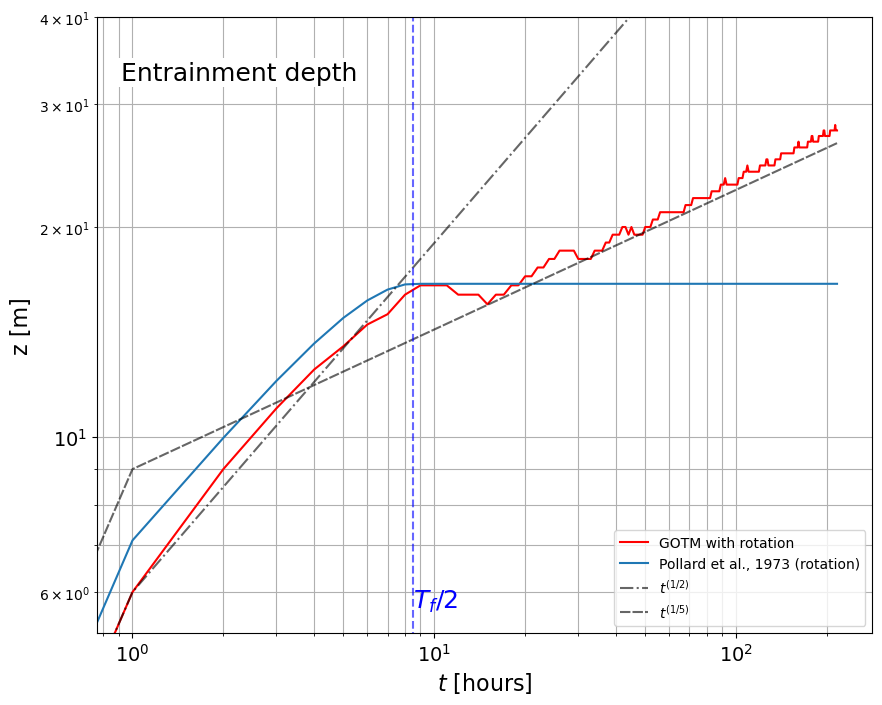

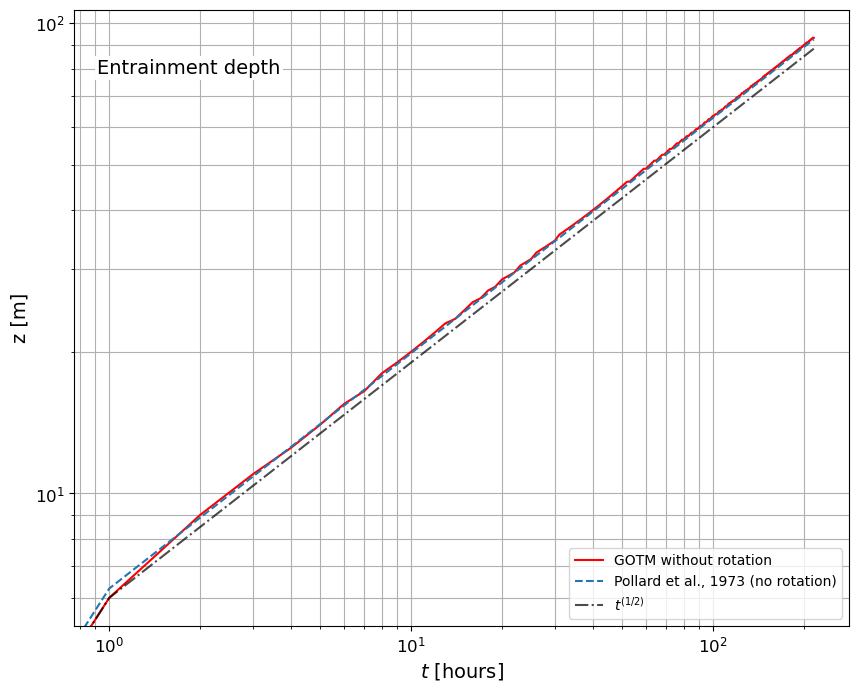

In [13]:
t_12 = np.sqrt(t/hour)*6
#t_14 = (t/hour)**(1/4)*6
t_15 = (t/hour)**(1/5)*9

fig, ax1 = plt.subplots(figsize=(10, 8))

# With rotation
ax1.plot(t/hour, h_rot.data, color='r', label='GOTM with rotation')
ax1.plot(t/hour, h_poll_rot, label='Pollard et al., 1973 (rotation)')
ax1.plot(t/hour, t_12,color='k',alpha=0.6, label='$t^{(1/2)}$', linestyle='-.')
ax1.plot(t/hour, t_15,color='k',alpha=0.6, label='$t^{(1/5)}$', linestyle=(0, (5, 1)))
#ax1.vlines(np.pi / f_rot / hour, 0, 40, alpha=0.6,color='blue', linestyle='--', label='Vertical Bar')
tf_position=np.pi / f_rot / hour
ax1.vlines(tf_position, 0, 40,alpha=0.6, color='blue', linestyle='--')

# Ajouter une étiquette
ax1.text(tf_position, 5.7, '$T_f/2$', color='blue', fontsize=18, ha='left')

ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.legend(loc='lower right')
ax1.text(0.03, 0.89, 'Entrainment depth', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax1.transAxes, fontsize=18, bbox=bprops)
ax1.set_ylabel('z [m]', fontsize=16)
ax1.set_xlabel('$t$ [hours]', fontsize=16)
ax1.tick_params(axis='both', labelsize=14)
ax1.set_ylim(0, 40)

ax1.grid(which='both')

plt.savefig('scaling_law_h')
plt.show()


fig, ax2 = plt.subplots(figsize=(10, 8))


# Without rotation
ax2.plot(t/hour, h_norot.data,color='r', label='GOTM without rotation')
ax2.plot(t/hour, h_poll_norot, '--', label='Pollard et al., 1973 (no rotation)')
ax2.plot(t/hour, t_12,color='k',alpha=0.7, label='$t^{(1/2)}$', linestyle='-.')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.legend(loc='lower right')
ax2.text(0.03, 0.89, 'Entrainment depth', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax2.transAxes, fontsize=14, bbox=bprops)
ax2.set_ylabel('z [m]', fontsize=14)
ax2.set_xlabel('$t$ [hours]', fontsize=14)
ax2.tick_params(axis='both', labelsize=12)
ax2.grid(which='both')



## Sensibility of h to coriolis parameter


In [14]:
4.*np.pi/86400.*np.sin(np.pi*90/180.)

0.0001454441043328608

In [15]:
day = 3600*24
t= np.pi/(4.*np.pi/86400.*np.sin(np.pi*0.5/180.))
t,t/day

(2475209.091170815, 28.648253370032577)


| f | Latitude | Inertial period |Inertial period |
| --- | --- | --- |--- |
| $2.5 \times 10^{-6}$ | $1$| $1.2 \times 10^{6}$ [sec]| $14j$|
| $5 \times 10^{-6}$ | $2$| $6.1 \times 10^{5}$ [sec]| $7j$|
| $1.2 \times 10^{-5}$ | $5$| $2.4 \times 10^{5}$ [sec]| $2j$|
| $4.9 \times 10^{-5}$ | $20$| $6.3 \times 10^{4}$ [sec]| $0.73j$|
| $1 \times 10^{-4}$ | $45$| $3 \times 10^{4}$ [sec]| $0.35j$|
| $ 1.45\times 10^{-4}$ | $90$| $2.1 \times 10^{4}$ [sec]| $0.25j$|

In [16]:
f = ['$f=2,5 . 10^{-6}$','$f=5 . 10^{-6}$','$f=1,2 . 10^{-5}$','$f=4,9 . 10^{-5}$','$f=1 . 10^{-4}$','$f=1,45 . 10^{-4}$']

f1= coriolis(1)
f2= coriolis(2)
f5= coriolis(5)
f20= coriolis(20)
f45= coriolis(45)
f90= coriolis(90)

fi =[f1,f2,f5,f20,f45,f90]


### Import the data

In [17]:
file_1deg      = 'entrainment_1deg.nc'
entrainment_1degdata = nc.Dataset(file_1deg)         #  I use netCDF4 to convert the time date in second 
entrainment_1deg = xr.open_dataset(file_1deg)        #  I prefer use Xarray because it allow to better visualize the data (variable, shapes etc..)

file_2deg      = 'entrainment_2deg.nc'
entrainment_2deg = xr.open_dataset(file_2deg)  

file_5deg      = 'entrainment_5deg.nc'
entrainment_5deg = xr.open_dataset(file_5deg)  

file_20deg      = 'entrainment_20deg.nc'
entrainment_20deg = xr.open_dataset(file_20deg)  

file_45deg      = 'entrainment_45deg.nc'
entrainment_45deg = xr.open_dataset(file_45deg)  

file_90deg      = 'entrainment_90deg.nc'
entrainment_90deg = xr.open_dataset(file_90deg)  


- Extension verticale : 500 m 
- resolution verticale : 50 cm
- Temps de simulation : 6 mois -> 190j
- Brunt-Väisälä frequency : 1.00000000E-04 
- Stress surface:  $\tau$  = 0.1027  

### Extraction des donnés :

In [18]:
z_long           = entrainment_1deg.variables['z'][:, :, 0, 0]
zi_long          = entrainment_1deg.variables['zi'][:, :, 0, 0]
t_long           = entrainment_1degdata.variables['time'][:]
h_1deg       = entrainment_1deg.variables['mld_surf'][:, 0, 0]
h_2deg       = entrainment_2deg.variables['mld_surf'][:, 0, 0]
h_5deg       = entrainment_5deg.variables['mld_surf'][:, 0, 0]
h_20deg       = entrainment_20deg.variables['mld_surf'][:, 0, 0]
h_45deg       = entrainment_45deg.variables['mld_surf'][:, 0, 0]
h_90deg       = entrainment_90deg.variables['mld_surf'][:, 0, 0]

u_1deg       = entrainment_1deg.variables['u'][:, :, 0, 0]
u_2deg       = entrainment_2deg.variables['u'][:, :, 0, 0]
u_5deg       = entrainment_5deg.variables['u'][:, :, 0, 0]
u_20deg       = entrainment_20deg.variables['u'][:, :, 0, 0]
u_45deg       = entrainment_45deg.variables['u'][:, :, 0, 0]
u_90deg       = entrainment_90deg.variables['u'][:, :, 0, 0]

nu_1deg       = entrainment_1deg.variables['num'][:, :, 0, 0]
nu_2deg       = entrainment_2deg.variables['num'][:, :, 0, 0]
nu_5deg       = entrainment_5deg.variables['num'][:, :, 0, 0]
nu_20deg       = entrainment_20deg.variables['num'][:, :, 0, 0]
nu_45deg       = entrainment_45deg.variables['num'][:, :, 0, 0]
nu_90deg       = entrainment_90deg.variables['num'][:, :, 0, 0]


P_90deg      = entrainment_90deg.variables['P'][:, :, 0, 0]
G_90deg      = entrainment_90deg.variables['G'][:, :, 0, 0]

h_f =[h_1deg,h_2deg,h_5deg,h_20deg,h_45deg,h_90deg]

In [19]:
np.shape(h_1deg)

(3625,)

In [20]:
us**2 

0.0001

In [21]:
u_ek_45deg = us/(np.sqrt(2*f45*nu_45deg[:,-1]))


/Users/maxcoppin/anaconda3/envs/gotm/lib/python3.9/site-packages/xarray/core/computation.py:808: RuntimeWarning: divide by zero encountered in divide
  result_data = func(*input_data)


In [22]:
nu_45deg[:,-1]

<xarray.Variable (time: 3625)>
[3625 values with dtype=float32]
Attributes:
    units:          m2/s
    long_name:      turbulent diffusivity of momentum
    standard_name:  ??
    path:           /turbulence

In [23]:
def it_TF2 (nb,f):
    T_f = 2*np.pi /f
    idt = nb*T_f
    id = np.argmin(np.abs(t-idt))
    return id

Tfi = np.zeros(6,int)
i=0
for fn in fi : 
    Tfi[i] = it_TF2(1,fn)
    i+=1
Tfi

array([0, 0, 0, 0, 0, 0])

In [24]:
###### Indice de l'interface de la couche de mélange et zone stablement stratifié #### 
u_1deg       = entrainment_1deg.variables['u'][:, :, 0, 0]
u_2deg       = entrainment_2deg.variables['u'][:, :, 0, 0]
u_5deg       = entrainment_5deg.variables['u'][:, :, 0, 0]
u_20deg       = entrainment_20deg.variables['u'][:, :, 0, 0]
u_45deg       = entrainment_45deg.variables['u'][:, :, 0, 0]
u_90deg       = entrainment_90deg.variables['u'][:, :, 0, 0]

idh_1deg = np.zeros(len(t_long),dtype=np.int64)
for i in range (len(t_long)):
    idh_1deg[i]= np.argmin(np.abs(z_long[i].data+h_1deg[i].data))+6#   6 par defaut ->  Dans le diagnostique pur epsilon, 6 est la valeure la plus adaptée
idh_2deg = np.zeros(len(t_long),dtype=np.int64)
for i in range (len(t_long)):
    idh_2deg[i]= np.argmin(np.abs(z_long[i].data+h_2deg[i].data))+6#   6 par defaut ->  Dans le diagnostique pur epsilon, 6 est la valeure la plus adaptée
idh_5deg = np.zeros(len(t_long),dtype=np.int64)
for i in range (len(t_long)):
    idh_5deg[i]= np.argmin(np.abs(z_long[i].data+h_5deg[i].data))+6#   6 par defaut ->  Dans le diagnostique pur epsilon, 6 est la valeure la plus adaptée

idh_20deg = np.zeros(len(t_long),dtype=np.int64)
for i in range (len(t_long)):
    idh_20deg[i]= np.argmin(np.abs(z_long[i].data+h_20deg[i].data))+6#   6 par defaut ->  Dans le diagnostique pur epsilon, 6 est la valeure la plus adaptée

idh_45deg = np.zeros(len(t_long),dtype=np.int64)
for i in range (len(t_long)):
    idh_45deg[i]= np.argmin(np.abs(z_long[i].data+h_45deg[i].data))+6#   6 par defaut ->  Dans le diagnostique pur epsilon, 6 est la valeure la plus adaptée

idh_90deg = np.zeros(len(t_long),dtype=np.int64)
for i in range (len(t_long)):
    idh_90deg[i]= np.argmin(np.abs(z_long[i].data+h_90deg[i].data))+6#   6 par defaut ->  Dans le diagnostique pur epsilon, 6 est la valeure la plus adaptée



#### Calcul de la u  pres de l'interface ######
ui_1deg= np.zeros((len(t_long))); ui_5deg= np.zeros((len(t_long))); ui_45deg= np.zeros((len(t_long)))
ui_2deg= np.zeros((len(t_long))); ui_20deg= np.zeros((len(t_long))); ui_90deg= np.zeros((len(t_long)))
for i in range (1,len(t_long)):
    j1 = idh_1deg[i]
    j2 = idh_2deg[i]
    j5 = idh_5deg[i]
    j20 = idh_20deg[i]
    j45 = idh_45deg[i]
    j90 = idh_90deg[i]
    
    ui_1deg[i] = u_1deg[i,j1]
    ui_2deg[i] = u_2deg[i,j2]
    ui_5deg[i] = u_5deg[i,j5]
    ui_20deg[i] = u_20deg[i,j20]
    ui_45deg[i] = u_45deg[i,j45]
    ui_90deg[i] = u_90deg[i,j90]


def moyenne_variable_voisinage(variable, indices_periode):
    moyennes = []

    # Calculer la moitié de la période inertielle
    demi_periode = int(np.ceil(np.mean(indices_periode) / 2))

    # Itérer sur les indices de la variable
    for i in range(len(variable)):
        # Déterminer les indices du voisinage en tenant compte des bords
        debut_voisinage = max(0, i - demi_periode)
        fin_voisinage = min(len(variable), i + demi_periode + 1)

        # Calculer la moyenne du voisinage
        moyenne_voisinage = np.mean(variable[debut_voisinage:fin_voisinage])
        moyennes.append(moyenne_voisinage)

    return moyennes


u1 = moyenne_variable_voisinage(ui_1deg[:], 2*Tfi[0])

u2 = moyenne_variable_voisinage(ui_2deg[:], 2*Tfi[1])
u5 = moyenne_variable_voisinage(ui_5deg[:], 2*Tfi[2])
u20 = moyenne_variable_voisinage(ui_20deg[:], 2*Tfi[3])
u45 = moyenne_variable_voisinage(ui_45deg[:], 2*Tfi[4])
u90 = moyenne_variable_voisinage(ui_90deg[:], 2*Tfi[5])

In [25]:
np.shape(u1)

(3625,)

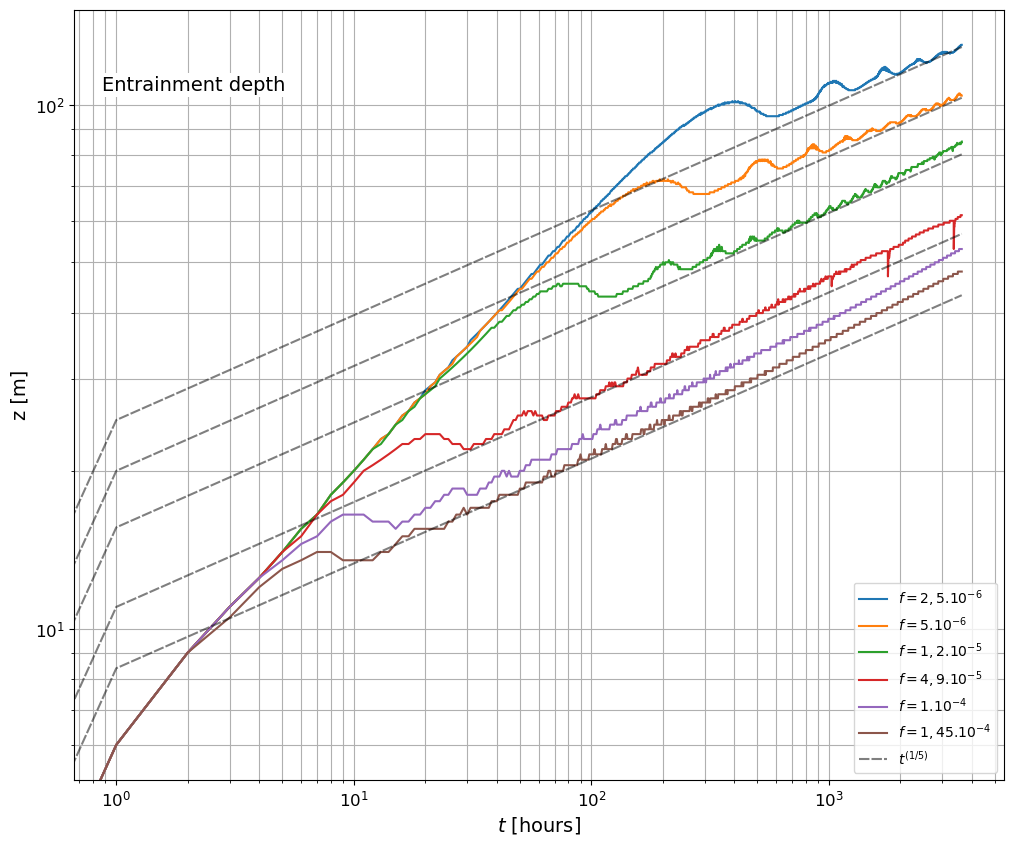

In [26]:
t_12 = np.sqrt(t_long/hour)*6
#t_15 = (t/hour)**(1/5)*6
t_15 = (t_long/hour)**(1/5)

fig,ax=  plt.subplots(1, figsize=(12,10))

for i in range (len(h_f)):
    
    ax.plot(t_long/hour,h_f[i].data, label = f[i] )
ax.plot(t_long/hour, t_15*11,color='k',alpha=0.5, label='$t^{(1/5)}$', linestyle=(0, (5, 1)))
ax.plot(t_long/hour, t_15*8.4,color='k',alpha=0.5, linestyle=(0, (5, 1)))
ax.plot(t_long/hour, t_15*20,color='k',alpha=0.5, linestyle=(0, (5, 1)))
ax.plot(t_long/hour, t_15*15.6,color='k',alpha=0.5, linestyle=(0, (5, 1)))
ax.plot(t_long/hour, t_15*25,color='k',alpha=0.5, linestyle=(0, (5, 1)))
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(loc='lower right')
ax.text(0.03, 0.89, 'Entrainment depth', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax.transAxes, fontsize=14, bbox=bprops)
ax.set_ylabel('z [m]', fontsize=14)
ax.set_xlabel('$t$ [hours]', fontsize=14)
ax.tick_params(axis='both', labelsize=12)
ax.grid(which='both')
plt.savefig('dependance_h(f).png')
plt.show()

#### Adimentionized

In [27]:
# Maximum h : prediction of Pollard 

f_deg= [2.5e-6, 5e-6, 1.2e-5,4.9e-5,1e-4,1.45e-4]
# entrainment depth with rotation (Pollard et al., 1973)
h_max_poll = np.zeros(6)
Rv      = 1    # bulk Richardson number
for i in range (h_max_poll.size):
    #h_max_poll[i] = us * ( ( 4*Rv*(1.0 - np.cos(f_deg[i] * t)) ) / ( f_deg[i]**2.0 * NN0 ) )**0.25
    h_max_poll[i]  = (8*Rv)**0.25 * us / ( f_deg[i]*np.sqrt(NN0) )**0.5
#h_ref_rot   = (8*Rv)**0.25 * us / ( f_rot*np.sqrt(NN0) )**0.5






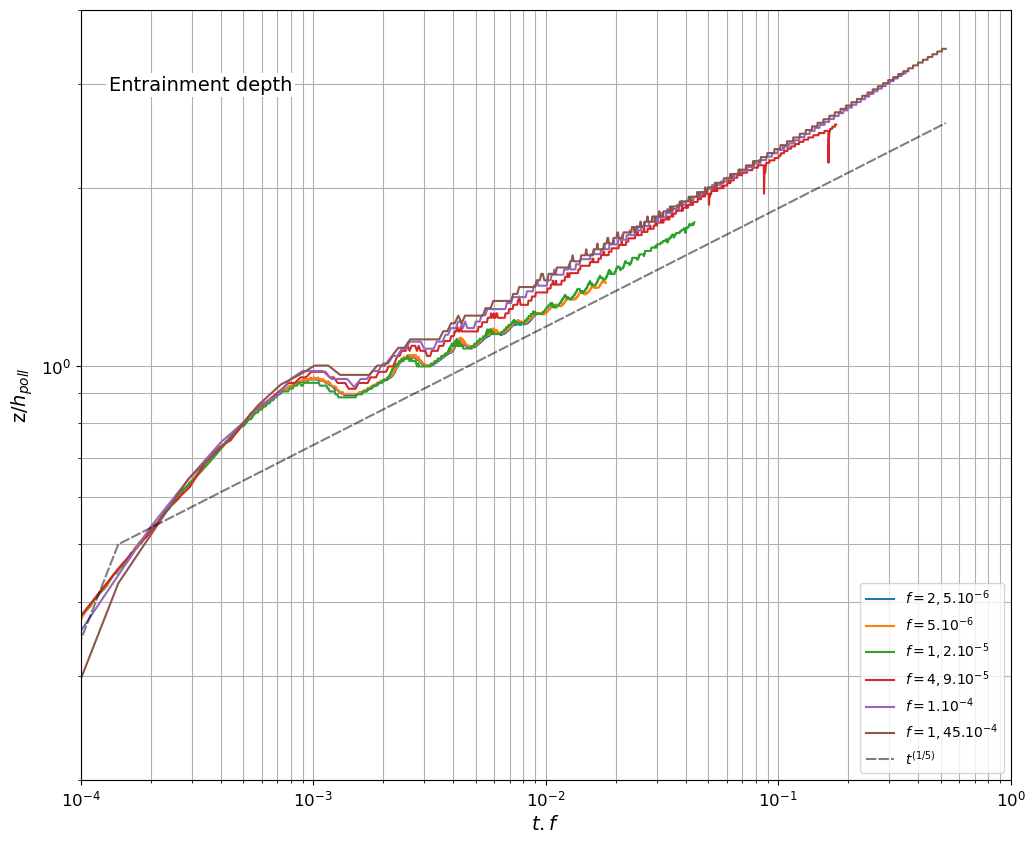

In [28]:
t_12 = np.sqrt(t_long/hour)*6
#t_15 = (t/hour)**(1/5)*6
t_15 = (t_long/hour)**(1/5)


fig,ax=  plt.subplots(1, figsize=(12,10))

for i in range (len(h_f)):
    
    ax.plot(t_long/hour*f_deg[i],h_f[i].data/h_max_poll[i], label = f[i] )
ax.plot(t_long/hour*f_deg[5], t_15/2,color='k',alpha=0.5, label='$t^{(1/5)}$', linestyle=(0, (5, 1)))
#ax.plot(t_long/hour, t_15*8.4,color='k',alpha=0.5, linestyle=(0, (5, 1)))
#ax.plot(t_long/hour, t_15*20,color='k',alpha=0.5, linestyle=(0, (5, 1)))
#ax.plot(t_long/hour, t_15*15.6,color='k',alpha=0.5, linestyle=(0, (5, 1)))
#ax.plot(t_long/hour, t_15*25,color='k',alpha=0.5, linestyle=(0, (5, 1)))
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(1e-4, 1e0)
ax.set_ylim(2e-1, 4e0)
ax.legend(loc='lower right')
ax.text(0.03, 0.89, 'Entrainment depth', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax.transAxes, fontsize=14, bbox=bprops)
ax.set_ylabel('z/$h_{poll}$', fontsize=14)
ax.set_xlabel('$t.f$ ', fontsize=14)
ax.tick_params(axis='both', labelsize=12)
ax.grid(which='both')
plt.savefig('dependance_h(f).png')
plt.show()

In [29]:
file_NN1      = 'entrainment_NN1.nc'
entrainment_NN1data = nc.Dataset(file_NN1)         #  I use netCDF4 to convert the time date in second 
entrainment_NN1 = xr.open_dataset(file_NN1)        #  I prefer use Xarray because it allow to better visualize the data (variable, shapes etc..)

file_NN2      = 'entrainment_NN2.nc'
entrainment_NN2 = xr.open_dataset(file_NN2)  

file_NN3      = 'entrainment_NN3.nc'
entrainment_NN3 = xr.open_dataset(file_NN3)  

file_NN4      = 'entrainment_NN4.nc'
entrainment_NN4 = xr.open_dataset(file_NN4)  

file_NN5      = 'entrainment_NN5.nc'
entrainment_NN5 = xr.open_dataset(file_NN5)  

z           = entrainment_NN1.variables['z'][:, :, 0, 0]
zi          = entrainment_NN1.variables['zi'][:, :, 0, 0]
t_long           = entrainment_NN1data.variables['time'][:]
h_NN1       = entrainment_NN1.variables['mld_surf'][:, 0, 0]
h_NN2      = entrainment_NN2.variables['mld_surf'][:, 0, 0]
h_NN3      = entrainment_NN3.variables['mld_surf'][:, 0, 0]
h_NN4       = entrainment_NN4.variables['mld_surf'][:, 0, 0]
h_NN5       = entrainment_NN5.variables['mld_surf'][:, 0, 0]
h_N =[h_NN1,h_NN2,h_NN3, h_NN5]

P_NN1      = entrainment_NN1.variables['P'][:, :, 0, 0]
G_NN1      = entrainment_NN1.variables['G'][:, :, 0, 0]

NNi= [1e-3,1e-4,1e-5]

# Plot of $\frac{h}{Lp_{73}}(\frac{f}{N})$ at fixed time t/Tf = cst

In [30]:
def it_TF (nb,f):
    T_f = np.pi /f
    idt = nb*T_f
    id = np.argmin(np.abs(t_long-idt))
    return id

def val(h, f,nb):
    i= it_TF(nb,f)
    lp72= us/np.sqrt(f*np.sqrt(NN0))
    return h[i]/lp72

def valN(h, NN,nb):
    
    i= it_TF(nb,f45)
    lp72= us/np.sqrt(f45*np.sqrt(NN))
    return h[i]/lp72
    

In [31]:
Y= np.zeros(6+3); X= np.zeros(6+3)
Y[0] = val(h_1deg,f1,5)
Y[1] = val(h_2deg,f2,5)
Y[2] = val(h_5deg,f5,5)
Y[3] = val(h_20deg,f20,5)
Y[4] = val(h_45deg,f45,5)
Y[5] = val(h_90deg,f90,5)

Y[6] = valN(h_NN1,NNi[0],5)
Y[7] = valN(h_NN2,NNi[1],5)
Y[8] = valN(h_NN3,NNi[2],5)

X[0:len(fi)]=fi/np.sqrt(NN0)   
X[len(fi):] = f45/NNi

f_N = np.linspace(1.3*10**(-3),1,50)#2*10**(-2),10)
Uj =1.5*5**(0.18) *f_N**(-2.2*10**(-2))
l1_10 = 3.5 *f_N**(1/10)

In [32]:
Uj

array([2.31952526, 2.18027782, 2.14872083, 2.1301242 , 2.11692822,
       2.10670706, 2.09837084, 2.09133584, 2.08525297, 2.07989683,
       2.0751135 , 2.07079316, 2.06685479, 2.06323685, 2.05989155,
       2.05678101, 2.05387472, 2.05114775, 2.04857945, 2.04615252,
       2.04385236, 2.0416665 , 2.03958422, 2.03759624, 2.03569447,
       2.03387181, 2.032122  , 2.03043951, 2.02881939, 2.02725722,
       2.02574904, 2.02429129, 2.02288073, 2.02151443, 2.02018973,
       2.01890419, 2.01765559, 2.01644188, 2.01526118, 2.01411177,
       2.01299205, 2.01190053, 2.01083585, 2.00979673, 2.00878198,
       2.0077905 , 2.00682125, 2.00587328, 2.00494567, 2.00403757])

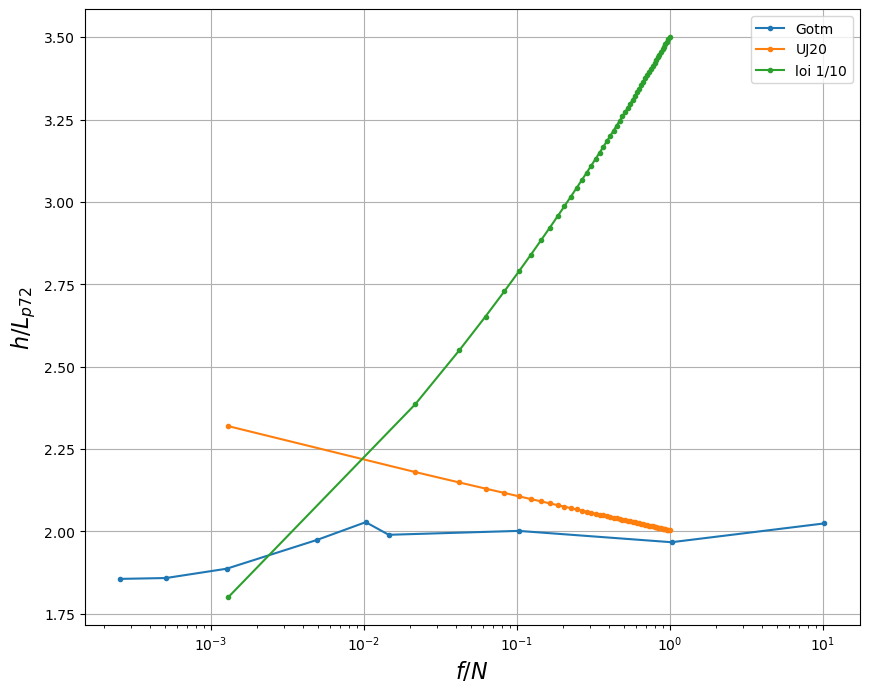

In [33]:
plt.figure(figsize=(10,8))
plt.plot(X,Y, '.-',label= 'Gotm')
#plt.plot(Uj,f_N)
plt.plot(f_N,Uj,'.-', label='UJ20')
plt.plot(f_N,l1_10,'.-', label='loi 1/10')
plt.xscale('log')
plt.grid()
#plt.yscale('log')
plt.xlabel('$f/N$ ', fontsize=16)
plt.ylabel(r'$h/L_{p72}$', fontsize=16)
ax1.tick_params(axis='both', labelsize=14)
plt.legend()

In [34]:
0.02*(np.pi/4)**(-1/4)*0.01**(-1/2)*(10*0.0002)**(1/2)*np.sqrt(60)

0.07359497266837228

In [35]:
f45/np.sqrt(NN0)

0.010284451245736957

ValueError: x and y must have same first dimension, but have shapes (1,) and (217,)

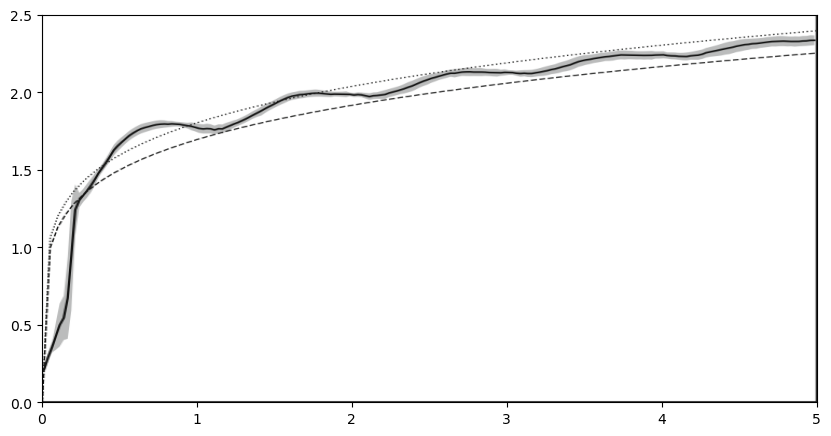

In [38]:
Ric = 1
t_15 = (t)**(1/5)
Gamma0= 0.3
kappa = 0.41

T_f = 2*np.pi/f45
T_f_20=2*np.pi/f20
L_p72 = us/np.sqrt(np.sqrt(NN0)*f45)
L_p72_N = us/np.sqrt(np.sqrt(NNi[0])*f45)
L_p72_20deg = us/np.sqrt(np.sqrt(NN0)*f20)

t_12 = np.sqrt(t/T_f)*2.7
#t_14 = (t/hour)**(1/4)*6
t_15 = (t/T_f)**(1/5)


h_analytique  =L_p72*((40*Ric*np.pi*Gamma0)/(kappa))**(1/5)*(f45/np.sqrt(NN0))**(1/10) * t_15


t_uj = (t/T_f)**(0.18)
h_uj = 1.5 *(us/np.sqrt(f45*np.sqrt(NN0)))*(f45/np.sqrt(NN0))**(-2.2e-2)*t_uj


fig, ax1 = plt.subplots(figsize=(10, 6))

import matplotlib.image as mpimg
image = mpimg.imread('U20.png')


# Afficher l'image

x_min, x_max = 0, 5
y_min, y_max = 0, 2.5

# Afficher l'image avec les limites des axes redimensionnées
plt.imshow(image, extent=[x_min, x_max, y_min, y_max])





# With rotation
#ax1.plot(t/T_f, h_poll_rot/L_p72, label='Pollard et al., 1973 (rotation)')
ax1.plot(t/T_f, h_rot.data/L_p72, alpha = 0.5, label='SIM1 GOTM')
ax1.plot(t_long/T_f_20, h_20deg/L_p72_20deg, alpha = 0.5, label='SIM2 GOTM ')
ax1.plot(t_long/T_f, h_NN1/L_p72_N, alpha = 0.5, label='SIM3 GOTM ')
ax1.plot(t/T_f, h_analytique/L_p72, label='scaling law')
#ax1.plot(t/T_f, h_uj/L_p72, label='U20 scaling law')
#ax1.set_xscale('log')
#ax1.set_yscale('log')
ax1.legend(loc='lower right')
ax1.text(0.03, 0.89, 'Entrainment depth', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax1.transAxes, fontsize=18, bbox=bprops)
ax1.set_ylabel(r'$h/L_{p73}$', fontsize=16)
ax1.set_xlabel(r'$t/T_f$', fontsize=16)
ax1.tick_params(axis='both', labelsize=14)
#ax1.set_ylim(0.6, 3)
#ax1.set_xlim(0.04, 10)
ax1.grid(which='both')

plt.xlim([0, 5])
plt.ylim([0, 2.5])
plt.savefig('scaling_h_u20')
plt.show()



print(r'SIM1 : $f = 10^{-4},   N = = 10^{-2}$  ',10**(-4)/10**(-2) )
print(r'SIM3 : $f = 10^{-4},   N = = 10^{-3/2}$  ',10**(-4)/10**(-3/2) )
print(r'SIM2 : $f = 4.9 10^{-5},   N = = 10^{-2}$  ',4.910**(-5)/10**(-2) )

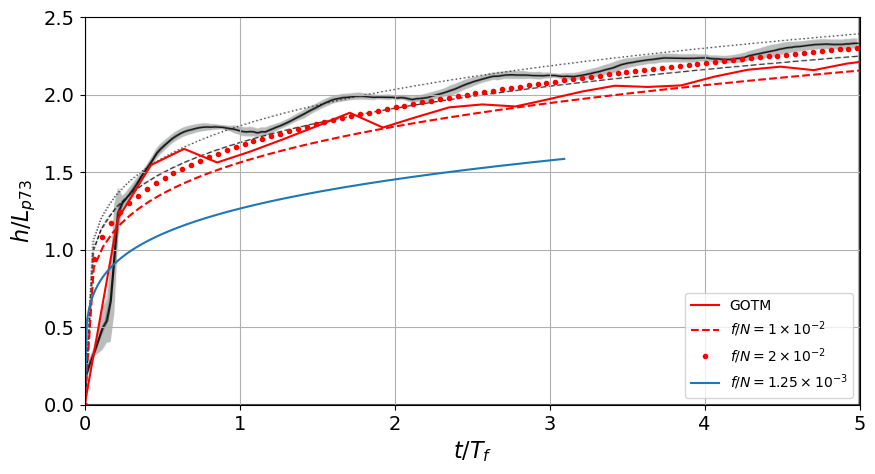

SIM1 : $f = 10^{-4},   N = = 10^{-2}$   0.01
SIM3 : $f = 10^{-4},   N = = 10^{-3/2}$   0.00316227766016838
SIM2 : $f = 4.9 10^{-5},   N = = 10^{-2}$   0.03504229484018457


In [111]:
Ric = 1
t_15 = (t)**(1/5)


T_f = 2*np.pi/f45
T_f_20=2*np.pi/f20
L_p72 = us/np.sqrt(np.sqrt(NN0)*f45)
L_p72_N = us/np.sqrt(np.sqrt(NNi[0])*f45)
L_p72_20deg = us/np.sqrt(np.sqrt(NN0)*f20)

t_12 = np.sqrt(t/T_f)*2.7
#t_14 = (t/hour)**(1/4)*6
t_15 = (t/T_f)**(1/5)
Tf1 = 2*np.pi/1e-4
Tf2 = 2*np.pi/(2.5e-5)

t1= (t/Tf1)**(1/5)
t2= (t/Tf2)**(1/5)


h_analytique  =L_p72*((40*Ric*np.pi*Gamma0)/(kappa))**(1/5)*(f45/np.sqrt(NN0))**(1/10) * t_15
h1 = ((40*Ric*np.pi*Gamma0)/(kappa))**(1/5)*(2e-2)**(1/10) * t1
h2 = ((40*Ric*np.pi*Gamma0)/(kappa))**(1/5)*(1.25e-3)**(1/10) * t2


t_uj = (t/T_f)**(0.18)
h_uj = 1.5 *(us/np.sqrt(f45*np.sqrt(NN0)))*(f45/np.sqrt(NN0))**(-2.2e-2)*t_uj


fig, ax1 = plt.subplots(figsize=(10, 6))

import matplotlib.image as mpimg
image = mpimg.imread('U20.png')


# Afficher l'image

x_min, x_max = 0, 5
y_min, y_max = 0, 2.5

# Afficher l'image avec les limites des axes redimensionnées
plt.imshow(image, extent=[x_min, x_max, y_min, y_max])

common_time = np.linspace(min(min(t/T_f), min(t_long/T_f), min(t_long/T_f_20)),
                          max(max(t/T_f), max(t_long/T_f), max(t_long/T_f_20)), num=1000)

# Interpolate the data for each simulation to the common time array
h_rot_interp = np.interp(common_time, t/T_f, h_rot.data/L_p72)
h_20deg_interp = np.interp(common_time, t_long/T_f_20, h_20deg/L_p72_20deg)
h_NN1_interp = np.interp(common_time, t_long/T_f, h_NN1/L_p72_N)

# Calculate the average
average_curve = (h_rot_interp + h_20deg_interp + h_NN1_interp) / 3

# Plot the averaged curve
plt.plot(common_time, average_curve, label='GOTM', color='red')




# With rotation
#ax1.plot(t/T_f, h_poll_rot/L_p72, label='Pollard et al., 1973 (rotation)')
#ax1.plot(t/T_f, h_rot.data/L_p72, alpha = 0.5, label='SIM1 GOTM')
#ax1.plot(t_long/T_f_20, h_20deg/L_p72_20deg, alpha = 0.5, label='SIM2 GOTM ')
#ax1.plot(t_long/T_f, h_NN1/L_p72_N, alpha = 0.5, label='SIM3 GOTM ')
ax1.plot(t/T_f, h_analytique/L_p72,'r--', label=r'$f/N = 1\times 10^{-2}$')
ax1.plot(t/Tf1, h1, 'r.',label=r'$f/N = 2\times 10^{-2}$')
ax1.plot(t/Tf2, h2, label=r'$f/N = 1.25\times 10^{-3}$')
#ax1.plot(t/T_f, h_uj/L_p72, label='U20 scaling law')
#ax1.set_xscale('log')
#ax1.set_yscale('log')
ax1.legend(loc='lower right')
#ax1.text(0.03, 0.89, 'Entrainment depth', verticalalignment='bottom', horizontalalignment='left',
#         backgroundcolor='w', transform=ax1.transAxes, fontsize=18, bbox=bprops)
ax1.set_ylabel(r'$h/L_{p73}$', fontsize=16)
ax1.set_xlabel(r'$t/T_f$', fontsize=16)
ax1.tick_params(axis='both', labelsize=14)
#ax1.set_ylim(0.6, 3)
#ax1.set_xlim(0.04, 10)
ax1.grid(which='both')

plt.xlim([0, 5])
plt.ylim([0, 2.5])
plt.savefig('scaling_h_u20')
plt.show()



print(r'SIM1 : $f = 10^{-4},   N = = 10^{-2}$  ',10**(-4)/10**(-2) )
print(r'SIM3 : $f = 10^{-4},   N = = 10^{-3/2}$  ',10**(-4)/10**(-3/2) )
print(r'SIM2 : $f = 4.9 10^{-5},   N = = 10^{-2}$  ',4.910**(-5)/10**(-2) )

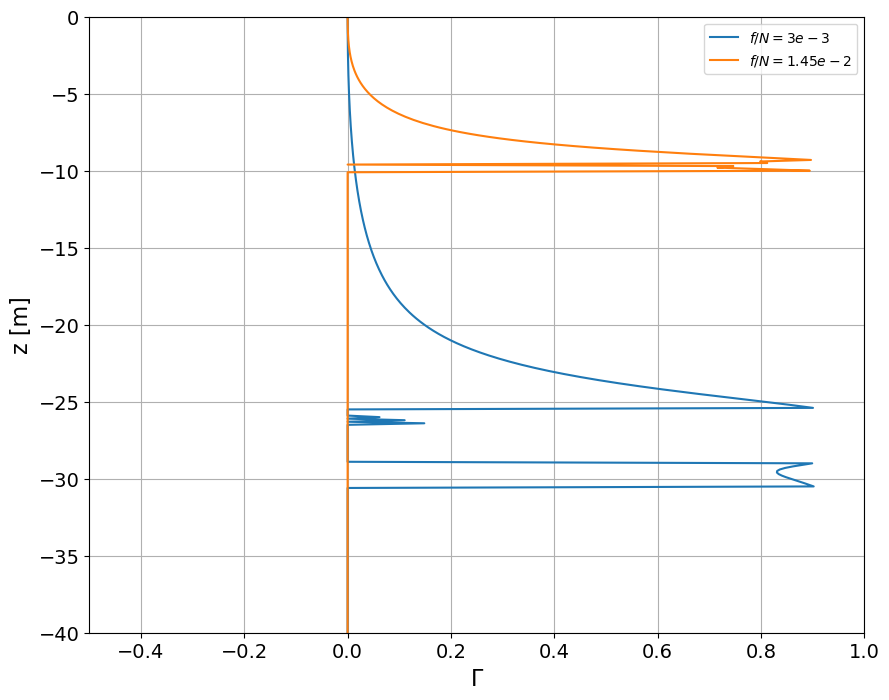

In [122]:
z1D   = z[0, :]
zi1D  = zi[0, :]
# Dernier instant
last_index = -100


# Sélectionner les données au dernier instant
P_rot_last = P_rot[last_index, :-1]
eps_rot_last = eps_rot[last_index, :-1]
G_rot_last = G_rot[last_index, :-1]
zi_last = zi1D[:-1]

Ri_f = -G_rot_last/P_rot_last
Ri_f = np.where((Ri_f > 1e1), 0, Ri_f)
gamma = Ri_f/(1+Ri_f)

### f_90deg
P_90deg_last = P_90deg[last_index, :-1]
eps_rot_last = eps_rot[last_index, :-1]
G_90deg_last = G_90deg[last_index, :-1]
zi_last = zi1D[:-1]

Ri_f_90deg = -G_90deg_last/P_90deg_last
Ri_f_90deg = np.where((Ri_f_90deg > 1e1), 0, Ri_f_90deg)
gamma_90deg = Ri_f_90deg/(1+Ri_f_90deg)
## NN
P_NN1_last = P_NN1[last_index, :-1]
eps_rot_last = eps_rot[last_index, :-1]
G_NN1_last = G_NN1[last_index, :-1]
zi_last = zi1D[:-1]

Ri_f_NN1 = -G_NN1_last/P_NN1_last
Ri_f_NN1 = np.where((Ri_f_NN1 > 1e1), 0, Ri_f_NN1)
gamma_NN1 = Ri_f_NN1/(1+Ri_f_NN1)


# Création du tableau de z pour la nouvelle fonction
z_custom_function = -zi[-1, :-1]

# Calcul des valeurs de la nouvelle fonction


# Création de la figure et du graphique
fig, ax = plt.subplots(figsize=(10, 8))

# Tracer la fonction existante
#ax.plot(gamma, zi[-1, :-1], label=r'$\Gamma$')
ax.plot(gamma_NN1, zi[-1, :-1], label=r'$f/N = 3e-3$')
ax.plot(gamma_90deg, zi[-1, :-1], label=r'$f/N = 1.45e-2$')
# Tracer la nouvelle fonction
#ax.plot(custom_function_values, z_custom_function, label='Approximated Function', linestyle='--', color='red')

# Inverser l'axe y
ax.invert_yaxis()

# Ajouter une légende
ax.legend()

# Grille
ax.grid()

# Ajouter des labels et ajuster les paramètres de l'axe
ax.set_ylabel('z [m]', fontsize=16)
ax.set_xlabel(r'$\Gamma$', fontsize=16)
ax.tick_params(axis='both', labelsize=14)
ax.set_ylim([-40, 0])
ax.set_xlim([-0.5, 1])

# Sauvegarder le graphique
#plt.savefig('profil_vertical_gamma')

# Afficher le graphique
plt.show()

0.00591715976331361

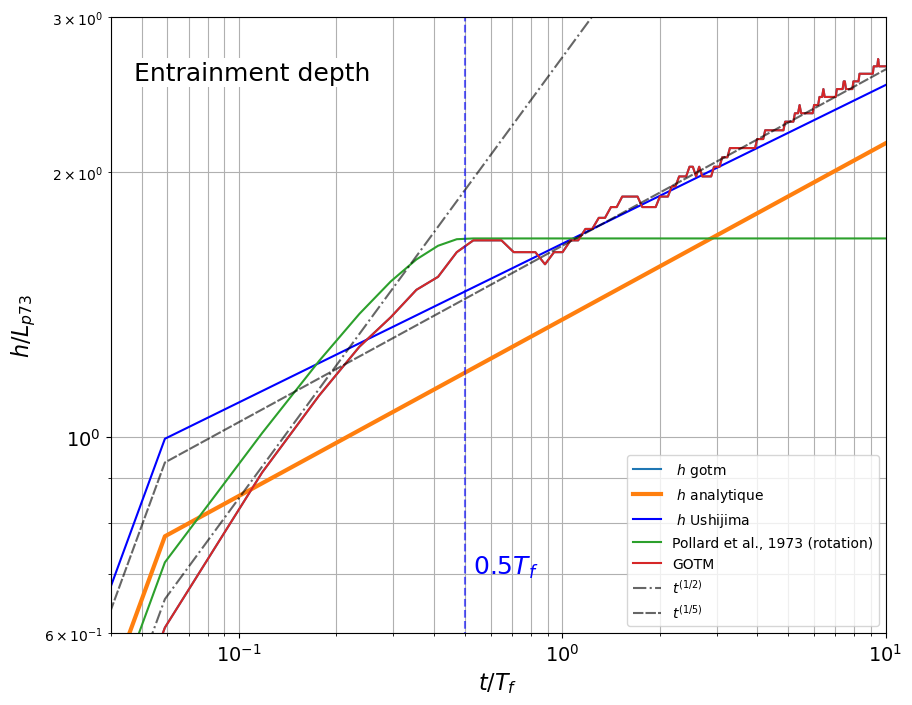

interval $f/N =[1.3 10^{-3}, 2 10^{-2}]$ d'apres les valeurs prise par Ushijima 2020
SIM1 : $f = 10^{-4},   N = = 10^{-2}$   0.01
SIM2 : $f = 10^{-4},   N = = 10^{-3/2}$   0.00316227766016838
SIM3 : $f = 4.9 10^{-5},   N = = 10^{-2}$   0.0049


In [108]:

#f_N = np.linspace(1.3*10**(-3),2*10**(-2),40)
f_N = np.logspace(np.log10(3.1e-3), np.log10(1e-2), 40)
Gamma0 = 0.3
t_15 = (t)**(1/5)
kappa = 0.41
rho0 = 1024

K = ((np.pi*Gamma0)/(kappa**3))**(1/5)





t_15 = (t)**(1/5)


T_f = 2*np.pi/f45
t_15_f = (t/T_f)**(1/5)
L_p72 = us/np.sqrt(np.sqrt(NN0)*f45)


h_analytique  =L_p72*((20*np.pi*Gamma0)/(kappa))**(1/5)*(f45/np.sqrt(NN0))**(1/10) * t_15_f 


t_uj = (t/T_f)**(0.18)
h_uj = 1.5 *(us/np.sqrt(np.sqrt(NN0)*f45))*(f45/np.sqrt(NN0))**(-2.2e-2)*t_uj


T_f = 2*np.pi/f45
T_f_20=2*np.pi/f20
L_p72 = us/np.sqrt(np.sqrt(NN0)*f45)
L_p72_N = us/np.sqrt(np.sqrt(NNi[0])*f45)
L_p72_20deg = us/np.sqrt(np.sqrt(NN0)*f20)

t_12 = np.sqrt(t/T_f)*2.7
#t_14 = (t/hour)**(1/4)*6
t_15 = (t/T_f)**(1/5)*1.65

fig, ax1 = plt.subplots(figsize=(10, 8))

# With rotation
plt.plot(t/T_f,h_rot/L_p72,label=r' $h$ gotm ')
plt.plot(t/T_f,h_analytique/L_p72,linewidth = 3,label=r' $h$ analytique ')
plt.plot(t/T_f,h_uj/L_p72,color ='b',label=r' $h$ Ushijima ')
#plt.plot(t/T_f,  K* f_N[0]**(1/10)*t_15_f, color = 'gray', alpha = 0.3, label = r'$K (\frac{f}{N})^{1/10} (\frac{t}{T_f})^{1/5}$ ')
#for li in range (len(f_N)):
#    plt.plot(t/T_f,  K* f_N[li]**(1/10)*t_15_f, color = 'gray', alpha = 0.3)
ax1.plot(t/T_f, h_poll_rot/L_p72, label='Pollard et al., 1973 (rotation)')
ax1.plot(t/T_f, h_rot.data/L_p72, label='GOTM')
#ax1.plot(t/T_f, h_rot.data/L_p72, color='r', label='SIM1 GOTM')
#ax1.plot(t_long/T_f, h_NN1/L_p72_N, label='SIM2 GOTM ')
#ax1.plot(t_long/T_f_20, h_20deg/L_p72_20deg, label='SIM3 GOTM ')

ax1.plot(t/T_f, t_12,color='k',alpha=0.6, label='$t^{(1/2)}$', linestyle='-.')
ax1.plot(t/T_f, t_15,color='k',alpha=0.6, label='$t^{(1/5)}$', linestyle=(0, (5, 1)))
#ax1.vlines(np.pi / f_rot / hour, 0, 40, alpha=0.6,color='blue', linestyle='--', label='Vertical Bar')
tf_position=0.5
ax1.vlines(tf_position, 0, 3,alpha=0.6, color='blue', linestyle='--')

# Ajouter une étiquette
ax1.text(tf_position, 0.7, '$~0.5 T_f$', color='blue', fontsize=18, ha='left')

ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.legend(loc='lower right')
ax1.text(0.03, 0.89, 'Entrainment depth', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax1.transAxes, fontsize=18, bbox=bprops)
ax1.set_ylabel(r'$h/L_{p73}$', fontsize=16)
ax1.set_xlabel(r'$t/T_f$', fontsize=16)
ax1.tick_params(axis='both', labelsize=14)
ax1.set_ylim(0.6, 3)
ax1.set_xlim(0.04, 10)
ax1.grid(which='both')

#plt.savefig('scaling_law_h_bis')
plt.show()


print("interval $f/N =[1.3 10^{-3}, 2 10^{-2}]$ d'apres les valeurs prise par Ushijima 2020")
print(r'SIM1 : $f = 10^{-4},   N = = 10^{-2}$  ',1e-4/1e-2 )
print(r'SIM2 : $f = 10^{-4},   N = = 10^{-3/2}$  ',1e-4/10**(-(3/2))  )
print(r'SIM3 : $f = 4.9 10^{-5},   N = = 10^{-2}$  ', 4.9e-5/1e-2 )

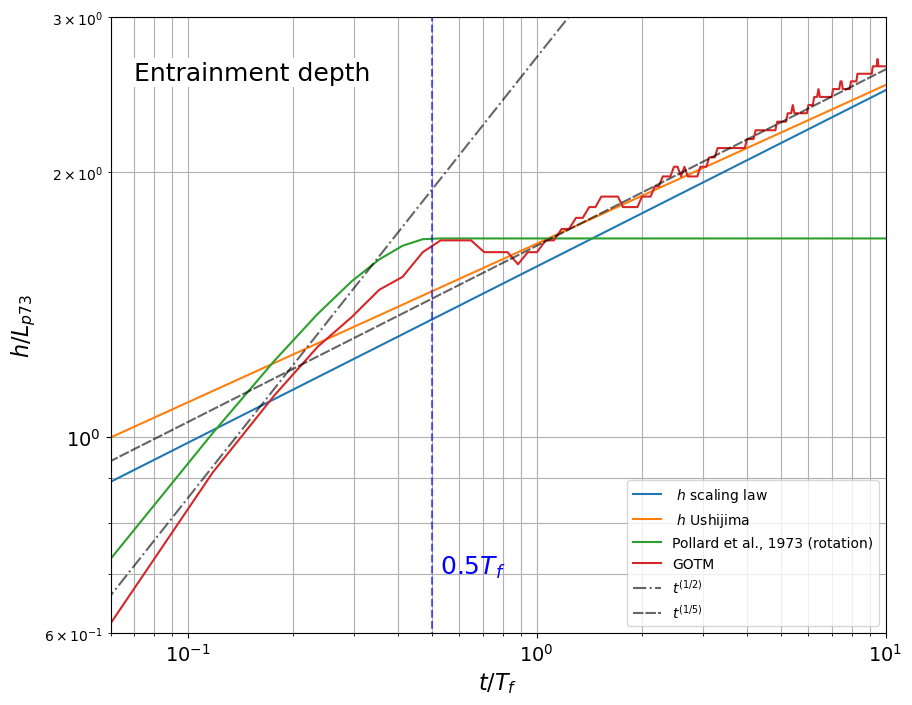

interval $f/N =[1.3 10^{-3}, 2 10^{-2}]$ d'apres les valeurs prise par Ushijima 2020
SIM1 : $f = 10^{-4},   N = = 10^{-2}$   0.01
SIM2 : $f = 10^{-4},   N = = 10^{-3/2}$   0.00316227766016838
SIM3 : $f = 4.9 10^{-5},   N = = 10^{-2}$   0.0049


In [129]:

#f_N = np.linspace(1.3*10**(-3),2*10**(-2),40)
f_N = np.logspace(np.log10(3.1e-3), np.log10(1e-2), 40)
Gamma0 = 0.3
t_15 = (t)**(1/5)
kappa = 0.41
rho0 = 1024


n = 40
Ric = 1


t_15 = (t)**(1/5)


T_f = 2*np.pi/f45
t_15_f = (t/T_f)**(1/5)
L_p72 = us/np.sqrt(np.sqrt(NN0)*f45)


h_analytique  =L_p72*((n*Ric*np.pi*Gamma0)/(kappa))**(1/5)*(f45/np.sqrt(NN0))**(1/10) * t_15_f 


t_uj = (t/T_f)**(0.18)
h_uj = 1.5 *(us/np.sqrt(np.sqrt(NN0)*f45))*(f45/np.sqrt(NN0))**(-2.2e-2)*t_uj





t_15 = (t)**(1/5)


T_f = 2*np.pi/f45
T_f_20=2*np.pi/f20
L_p72 = us/np.sqrt(np.sqrt(NN0)*f45)
L_p72_N = us/np.sqrt(np.sqrt(NNi[0])*f45)
L_p72_20deg = us/np.sqrt(np.sqrt(NN0)*f20)

t_12 = np.sqrt(t/T_f)*2.7
#t_14 = (t/hour)**(1/4)*6
t_15 = (t/T_f)**(1/5)*1.65

fig, ax1 = plt.subplots(figsize=(10, 8))

# With rotation

plt.plot(t/T_f,h_analytique/L_p72,label=r' $h$ scaling law ')
plt.plot(t/T_f,h_uj/L_p72,label=r' $h$ Ushijima ')
ax1.plot(t/T_f, h_poll_rot/L_p72, label='Pollard et al., 1973 (rotation)')
ax1.plot(t/T_f, h_rot.data/L_p72, label='GOTM')

ax1.plot(t/T_f, t_12,color='k',alpha=0.6, label='$t^{(1/2)}$', linestyle='-.')
ax1.plot(t/T_f, t_15,color='k',alpha=0.6, label='$t^{(1/5)}$', linestyle=(0, (5, 1)))
#ax1.vlines(np.pi / f_rot / hour, 0, 40, alpha=0.6,color='blue', linestyle='--', label='Vertical Bar')
tf_position=0.5
ax1.vlines(tf_position, 0, 3,alpha=0.6, color='blue', linestyle='--')

# Ajouter une étiquette
ax1.text(tf_position, 0.7, '$~0.5 T_f$', color='blue', fontsize=18, ha='left')

ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.legend(loc='lower right')
ax1.text(0.03, 0.89, 'Entrainment depth', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax1.transAxes, fontsize=18, bbox=bprops)
ax1.set_ylabel(r'$h/L_{p73}$', fontsize=16)
ax1.set_xlabel(r'$t/T_f$', fontsize=16)
ax1.tick_params(axis='both', labelsize=14)
ax1.set_ylim(0.6, 3)
ax1.set_xlim(0.06, 10)
ax1.grid(which='both')

plt.savefig('scaling_law_h_bis')
plt.show()


print("interval $f/N =[1.3 10^{-3}, 2 10^{-2}]$ d'apres les valeurs prise par Ushijima 2020")
print(r'SIM1 : $f = 10^{-4},   N = = 10^{-2}$  ',1e-4/1e-2 )
print(r'SIM2 : $f = 10^{-4},   N = = 10^{-3/2}$  ',1e-4/10**(-(3/2))  )
print(r'SIM3 : $f = 4.9 10^{-5},   N = = 10^{-2}$  ', 4.9e-5/1e-2 )

## Sensibility of h to Buoyancy frequency 

We well test the sensibility of $h$ to the buoyancy parameter for a fixed latitude to 45°

### Import the data

|name | N |
| --- | --- |
| NN1 | $10^{-3}$|
| NN2 | $10^{-4}$|
| NN3 | $ 10^{-5}$|
| NN4 | $ 10^{-6}$|
| NN5 | $ 5.10^{-6}$|


In [ ]:
N = ['$N=10^{-3}$','$N=10^{-4}$','$N=10^{-5}$', '$N=5.10^{-6}$']

In [ ]:
file_NN1      = 'entrainment_NN1.nc'
entrainment_NN1data = nc.Dataset(file_NN1)         #  I use netCDF4 to convert the time date in second 
entrainment_NN1 = xr.open_dataset(file_NN1)        #  I prefer use Xarray because it allow to better visualize the data (variable, shapes etc..)

file_NN2      = 'entrainment_NN2.nc'
entrainment_NN2 = xr.open_dataset(file_NN2)  

file_NN3      = 'entrainment_NN3.nc'
entrainment_NN3 = xr.open_dataset(file_NN3)  

file_NN4      = 'entrainment_NN4.nc'
entrainment_NN4 = xr.open_dataset(file_NN4)  

file_NN5      = 'entrainment_NN5.nc'
entrainment_NN5 = xr.open_dataset(file_NN5)  

z           = entrainment_NN1.variables['z'][:, :, 0, 0]
zi          = entrainment_NN1.variables['zi'][:, :, 0, 0]
t           = entrainment_NN1data.variables['time'][:]
h_NN1       = entrainment_NN1.variables['mld_surf'][:, 0, 0]
h_NN2      = entrainment_NN2.variables['mld_surf'][:, 0, 0]
h_NN3      = entrainment_NN3.variables['mld_surf'][:, 0, 0]
h_NN4       = entrainment_NN4.variables['mld_surf'][:, 0, 0]
h_NN5       = entrainment_NN5.variables['mld_surf'][:, 0, 0]
h_N =[h_NN1,h_NN2,h_NN3, h_NN5]

### Extraction des données

In [ ]:
z           = entrainment_NN1.variables['z'][:, :, 0, 0]
zi          = entrainment_NN1.variables['zi'][:, :, 0, 0]
t           = entrainment_NN1data.variables['time'][:]
h_NN1       = entrainment_NN1.variables['mld_surf'][:, 0, 0]
h_NN2      = entrainment_NN2.variables['mld_surf'][:, 0, 0]
h_NN3      = entrainment_NN3.variables['mld_surf'][:, 0, 0]
h_NN4       = entrainment_NN4.variables['mld_surf'][:, 0, 0]
h_NN5       = entrainment_NN5.variables['mld_surf'][:, 0, 0]
h_N =[h_NN1,h_NN2,h_NN3, h_NN5]

In [ ]:
t_12 = np.sqrt(t/hour)*6
#t_15 = (t/hour)**(1/5)*6
t_29 = (t/hour)**(2/9)

fig,ax=  plt.subplots(1, figsize=(12,10))

for i in range (len(h_N)):
    
    ax.plot(t/hour*1.45e-4,h_N[i].data, label = N[i] )
ax.plot(t/hour*1.45e-4, t_29*8.3,color='k',alpha=0.5, label='$t^{(2/9)}$', linestyle=(0, (5, 1)))
ax.plot(t/hour*1.45e-4, t_29*4.5,color='k',alpha=0.5, linestyle=(0, (5, 1)))
ax.plot(t/hour*1.45e-4, t_29*15,color='k',alpha=0.5, linestyle=(0, (5, 1)))
ax.plot(t/hour*1.45e-4, t_29*24,color='k',alpha=0.5, linestyle=(0, (5, 1)))
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(loc='lower right')
ax.text(0.03, 0.89, 'Entrainment depth', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax.transAxes, fontsize=14, bbox=bprops)
ax.set_ylabel('h (adim)', fontsize=14)
ax.set_xlabel('$t (adim)$', fontsize=14)
ax.tick_params(axis='both', labelsize=12)
ax.grid(which='both')
plt.savefig('dependance_h(N)_Saison.png')
plt.show()

#### Adimentionized

In [ ]:
# Maximum h : prediction of Pollard 

NNi= [1e-3,1e-4,1e-5,5e-6]
fn=1e-4
# entrainment depth with rotation (Pollard et al., 1973)
h_max_poll = np.zeros(4)
Rv      = 1    # bulk Richardson number
for i in range (h_max_poll.size):
    #h_max_poll[i] = us * ( ( 4*Rv*(1.0 - np.cos(f_deg[i] * t)) ) / ( f_deg[i]**2.0 * NN0 ) )**0.25
    h_max_poll[i]  = (8*Rv)**0.25 * us / ( fn*np.sqrt(NNi[i]) )**0.5
#h_ref_rot   = (8*Rv)**0.25 * us / ( f_rot*np.sqrt(NN0) )**0.5






In [ ]:
t_12 = np.sqrt(t/hour)*6
#t_15 = (t/hour)**(1/5)*6
t_159 = (t/hour)**(1/5)

fig,ax=  plt.subplots(1, figsize=(12,10))

for i in range (len(h_N)):
    
    ax.plot(t/hour,h_N[i]/h_max_poll[i].data, label = N[i] )
ax.plot(t/hour, t_15/1.8,color='k',alpha=0.5, label='$t^{(1/5)}$', linestyle=(0, (5, 1)))
#ax.plot(t[0:100]/hour, t_29[0:100]*4.5,color='k',alpha=0.5, linestyle=(0, (5, 1)))
#ax.plot(t[0:100]/hour, t_29[0:100]*15,color='k',alpha=0.5, linestyle=(0, (5, 1)))
#ax.plot(t[0:100]/hour, t_29[0:100]*24,color='k',alpha=0.5, linestyle=(0, (5, 1)))
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(loc='lower right')
ax.text(0.03, 0.89, 'Entrainment depth', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax.transAxes, fontsize=14, bbox=bprops)
ax.set_ylabel('z/$h_{poll}$', fontsize=14)
ax.set_xlabel('$t$ [hours]', fontsize=14)
ax.tick_params(axis='both', labelsize=12)
ax.grid(which='both')
plt.savefig('dependance_h(N)_Semaine.png')
plt.show()

## Test for different wind forcing



- N= 1e-4
- f = 1e-4
- N/f =1

|name | N |
| --- | --- |
| tau1 | $1.10^{-1}$|
| tau2 | $2.10^{-1}$|
| tau3 | $5.10^{-1}$|
| tau4 | $1.10^{0}$|



In [39]:
u_star = ['0.31', '0.44' , '0.7',' 1.'        ]

In [40]:
file_tau1      = 'entrainment_tau1.nc'
entrainment_tau1data = nc.Dataset(file_tau1)         #  I use netCDF4 to convert the time date in second 
entrainment_tau1 = xr.open_dataset(file_tau1)        #  I prefer use Xarray because it allow to better visualize the data (variable, shapes etc..)

file_tau2      = 'entrainment_tau2.nc'
entrainment_tau2 = xr.open_dataset(file_tau2)  

file_tau3      = 'entrainment_tau3.nc'
entrainment_tau3 = xr.open_dataset(file_tau3)  

file_tau4      = 'entrainment_tau4.nc'
entrainment_tau4 = xr.open_dataset(file_tau4)  





In [41]:
z           = entrainment_tau1.variables['z'][:, :, 0, 0]
zi          = entrainment_tau1.variables['zi'][:, :, 0, 0]
t           = entrainment_tau1data.variables['time'][:]
h_tau1       = entrainment_tau1.variables['mld_surf'][:, 0, 0]
h_tau2      = entrainment_tau2.variables['mld_surf'][:, 0, 0]
h_tau3      = entrainment_tau3.variables['mld_surf'][:, 0, 0]
h_tau4       = entrainment_tau4.variables['mld_surf'][:, 0, 0]

h_tau=[h_tau1,h_tau2,h_tau3,h_tau4]

In [42]:
# Maximum h : prediction of Pollard 

us= [0.1,0.2,0.5,1]
h_max_poll = np.zeros(4)
Rv      = 1    # bulk Richardson number
for i in range (h_max_poll.size):
    #h_max_poll[i] = us * ( ( 4*Rv*(1.0 - np.cos(f_deg[i] * t)) ) / ( f_deg[i]**2.0 * NN0 ) )**0.25
   h_max_poll[i]  = (8*Rv)**0.25 * us[i] / ( 1e-4*np.sqrt(1e-4) )**0.5
#h_ref_rot   = (8*Rv)**0.25 * us / ( f_rot*np.sqrt(NN0) )**0.5

h_max_poll

array([ 168.17928305,  336.3585661 ,  840.89641525, 1681.79283051])

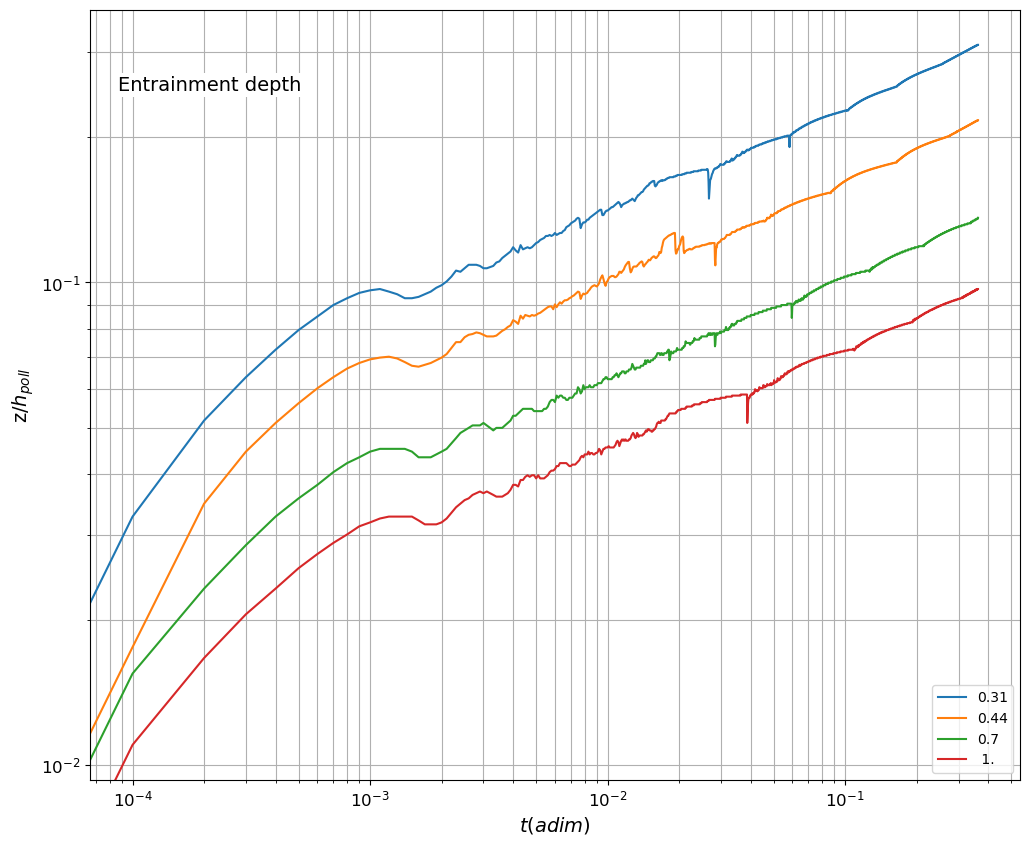

In [43]:
t_12 = np.sqrt(t/hour)*6
#t_15 = (t/hour)**(1/5)*6
t_159 = (t/hour)**(1/5)

fig,ax=  plt.subplots(1, figsize=(12,10))

for i in range (len(u_star)):
    
    ax.plot(t/hour*1e-4,h_tau[i]/h_max_poll[i].data, label = u_star[i] )
#ax.plot(t/hour, t_15/1.8,color='k',alpha=0.5, label='$t^{(1/5)}$', linestyle=(0, (5, 1)))
#ax.plot(t[0:100]/hour, t_29[0:100]*4.5,color='k',alpha=0.5, linestyle=(0, (5, 1)))
#ax.plot(t[0:100]/hour, t_29[0:100]*15,color='k',alpha=0.5, linestyle=(0, (5, 1)))
#ax.plot(t[0:100]/hour, t_29[0:100]*24,color='k',alpha=0.5, linestyle=(0, (5, 1)))
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(loc='lower right')
ax.text(0.03, 0.89, 'Entrainment depth', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax.transAxes, fontsize=14, bbox=bprops)
ax.set_ylabel('z/$h_{poll}$', fontsize=14)
ax.set_xlabel('$t(adim)$', fontsize=14)
ax.tick_params(axis='both', labelsize=12)
ax.grid(which='both')
plt.savefig('dependance_h(tau).png')
plt.show()

NameError: name 'Q' is not defined

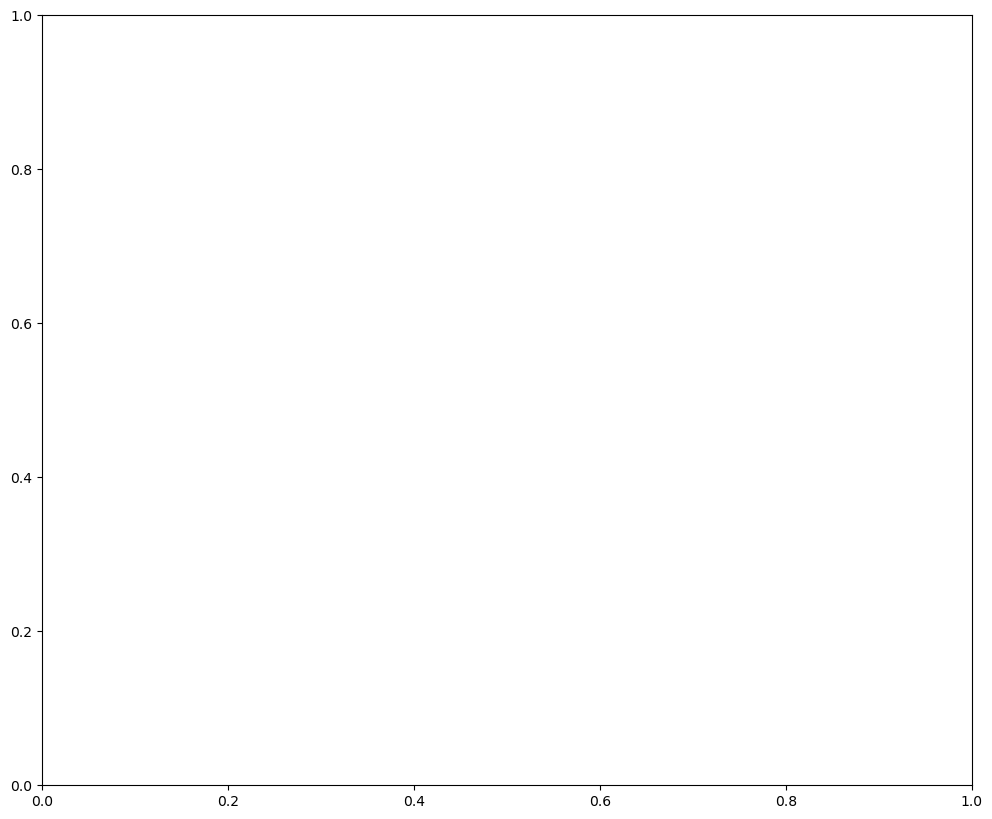

In [44]:
t_12 = np.sqrt(t/hour)*6
#t_15 = (t/hour)**(1/5)*6
t_159 = (t/hour)**(1/5)

fig,ax=  plt.subplots(1, figsize=(12,10))

for i in range (len(Q)):
    
    ax.plot(t/hour*1e-4,h_Q[i].data, label =Q[i] )
#ax.plot(t/hour, t_15/1.8,color='k',alpha=0.5, label='$t^{(1/5)}$', linestyle=(0, (5, 1)))
#ax.plot(t[0:100]/hour, t_29[0:100]*4.5,color='k',alpha=0.5, linestyle=(0, (5, 1)))
#ax.plot(t[0:100]/hour, t_29[0:100]*15,color='k',alpha=0.5, linestyle=(0, (5, 1)))
#ax.plot(t[0:100]/hour, t_29[0:100]*24,color='k',alpha=0.5, linestyle=(0, (5, 1)))
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(loc='lower right')
ax.text(0.03, 0.89, 'Entrainment depth', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax.transAxes, fontsize=14, bbox=bprops)
ax.set_ylabel('z/$h_{poll}$', fontsize=14)
ax.set_xlabel('$t(adim)$', fontsize=14)
ax.tick_params(axis='both', labelsize=12)
ax.grid(which='both')
plt.savefig('dependance_h(tau).png')
plt.show()

In [ ]:
np.max(h_Q[:])

# 2eme Task Evolution of the Richardson number


In [ ]:
#file_norot        = 'entrainment_norot.nc'
file_norot        = 'entrainment_norot_5j.nc'
#file_norot        = 'entrainment_rot_10j.nc'
entrainment_norotdata = nc.Dataset(file_norot)         #  I use netCDF4 to convert the time date in second 
entrainment_norot = xr.open_dataset(file_norot)        #  I prefer use Xarray because it allow to better visualize the data (variable, shapes etc..)

#file_rot        = 'entrainment_rot.nc'
file_rot        = 'entrainment_rot_5j.nc'
#file_rot        = 'entrainment_rot_10j.nc'
entrainment_rotdata = nc.Dataset(file_rot)         #  I use netCDF4 to convert the time date in second 
entrainment_rot = xr.open_dataset(file_rot)        #  I prefer use Xarray because it allow to better visualize the data (variable, shapes etc..)

# model parameters (have to be consistent with gotm.yaml)
NN0     = 1.0e-4                    # initial NN 
lat_rot     = 45.0                      # latitude 
tx      = 0.1027                    # surface stress

# derived parameters
f_rot       = 4.*np.pi/86400.*np.sin(np.pi*lat_rot/180.)      # Coriolis parameter
us      = np.sqrt(tx/1024)   

In [45]:
us/u_taus_rot.data

ValueError: operands could not be broadcast together with shapes (4,) (217,) 

In [46]:
entrainment_rot

<xarray.Dataset>
Dimensions:              (time: 217, lon: 1, lat: 1, z: 200, zi: 201)
Coordinates:
  * time                 (time) datetime64[ns] 2005-01-01 ... 2005-01-10
  * lon                  (lon) float32 0.0
  * lat                  (lat) float32 45.0
    z                    (time, z, lat, lon) float32 ...
    zi                   (time, zi, lat, lon) float32 ...
Data variables: (12/117)
    zeta                 (time, lat, lon) float32 ...
    u_taus               (time, lat, lon) float32 ...
    u10                  (time, lat, lon) float32 ...
    v10                  (time, lat, lon) float32 ...
    airt                 (time, lat, lon) float32 ...
    airp                 (time, lat, lon) float32 ...
    ...                   ...
    us0                  (time, lat, lon) float32 ...
    vs0                  (time, lat, lon) float32 ...
    ds                   (time, lat, lon) float32 ...
    Ekin                 (time, lat, lon) float32 ...
    Epot                 (time, lat, lon) float32 ...
    Eturb                (time, lat, lon) float32 ...
Attributes:
    title:    shear-driven entrainment
    comment:  file created by flexout - https://github.com/BoldingBruggeman/f...

In [47]:
# extract variable for rotation
z           = entrainment_norot.variables['z'][:, :, 0, 0]
zi          = entrainment_norot.variables['zi'][:, :, 0, 0]
t           = entrainment_norotdata.variables['time'][:]
u_norot       = entrainment_norot.variables['u'][:, :, 0, 0]
v_norot       = entrainment_norot.variables['v'][:, :, 0, 0]
NN_norot      = entrainment_norotdata.variables['NN'][:, :, 0, 0]
u_taus_norot  = entrainment_norot.variables['u_taus'][:, 0, 0]
h_norot       = entrainment_norot.variables['mld_surf'][: , 0, 0]
rho_norot     = entrainment_norot.variables['rho'][: ,:, 0, 0]
Ekin_norot     = entrainment_norot.variables['Ekin'][: , 0, 0]
Epot_norot     = entrainment_norot.variables['Epot'][: , 0, 0]
Eturb_norot    = entrainment_norot.variables['Eturb'][: , 0, 0]
tke_norot      = entrainment_norot.variables['tke'][:, :, 0, 0]
eps_norot      = entrainment_norot.variables['eps'][:, :, 0, 0]
P_norot      = entrainment_norot.variables['P'][:, :, 0, 0]
G_norot      = entrainment_norot.variables['G'][:, :, 0, 0]
num_norot      = entrainment_norot.variables['num'][:, :, 0, 0]
nuh_norot     = entrainment_norot.variables['nuh'][:, :, 0, 0]
nus_norot     = entrainment_norot.variables['nus'][:, :, 0, 0]
avh_norot     = entrainment_norot.variables['avh'][:, :, 0, 0]


# extract variable for no rotation
z           = entrainment_rot.variables['z'][:, :, 0, 0]
zi          = entrainment_rot.variables['zi'][:, :, 0, 0]
t           = entrainment_rotdata.variables['time'][:]
u_rot       = entrainment_rot.variables['u'][:, :, 0, 0]
v_rot       = entrainment_rot.variables['v'][:, :, 0, 0]
nuh_rot     = entrainment_rot.variables['nuh'][:, :, 0, 0]
NN_rot      = entrainment_rotdata.variables['NN'][:, :, 0, 0]
u_taus_rot  = entrainment_rot.variables['u_taus'][:, 0, 0]
h_rot       = entrainment_rot.variables['mld_surf'][:, 0, 0]
rho_rot     = entrainment_rot.variables['rho'][: ,:, 0, 0]
T_rot     = entrainment_rot.variables['temp'][: ,:, 0, 0]
Ekin_rot     = entrainment_rot.variables['Ekin'][: , 0, 0]
Epot_rot     = entrainment_rot.variables['Epot'][: , 0, 0]
Eturb_rot    = entrainment_rot.variables['Eturb'][: , 0, 0]
Rig_rot           = entrainment_rot.variables['Rig'][: ,:, 0, 0]
Rif_rot           = entrainment_rot.variables['xRf'][: ,:, 0, 0]
tke_rot      = entrainment_rot.variables['tke'][:, :, 0, 0]
eps_rot      = entrainment_rot.variables['eps'][:, :, 0, 0]
P_rot      = entrainment_rot.variables['P'][:, :, 0, 0]
G_rot      = entrainment_rot.variables['G'][:, :, 0, 0]
num_rot      = entrainment_rot.variables['num'][:, :, 0, 0]
nuh_rot     = entrainment_rot.variables['nuh'][:, :, 0, 0]
nus_rot     = entrainment_rot.variables['nus'][:, :, 0, 0]
avh_rot     = entrainment_rot.variables['avh'][:, :, 0, 0]


### Evolution of the Richardson number 

[Pollard, 1972]
\begin{equation}
\frac{\partial(hu)}{\partial t}- f(hv) = \frac{\tau}{rho}
\end{equation}


\begin{equation}
\frac{\partial(hv)}{\partial t}+ f(hu) = 0
\end{equation}

We have

\begin{equation}
hu = \frac{\tau}{f\rho}\sin ft \qquad \text{and} \qquad hu = \frac{\tau}{f\rho}( \cos ft -1) 
\end{equation}

Hence 
\begin{equation}
h = \left(\frac{\tau}{\rho} \right)^{1/2} \left[\frac{4(1-\cos ft)}{ N^2f^2} \right]^{1/4}
\end{equation}

\begin{equation}
Ri = \frac{gh\Delta \rho / \rho}{(\Delta u )^2} = \frac{\frac{1}{4}(\rho_0 Nf)^2 h^4}{\tau^2(1-\cos ft)} 
\end{equation}

#### We can compute the local Ric (classic oceanographic Ri)

\begin{equation}
Ri = \frac{N^2}{(du/dz)^2}
\end{equation}

Dans la composante de cisaillement on prend en compte dv/dz a cause des oscillation inertielles 

In [1]:
#Compute the Richardson number
dudz_rot = np.gradient(u_rot,axis=1)
dudz_norot = np.gradient(u_norot,axis=1)
dvdz_rot = np.gradient(v_rot,axis=1)
dvdz_norot = np.gradient(v_norot,axis=1)

Ri_rot = NN_rot[:,:-1]/dudz_rot**2
Ri_rot_bis = NN_rot[:,:-1]/(dudz_rot**2+dvdz_rot**2)
Ri_norot = NN_norot[:,:-1]/dudz_norot**2

Ri_rot_sup = np.where((z<-h_rot),np.nan,Ri_rot)
Ri_rot_sup

NameError: name 'np' is not defined

#### Plot of the Evolution of the Richardson number

In [2]:
# plot contour plot of entire time series
fig1, (ax1, ax2 ,ax3)= plt.subplots(3, figsize=(8, 12))
plt.subplots_adjust(hspace=0.2)

# generate 1D z-axes for plotting (assuming that grid doesn't change)
z1D   = z[0, :]
zi1D  = zi[0, :]

# entrainment depth with rotation (Pollard et al., 1973)
Rv      = 1.0    # bulk Richardson number
h_poll_rot       = us * ( ( 4*Rv*(1.0 - np.cos(f * t)) ) / ( f**2.0 * NN0 ) )**0.25
h_ref   = (8*Rv)**0.25 * us / ( f*np.sqrt(NN0) )**0.5

h_poll_rot[np.where(t > np.pi/f)] = h_ref



hours = 3600
hour  = 3600
cmap = plt.cm.get_cmap('inferno')
#levels = MaxNLocator(nbins=40).tick_values(np.log10(Ri_rot).min(), np.log10(Ri_rot).max())
levels = MaxNLocator(nbins=40).tick_values(np.log10(1/4), np.log(100))#np.log10(Ri_rot).max())
CS1 = ax1.contourf(t/hour, z1D,  np.log10(Ri_rot).T, levels=levels, cmap=cmap)#cmocean.cm.thermal)
#ax1.plot(t/hour, -h_poll_rot, '--', color='k',label='Pollard et al. (1973)')
ax1.plot(t/hour,-h_rot.data,color= 'b', linewidth=2, label = 'MLD' )
ax1.text(0.94, 0.03, 'A', verticalalignment='bottom', horizontalalignment='left',
         transform=ax1.transAxes, fontsize=14, bbox=bprops)
ax1.text(0.03, 0.03, r'$\log(Ri)$', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax1.transAxes, fontsize=14, bbox=bprops)
ax1.legend(loc='lower center')
ax1.set_ylabel('z [m]', fontsize=14)
#ax1.set_ylim([-H, 0])
ax1.set_ylim([-30, -10])
ax1.tick_params(labelsize=14)
ax1.xaxis.set_ticklabels([])
colorbar = fig1.colorbar(CS1, ax=ax1)
tick_locator = MaxNLocator(nbins=5)
colorbar.locator = tick_locator
colorbar.update_ticks()


cmap = plt.cm.get_cmap('inferno')
levels = MaxNLocator(nbins=40).tick_values(np.log10(Ri_rot_bis).min(), np.log10(Ri_rot_bis).max())
#levels = MaxNLocator(nbins=40).tick_values(np.log10(1/4), np.log10(Ri_rot_bis).max())
CS2 = ax2.contourf(t/hour, z1D,  np.log10(Ri_rot_bis).T, levels=levels, cmap=cmap)#cmocean.cm.thermal)
#ax2.plot(t/hour, -h_poll_norot, '--', color='white')
ax2.plot(t/hour,-h_rot.data,color= 'white', linewidth=2, label = 'MLD' )
ax2.text(0.94, 0.03, 'B', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax2.transAxes, fontsize=14, bbox=bprops)
ax2.text(0.03, 0.03, r'$\log(Ri(u+v))$', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax2.transAxes, fontsize=14, bbox=bprops)
ax2.set_ylabel('z [m]', fontsize=14)
ax2.set_ylim([-H, 0])
ax2.tick_params(labelsize=14)
ax2.xaxis.set_ticklabels([])
colorbar2 = fig1.colorbar(CS2, ax=ax2)
tick_locator = MaxNLocator(nbins=5)
colorbar2.locator = tick_locator
colorbar2.update_ticks()

cmap = plt.cm.get_cmap('inferno')
levels = MaxNLocator(nbins=40).tick_values(np.log10(1/4), np.nanmax(np.log10(Ri_rot_sup)))
CS3 = ax3.contourf(t/hour, z1D,  np.log10(Ri_rot_sup).T, levels=levels, cmap=cmap)#cmocean.cm.thermal)
#ax2.plot(t/hour, -h_poll_norot, '--', color='white')
ax3.plot(t/hour,-h_rot.data,color= 'k', linewidth=2, label = 'MLD' )
ax3.text(0.94, 0.03, 'B', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax3.transAxes, fontsize=14, bbox=bprops)
ax3.text(0.03, 0.03, r'$\log(Ri)$ above h ', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax3.transAxes, fontsize=14, bbox=bprops)
ax3.set_ylabel('z [m]', fontsize=14)
ax3.set_ylim([-30, -10])
ax3.tick_params(labelsize=14)
ax3.set_xlabel('$t$ [hours]', fontsize=14)
colorbar3 = fig1.colorbar(CS3, ax=ax3)
tick_locator = MaxNLocator(nbins=5)
colorbar3.locator = tick_locator
colorbar3.update_ticks()

NameError: name 'plt' is not defined

\begin{equation}
Ri_f =\frac{w'b'}{(u'w' (du/dz))}
\end{equation}

In [200]:
idt = np.min(np.where(h_rot>5))
idh = np.where((zi[0]==-h_rot))

In [201]:
Ri_rot_sup = np.where((z>-h_rot),Ri_rot,np.nan)

In [180]:
 np.where((z1D>-h_rot))

(array([44, 45, 45, ..., 99, 99, 99]),
 array([213, 195, 196, ..., 214, 215, 216]))

In [178]:
# generate 1D z-axes for plotting (assuming that grid doesn't change)
z1D  

<xarray.Variable (z: 100)>
array([-49.75, -49.25, -48.75, -48.25, -47.75, -47.25, -46.75, -46.25, -45.75,
       -45.25, -44.75, -44.25, -43.75, -43.25, -42.75, -42.25, -41.75, -41.25,
       -40.75, -40.25, -39.75, -39.25, -38.75, -38.25, -37.75, -37.25, -36.75,
       -36.25, -35.75, -35.25, -34.75, -34.25, -33.75, -33.25, -32.75, -32.25,
       -31.75, -31.25, -30.75, -30.25, -29.75, -29.25, -28.75, -28.25, -27.75,
       -27.25, -26.75, -26.25, -25.75, -25.25, -24.75, -24.25, -23.75, -23.25,
       -22.75, -22.25, -21.75, -21.25, -20.75, -20.25, -19.75, -19.25, -18.75,
       -18.25, -17.75, -17.25, -16.75, -16.25, -15.75, -15.25, -14.75, -14.25,
       -13.75, -13.25, -12.75, -12.25, -11.75, -11.25, -10.75, -10.25,  -9.75,
        -9.25,  -8.75,  -8.25,  -7.75,  -7.25,  -6.75,  -6.25,  -5.75,  -5.25,
        -4.75,  -4.25,  -3.75,  -3.25,  -2.75,  -2.25,  -1.75,  -1.25,  -0.75,
        -0.25], dtype=float32)
Attributes:
    units:          m
    long_name:      depth (center)
    standard_name:  ??
    path:           /column_structure
    positive:       up
    axis:           Z

# Energy diognosis

## Evolution of kinetic, potential energy, TKE 

Faire une histogramme " cumulatif" ou les somme se cummule pour comparer l'evolution de l'EP et l'Ek 

In [300]:
#file_norot        = 'entrainment_norot.nc'
#file_norot        = 'entrainment_norot_5j.nc'
file_norot        = 'entrainment_norot_10j.nc'
entrainment_norotdata = nc.Dataset(file_norot)         #  I use netCDF4 to convert the time date in second 
entrainment_norot = xr.open_dataset(file_norot)        #  I prefer use Xarray because it allow to better visualize the data (variable, shapes etc..)

#file_rot        = 'entrainment_rot.nc'
file_rot        = 'entrainment_rot_5j.nc'
file_rot        = 'entrainment_rot_10j.nc'
entrainment_rotdata = nc.Dataset(file_rot)         #  I use netCDF4 to convert the time date in second 
entrainment_rot = xr.open_dataset(file_rot)        #  I prefer use Xarray because it allow to better visualize the data (variable, shapes etc..)


In [301]:
# extract variable for rotation
g= 9.81
z           = entrainment_norot.variables['z'][:, :, 0, 0]
zi          = entrainment_norot.variables['zi'][:, :, 0, 0]
t           = entrainment_norotdata.variables['time'][:]
u_norot       = entrainment_norot.variables['u'][:, :, 0, 0]
v_norot       = entrainment_norot.variables['v'][:, :, 0, 0]
NN_norot      = entrainment_norotdata.variables['NN'][:, :, 0, 0]
u_taus_norot  = entrainment_norot.variables['u_taus'][:, 0, 0]
h_norot       = entrainment_norot.variables['mld_surf'][: , 0, 0]
rho_norot     = entrainment_norot.variables['rho'][: ,:, 0, 0]
Ekin_norot     = entrainment_norot.variables['Ekin'][: , 0, 0]
Epot_norot     = entrainment_norot.variables['Epot'][: , 0, 0]
Eturb_norot    = entrainment_norot.variables['Eturb'][: , 0, 0]
tke_norot      = entrainment_norot.variables['tke'][:, :, 0, 0]
eps_norot      = entrainment_norot.variables['eps'][:, :, 0, 0]
P_norot      = entrainment_norot.variables['P'][:, :, 0, 0]
G_norot      = entrainment_norot.variables['G'][:, :, 0, 0]
num_norot      = entrainment_norot.variables['num'][:, :, 0, 0]
nuh_norot     = entrainment_norot.variables['nuh'][:, :, 0, 0]
nus_norot     = entrainment_norot.variables['nus'][:, :, 0, 0]
avh_norot     = entrainment_norot.variables['avh'][:, :, 0, 0]


# extract variable for no rotation
z           = entrainment_rot.variables['z'][:, :, 0, 0]
zi          = entrainment_rot.variables['zi'][:, :, 0, 0]
t           = entrainment_rotdata.variables['time'][:]
u_rot       = entrainment_rot.variables['u'][:, :, 0, 0]
v_rot       = entrainment_rot.variables['v'][:, :, 0, 0]
nuh_rot     = entrainment_rot.variables['nuh'][:, :, 0, 0]
NN_rot      = entrainment_rotdata.variables['NN'][:, :, 0, 0]
u_taus_rot  = entrainment_rot.variables['u_taus'][:, 0, 0]
h_rot       = entrainment_rot.variables['mld_surf'][:, 0, 0]
rho_rot     = entrainment_rot.variables['rho'][: ,:, 0, 0]
T_rot     = entrainment_rot.variables['temp'][: ,:, 0, 0]
Ekin_rot     = entrainment_rot.variables['Ekin'][: , 0, 0]
Epot_rot     = entrainment_rot.variables['Epot'][: , 0, 0]
Eturb_rot    = entrainment_rot.variables['Eturb'][: , 0, 0]
Rig_rot           = entrainment_rot.variables['Rig'][: ,:, 0, 0]
Rif_rot           = entrainment_rot.variables['xRf'][: ,:, 0, 0]
tke_rot      = entrainment_rot.variables['tke'][:, :, 0, 0]
eps_rot      = entrainment_rot.variables['eps'][:, :, 0, 0]
P_rot      = entrainment_rot.variables['P'][:, :, 0, 0]
G_rot      = entrainment_rot.variables['G'][:, :, 0, 0]
num_rot      = entrainment_rot.variables['num'][:, :, 0, 0]
nuh_rot     = entrainment_rot.variables['nuh'][:, :, 0, 0]
nus_rot     = entrainment_rot.variables['nus'][:, :, 0, 0]
avh_rot     = entrainment_rot.variables['avh'][:, :, 0, 0]


In [335]:

entrainment_rot



<xarray.Dataset>
Dimensions:              (time: 217, lon: 1, lat: 1, z: 200, zi: 201)
Coordinates:
  * time                 (time) datetime64[ns] 2005-01-01 ... 2005-01-10
  * lon                  (lon) float32 0.0
  * lat                  (lat) float32 45.0
    z                    (time, z, lat, lon) float32 ...
    zi                   (time, zi, lat, lon) float32 ...
Data variables: (12/117)
    zeta                 (time, lat, lon) float32 ...
    u_taus               (time, lat, lon) float32 ...
    u10                  (time, lat, lon) float32 ...
    v10                  (time, lat, lon) float32 ...
    airt                 (time, lat, lon) float32 ...
    airp                 (time, lat, lon) float32 ...
    ...                   ...
    us0                  (time, lat, lon) float32 ...
    vs0                  (time, lat, lon) float32 ...
    ds                   (time, lat, lon) float32 ...
    Ekin                 (time, lat, lon) float32 ...
    Epot                 (time, lat, lon) float32 ...
    Eturb                (time, lat, lon) float32 ...
Attributes:
    title:    shear-driven entrainment
    comment:  file created by flexout - https://github.com/BoldingBruggeman/f...

/var/folders/gl/qr_d872d4sj6k_rm1k6tskj80000gq/T/ipykernel_7921/211409503.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('inferno')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/var/folders/gl/qr_d872d4sj6k_rm1k6tskj80000gq/T/ipykernel_7921/211409503.py:37: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('inferno')


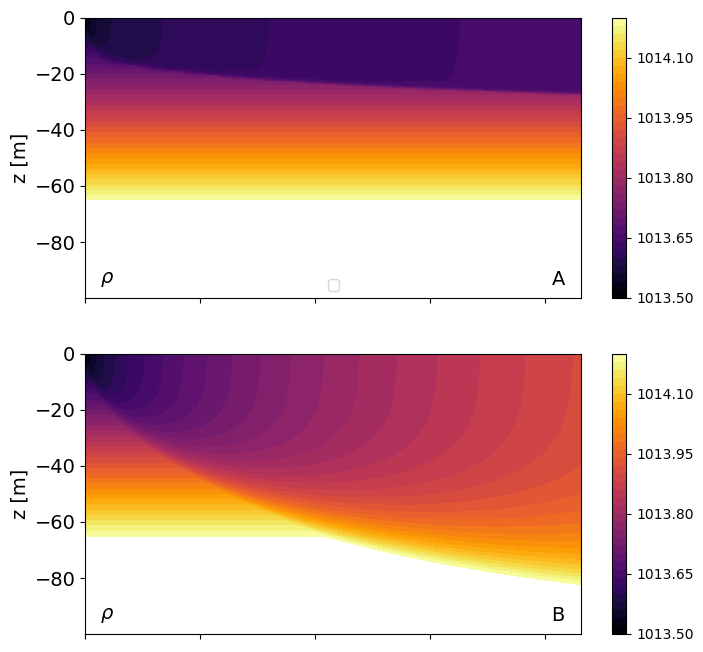

In [337]:
# plot all following profiles at time index iPlt
NT      = t.size
iPlt    = NT-1

#parametre of the plot
H       = - z[iPlt,0]


# plot contour plot of entire time series
fig1, (ax1, ax2 )= plt.subplots(2, figsize=(8, 8))
plt.subplots_adjust(hspace=0.2)

# generate 1D z-axes for plotting (assuming that grid doesn't change)
z1D   = z[0, :]
zi1D  = zi[0, :]

hours = 3600
hour  = 3600
cmap = plt.cm.get_cmap('inferno')
levels = MaxNLocator(nbins=40).tick_values(rho_rot.min(), 1014.2)
CS1 = ax1.contourf(t/hour, z1D,  rho_rot.T, levels=levels, cmap=cmap)#cmocean.cm.thermal)
#ax1.plot(t/hour, -h_poll_rot, '--', color='white',label='Pollard et al. (1973)')
ax1.text(0.94, 0.03, 'A', verticalalignment='bottom', horizontalalignment='left',
         transform=ax1.transAxes, fontsize=14, bbox=bprops)
ax1.text(0.03, 0.03, r'$\rho$', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax1.transAxes, fontsize=14, bbox=bprops)
ax1.legend(loc='lower center')
ax1.set_ylabel('z [m]', fontsize=14)
ax1.set_ylim([-H, 0])
ax1.tick_params(labelsize=14)
ax1.xaxis.set_ticklabels([])
colorbar = fig1.colorbar(CS1, ax=ax1)
tick_locator = MaxNLocator(nbins=5)
colorbar.locator = tick_locator
colorbar.update_ticks()

cmap = plt.cm.get_cmap('inferno')
levels = MaxNLocator(nbins=40).tick_values(rho_norot.min(), 1014.2)
CS2 = ax2.contourf(t/hour, z1D,  rho_norot.T, levels=levels, cmap=cmap)#cmocean.cm.thermal)
#ax2.plot(t/hour, -h_poll_norot, '--', color='white')
#ax2.axhline(y=-h_ref,color='white', linestyle='--')
ax2.text(0.94, 0.03, 'B', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax2.transAxes, fontsize=14, bbox=bprops)
ax2.text(0.03, 0.03, r'$\rho$', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax2.transAxes, fontsize=14, bbox=bprops)
ax2.set_ylabel('z [m]', fontsize=14)
ax2.set_ylim([-H, 0])
ax2.tick_params(labelsize=14)
ax2.xaxis.set_ticklabels([])
colorbar2 = fig1.colorbar(CS2, ax=ax2)
tick_locator = MaxNLocator(nbins=5)
colorbar2.locator = tick_locator
colorbar2.update_ticks()



Dans cette cellule je compare l'expression de rho calculé dans gotam a l'expression analytique de rho que j'utilise. $\rho= \rho_0*(1-\frac{N^2}{g}z)$



<xarray.Variable ()>
array(-0.00257874)

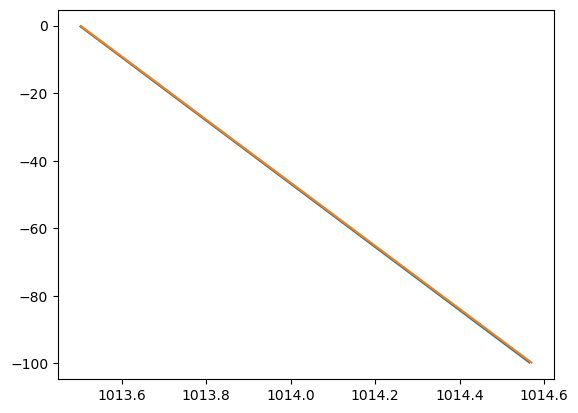

In [370]:
NN0 = NN_rot[0][1]
rho = np.ones(np.shape(z1D))
rho_0 = 1027
for i in range(len(rho)): 
    rho[i] = rho_0*(1-NN0/g*z1D[i]) 

plt.plot(rho-13.5,z1D)
plt.plot(rho_rot[0],z1D)
np.max(rho-13.5-rho_rot[0])

In [303]:
7/12

0.5833333333333334

In [304]:
z[0,1].data-z[0,0].data

0.5

In [305]:
Pe_rot  = np.sum(rho_rot*g*z*(z[0,1].data-z[0,0].data)  , axis=1)/1024
dPe_rot  = np.gradient(Pe_rot, axis=0)
dEpot_rot = np.gradient(Epot_rot/1024, axis=0)
Pe_norot  = np.sum(rho_norot*g*z*(z[0,1].data-z[0,0].data)  , axis=1)/1024
dPe_norot = np.gradient(Pe_norot, axis=0)
dEpot_norot = np.gradient(Epot_norot/1024, axis=0)


In [306]:
Ke_rot = np.sum((u_rot**2+v_rot**2)*(z[0,1].data-z[0,0].data)  , axis=1)
Ke_norot = np.sum((u_norot**2+v_norot**2)*(z[0,1].data-z[0,0].data)  , axis=1)

dKe_rot = np.gradient(Ke_rot, axis=0)
dEkin_rot = np.gradient(Ekin_rot/1024, axis=0)
dKe_norot = np.gradient(Ke_norot, axis=0)
dEkin_norot = np.gradient(Ekin_norot/1024, axis=0)

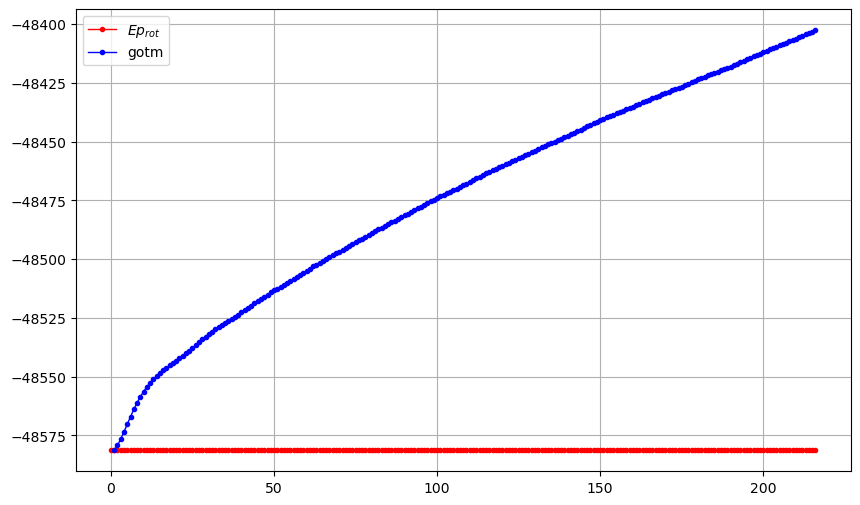

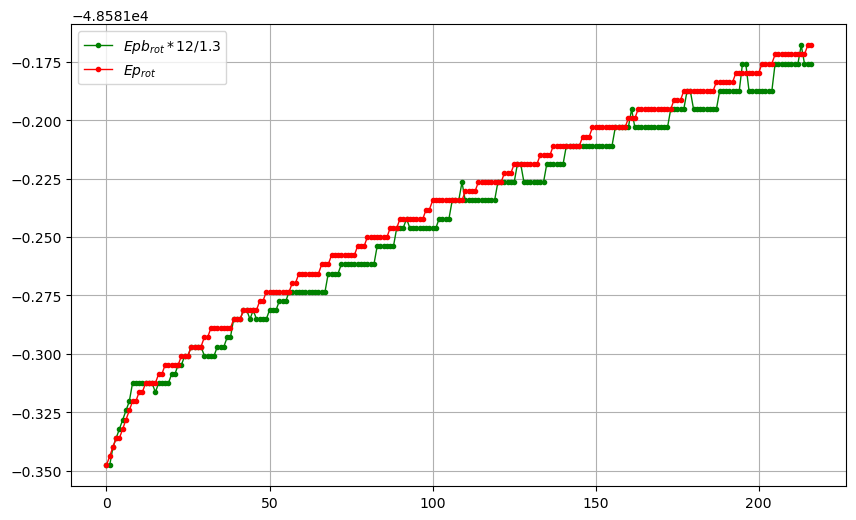

In [307]:
NN0     = NN_rot[0,1]
Epb_rot = (1024/1.3)*NN0**2*h_rot**3
Epb_norot = (1024/12)*NN0**2*h_norot**3
dEpb_rot = np.gradient(Epb_rot, axis=0)
dEpb_norot = np.gradient(Epb_norot, axis=0)
plt.figure(figsize=(10, 6))
plt.plot(t/hours,Pe_rot,'.-', color='r', linewidth=1,label='$Ep_{rot}$')
plt.plot(t[1:]/hours,Epot_rot[1:]+ Pe_rot[0]-Epot_rot[1],'.-', color='b', linewidth=1,label='gotm')


plt.legend()
plt.grid()

plt.figure(figsize=(10, 6))
plt.plot(t/hours,Epb_rot+Pe_rot[0],'.-', color='g', linewidth=1,label='$Epb_{rot} * 12/1.3$')
plt.plot(t/hours,Pe_rot,'.-', color='r', linewidth=1,label='$Ep_{rot}$')
plt.legend()
plt.grid()
plt.savefig('hypothese_2')

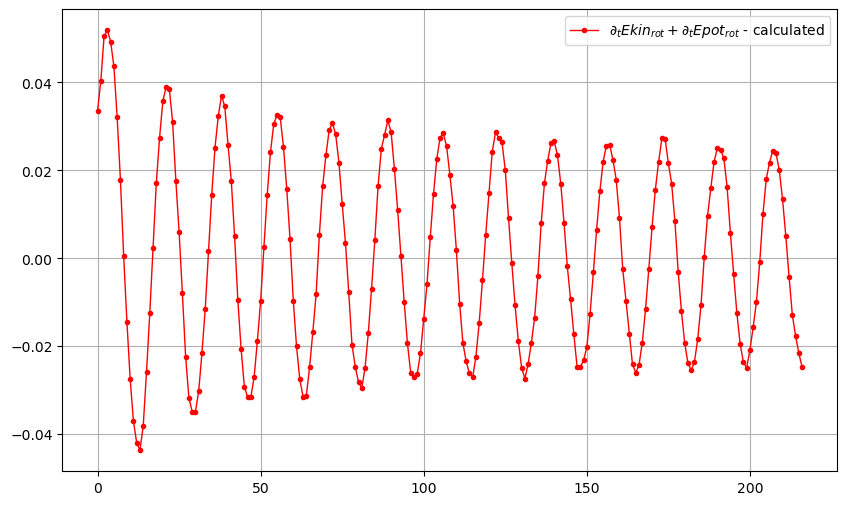

In [308]:
plt.figure(figsize=(10, 6))
#plt.plot(t[1:]/hours, Pe_rot[1:],'.-', color='r', linewidth=1,label='$Epot_{rot}$')
#plt.plot(t[0:]/hours, Pe_rot[0:],'.-', color='r', linewidth=1,label='$Epot_{rot}$')
#plt.plot(t[2:]/hours, dEpot[2:],'.-', color='b', linewidth=1,label='$in built Epot_rot$')
#plt.plot(t[2:]/hours, dPe_rot[2:],'.-', color='b', linewidth=1,label='$Epot_{norot}$')
#plt.plot(t[0:]/hours, dKe_rot[0:],'.-', color='r', linewidth=1,label='$Ke_{rot}$')
plt.plot(t[0:]/hours, dKe_rot[0:]+dPe_rot[0:],'.-', color='r', linewidth=1,label='$\partial_t Ekin_{rot}+\partial_t Epot_{rot}$ - calculated')
plt.legend()
plt.grid()

In [309]:
np.mean(dKe_rot[0:]+dPe_rot[0:])

0.0012402169

NameError: name 'num_rot' is not defined

In [4]:
35*30*0.17332*1.2

218.3832

#### Inbuild data : dEp/dt -  dEkin /dt

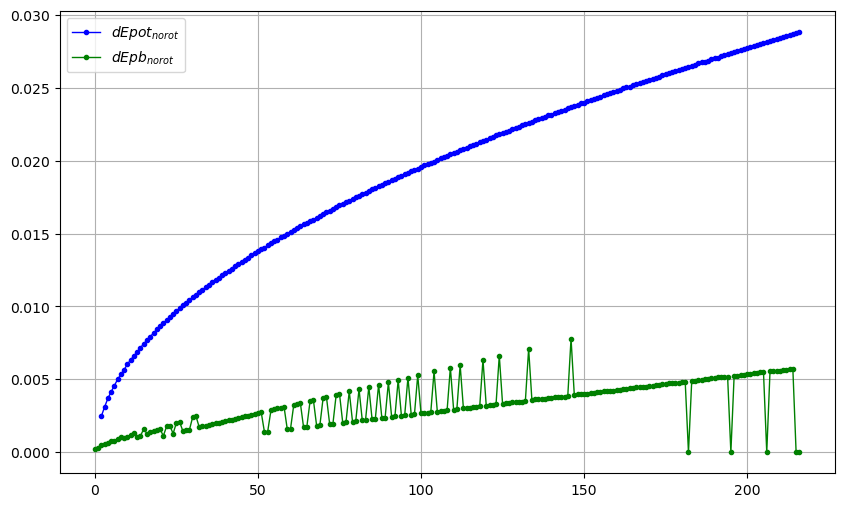

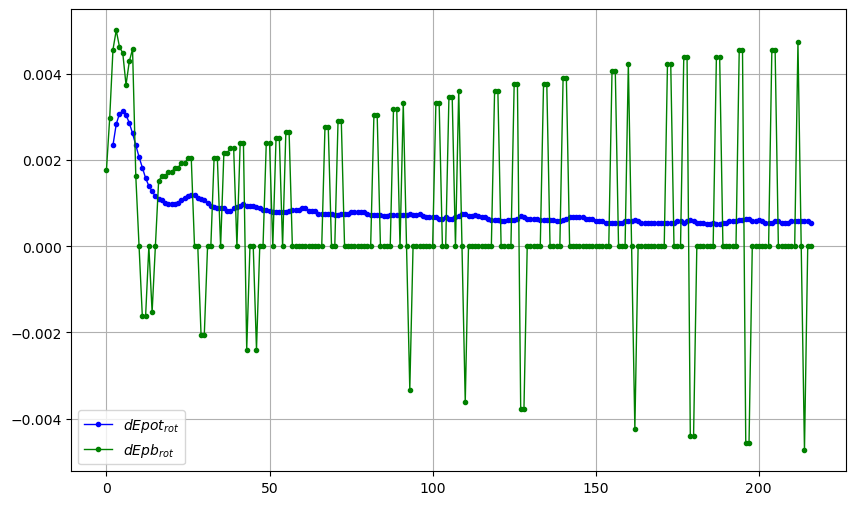

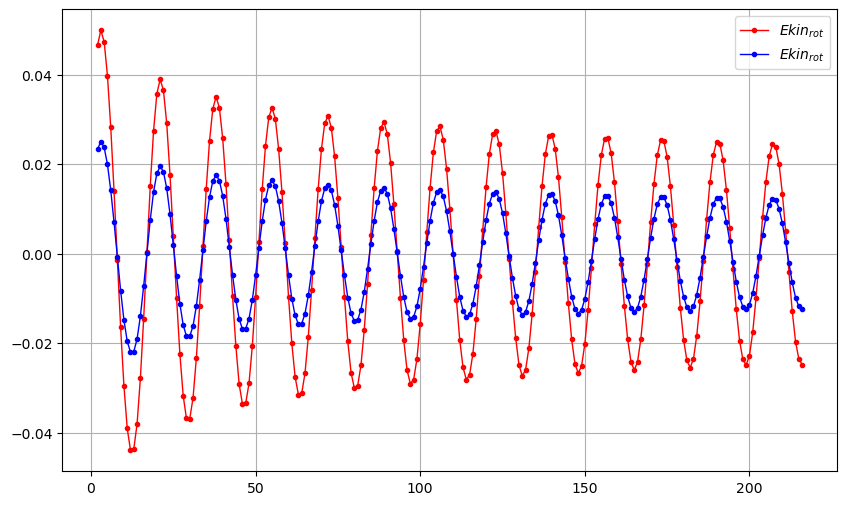

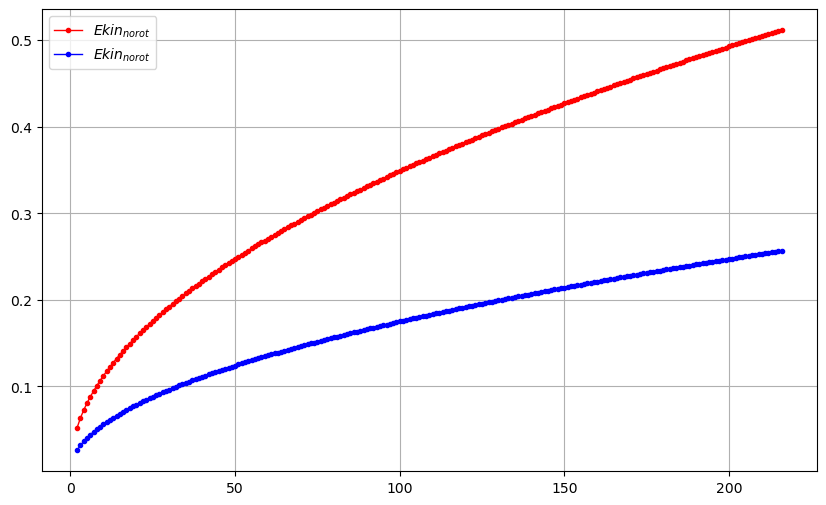

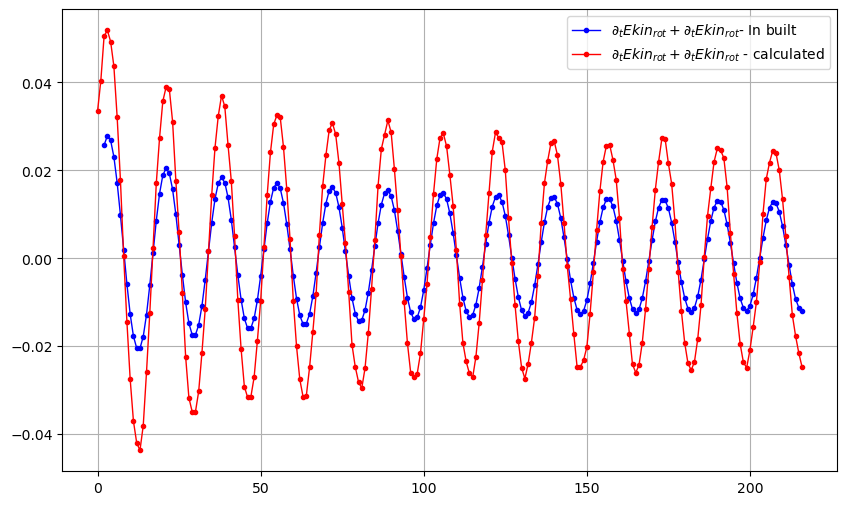

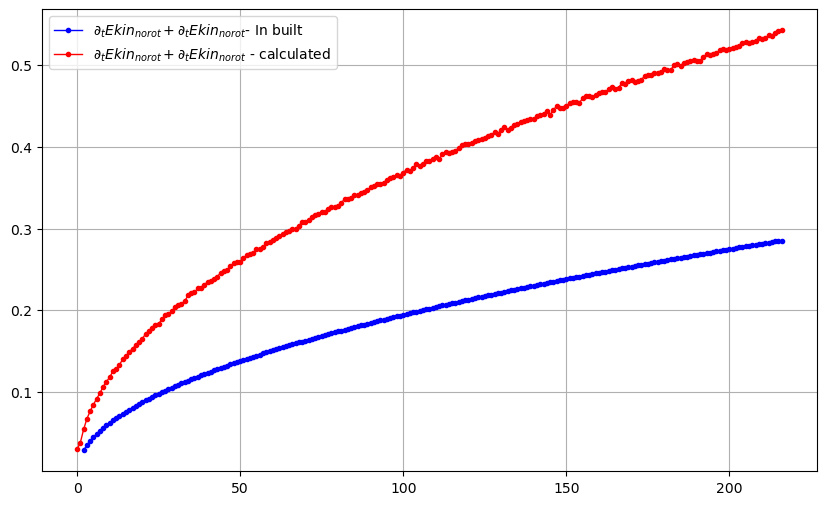

In [310]:



hours= 3600

plt.figure(figsize=(10, 6))
#plt.plot(t[1:]/hours, Epot_rot[1:],'.-', color='r', linewidth=1,label='$Epot_{rot}$')
plt.plot(t[2:]/hours, dEpot_norot[2:],'.-', color='b', linewidth=1,label='$dEpot_{norot}$ ')
#plt.plot(t[2:]/hours, dPe_norot[2:],'.-', color='r', linewidth=1,label='$dEpot_{norot}$')
plt.plot(t/hours,dEpb_norot,'.-', color='g', linewidth=1,label='$dEpb_{norot}$')
plt.legend()
plt.grid()

hours= 3600
plt.figure(figsize=(10, 6))
#plt.plot(t[1:]/hours, Epot_rot[1:],'.-', color='r', linewidth=1,label='$Epot_{rot}$')
plt.plot(t[2:]/hours, dEpot_rot[2:],'.-', color='b', linewidth=1,label='$dEpot_{rot}$ ')
#plt.plot(t[2:]/hours, dPe_rot[2:],'.-', color='r', linewidth=1,label='$dEpot_{rot}$')
plt.plot(t/hours,dEpb_rot,'.-', color='g', linewidth=1,label='$dEpb_{rot}$')
plt.legend()
plt.grid()

plt.figure(figsize=(10, 6))
plt.plot(t[2:]/hours, dKe_rot[2:],'.-', color='r', linewidth=1,label='$Ekin_{rot}$')
plt.plot(t[2:]/hours, dEkin_rot[2:],'.-', color='b', linewidth=1,label='$Ekin_{rot}$')

plt.legend()
plt.grid()

plt.figure(figsize=(10, 6))
plt.plot(t[2:]/hours, dKe_norot[2:],'.-', color='r', linewidth=1,label='$Ekin_{norot}$')
plt.plot(t[2:]/hours, dEkin_norot[2:],'.-', color='b', linewidth=1,label='$Ekin_{norot}$')
plt.legend()
plt.grid()

plt.figure(figsize=(10, 6))
#plt.plot(t[1:]/hours, Epot_rot[1:],'.-', color='r', linewidth=1,label='$Epot_{rot}$')
plt.plot(t[2:]/hours, dEpot_rot[2:]+dEkin_rot[2:],'.-', color='b', linewidth=1,label='$\partial_t Ekin_{rot}+\partial_t Ekin_{rot}$- In built')
plt.plot(t[0:]/hours, dKe_rot[0:]+dPe_rot[0:],'.-', color='r', linewidth=1,label='$\partial_t Ekin_{rot}+\partial_t Ekin_{rot}$ - calculated')
plt.legend()
plt.grid()

plt.figure(figsize=(10, 6))
#plt.plot(t[1:]/hours, Epot_rot[1:],'.-', color='r', linewidth=1,label='$Epot_{rot}$')
plt.plot(t[2:]/hours, dEpot_norot[2:]+dEkin_norot[2:],'.-', color='b', linewidth=1,label='$\partial_t Ekin_{norot}+\partial_t Ekin_{norot}$- In built')
plt.plot(t[0:]/hours, dKe_norot[0:]+dPe_norot[0:],'.-', color='r', linewidth=1,label='$\partial_t Ekin_{norot}+\partial_t Ekin_{norot}$ - calculated')
plt.legend()
plt.grid()


### Calcul de $\int_z \rho \epsilon dz$

In [311]:
eps_rot[:,1:] 

<xarray.Variable (time: 217, zi: 200)>
[43400 values with dtype=float32]
Attributes:
    units:          m2/s3
    long_name:      energy dissipation rate
    standard_name:  ??
    path:           /turbulence

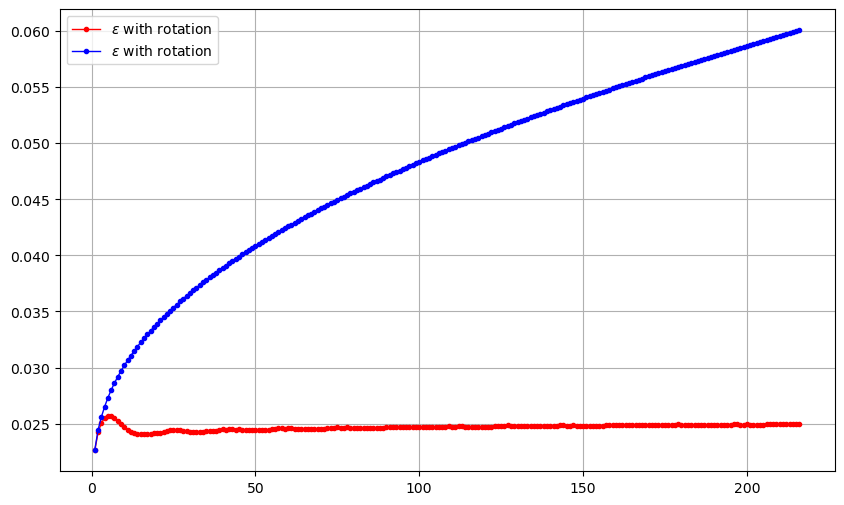

In [312]:
dz = z[0,1].data-z[0,0].data

eps_reshape_rot =np.zeros(rho_rot.shape)
eps_reshape_norot  =np.zeros(rho_norot.shape)
eps_reshape_rot = 0.5*(eps_rot[:,:-1].data+eps_rot[:,1:].data)
eps_reshape_norot = 0.5*(eps_norot[:,:-1].data+eps_norot[:,1:].data)
epsilon_rot  = np.sum(rho_rot *eps_reshape_rot*dz  , axis=1)
epsilon_norot  = np.sum(rho_norot *eps_reshape_norot*dz  , axis=1)

plt.figure(figsize=(10, 6))

plt.plot(t[1:]/hours,epsilon_rot[1:],'.-', color='r', linewidth=1,label='$\epsilon $ with rotation')
plt.plot(t[1:]/hours,epsilon_norot[1:],'.-', color='b', linewidth=1,label='$\epsilon $ with rotation')

plt.legend()
plt.grid()

In [313]:
#dz = z[0,1].data-z[0,0].data

#eps_reshape_rot =np.zeros(rho_rot.shape)
#eps_reshape_norot  =np.zeros(rho_norot.shape)
#eps_reshape_rot = 0.5*(eps_rot[:,:-1].data+eps_rot[:,1:].data)
#eps_reshape_norot = 0.5*(eps_norot[:,:-1].data+eps_norot[:,1:].data)
#epsilon_rot  = np.sum(eps_reshape_rot*dz  , axis=1)*1027
#epsilon_norot  = np.sum(eps_reshape_norot*dz  , axis=1)*1027

#plt.figure(figsize=(10, 6))

#plt.plot(t[1:]/hours,epsilon_rot[1:],'.-', color='r', linewidth=1,label='$\epsilon $ with rotation')
#plt.plot(t[1:]/hours,epsilon_norot[1:],'.-', color='b', linewidth=1,label='$\epsilon $ with rotation')

#plt.legend()
#plt.grid()

In [314]:
I_rot = np.zeros(t.size); I_norot = np.zeros(t.size)
U_rot = np.zeros(t.size)
U_norot = np.zeros(t.size)

In [315]:
for i in range (len(t)):
#(np.abs(z[i][::-1]+h_rot[i])).argmin()
    I_rot[i] = (np.abs(z[i]+h_rot[i])).argmin()
    I_norot[i] = (np.abs(z[i]+h_norot[i])).argmin()
#np.abs(z[i]+h_rot[i])

I_rot

/var/folders/gl/qr_d872d4sj6k_rm1k6tskj80000gq/T/ipykernel_7921/2914978182.py:3: DeprecationWarning: Behaviour of argmin/argmax with neither dim nor axis argument will change to return a dict of indices of each dimension. To get a single, flat index, please use np.argmin(da.data) or np.argmax(da.data) instead of da.argmin() or da.argmax().
  I_rot[i] = (np.abs(z[i]+h_rot[i])).argmin()
/var/folders/gl/qr_d872d4sj6k_rm1k6tskj80000gq/T/ipykernel_7921/2914978182.py:4: DeprecationWarning: Behaviour of argmin/argmax with neither dim nor axis argument will change to return a dict of indices of each dimension. To get a single, flat index, please use np.argmin(da.data) or np.argmax(da.data) instead of da.argmin() or da.argmax().
  I_norot[i] = (np.abs(z[i]+h_norot[i])).argmin()
/var/folders/gl/qr_d872d4sj6k_rm1k6tskj80000gq/T/ipykernel_7921/2914978182.py:3: DeprecationWarning: Behaviour of argmin/argmax with neither dim nor axis argument will change to return a dict of indices of each dimension

array([199., 187., 181., 177., 174., 172., 170., 169., 167., 166., 166.,
       166., 167., 167., 167., 168., 167., 167., 166., 166., 165., 165.,
       164., 164., 163., 163., 162., 162., 162., 162., 163., 163., 163.,
       163., 162., 162., 162., 161., 161., 160., 160., 160., 159., 159.,
       160., 159., 160., 160., 160., 160., 159., 159., 159., 158., 158.,
       158., 157., 157., 157., 157., 157., 157., 157., 157., 157., 157.,
       157., 157., 156., 156., 156., 156., 155., 155., 155., 155., 155.,
       155., 155., 155., 155., 155., 155., 154., 154., 154., 154., 154.,
       154., 153., 153., 153., 152., 153., 153., 153., 153., 153., 153.,
       153., 153., 153., 152., 152., 152., 152., 151., 151., 151., 150.,
       151., 151., 151., 151., 151., 151., 151., 151., 151., 151., 150.,
       150., 150., 150., 150., 150., 149., 149., 150., 150., 150., 150.,
       150., 150., 150., 149., 149., 149., 149., 149., 149., 148., 148.,
       148., 148., 148., 148., 148., 148., 148., 14

##### Calcul de l'integrale de epsilon seulement dans la couche de melange 

### Calcul de $\langle U.\tau \rangle = \langle U.\rho_0 u_*^2 \rangle$

$U = \frac{\int_0^h udz}{h}$ 

- Est calculé seulement sur la couche de melange 


In [326]:
dz = z[0,1].data-z[0,0].data
surf = 99
for i in range (len(t)):
    #j = np.int64
    U_rot[i] = np.sum((u_rot[i, surf:])*dz)/(len(u_rot[0, surf:])*dz)
    U_norot[i] = np.sum((u_norot[i, surf:])*dz)/(len(u_norot[0, surf:])*dz)

U = np.mean(U_rot[13:])
U_rot[:] = U



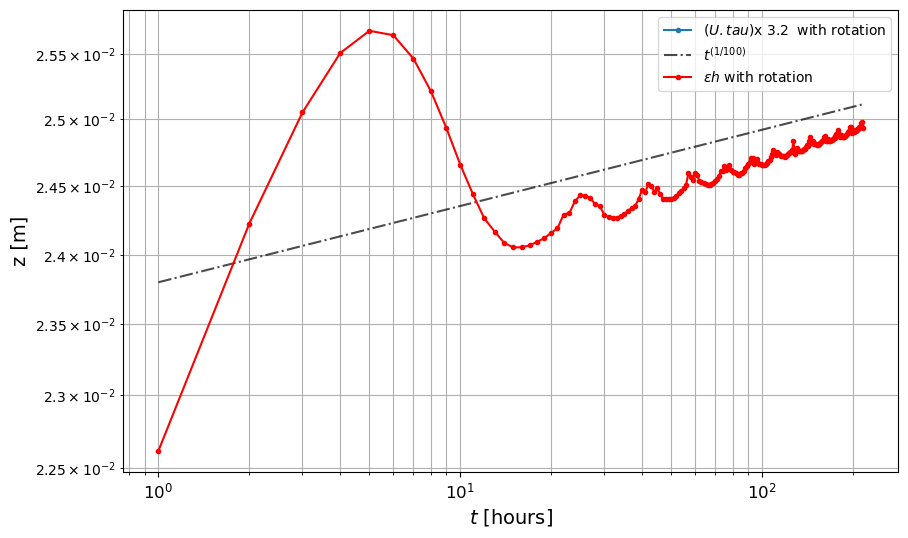

In [327]:
t_12 = np.sqrt(t/hour)
t_14 = (t/hour)**(1/4)*6
t_15 = (t/hour)**(1/100)*0.0238



fig,ax=  plt.subplots(1, figsize=(10, 6))
ax.plot(t[1:]/hour, U_rot[1:]*u_taus_rot[1:]**2*1027*3.4,'.-', label='($U.tau $)x $3.2$  with rotation')
ax.plot(t[1:]/hour, t_15[1:],color='k',alpha=0.7, label='$t^{(1/100)}$', linestyle='-.')
ax.plot(t[1:]/hours,epsilon_rot[1:],'.-', color='r',label='$\epsilon h $ with rotation ' )
ax.set_xscale('log')
ax.set_yscale('log')
#ax.legend(loc='lower center')
ax.legend()
ax.set_ylabel('z [m]', fontsize=14)
ax.set_xlabel('$t$ [hours]', fontsize=14)
ax.tick_params(axis='both', labelsize=12)
ax.grid(which='both')

plt.savefig('hypothese1_eps1')

## $\langle U.\tau \rangle = \int_z \epsilon dz = \epsilon h $?

In [318]:
u_rot

<xarray.Variable (time: 217, z: 200)>
array([[ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,  0.      ],
       [ 0.      ,  0.      ,  0.      , ...,  0.088865,  0.104431,  0.132711],
       [ 0.      ,  0.      ,  0.      , ...,  0.120795,  0.135596,  0.163098],
       ...,
       [-0.      , -0.      , -0.      , ...,  0.029716,  0.043502,  0.069988],
       [-0.      , -0.      , -0.      , ...,  0.023802,  0.03759 ,  0.064079],
       [-0.      , -0.      , -0.      , ...,  0.022472,  0.03626 ,  0.062748]],
      dtype=float32)
Attributes:
    units:          m/s
    long_name:      x-velocity
    standard_name:  ??
    path:           /velocities

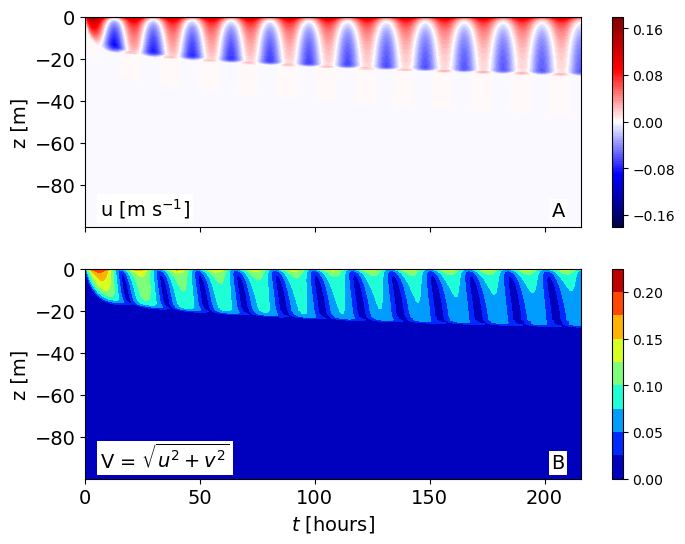

In [319]:


hour  = 3600

#parametre of the plot
H       = - z[iPlt,0]

f= 1e-4


# plot contour plot of entire time series
fig1, (ax1, ax2) = plt.subplots(2, figsize=(8, 6))
plt.subplots_adjust(hspace=0.2)

# generate 1D z-axes for plotting (assuming that grid doesn't change)
z1D   = z[0, :]
zi1D  = zi[0, :]

hour  = 3600

levels = MaxNLocator(nbins=100).tick_values(-u_rot.max(), u_rot.max())
CS1 = ax1.contourf(t/hour, z1D,  u_rot.T, levels=levels, cmap='seismic')
ax1.text(0.94, 0.03, 'A', verticalalignment='bottom', horizontalalignment='left',
         transform=ax1.transAxes, fontsize=14, bbox=bprops)
ax1.text(0.03, 0.03, 'u [m s$^{-1}$]', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax1.transAxes, fontsize=14, bbox=bprops)
ax1.set_ylabel('z [m]', fontsize=14)
ax1.set_ylim([-H, 0])
ax1.tick_params(labelsize=14)
ax1.xaxis.set_ticklabels([])
colorbar = fig1.colorbar(CS1, ax=ax1)
tick_locator = MaxNLocator(nbins=5)
colorbar.locator = tick_locator
colorbar.update_ticks()

u_mean_rot = np.sqrt(u_rot**2+v_rot**2)
levels = MaxNLocator(nbins=10).tick_values(0, u_mean_rot.max())
CS2 = ax2.contourf(t/hour, z1D,  u_mean_rot.T, levels=levels, cmap='jet')
#ax2.plot(t/hour, -h, '--', color='white')
#ax2.axhline(y=-h_ref,color='white', linestyle='--')
ax2.text(0.94, 0.03, 'B', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax2.transAxes, fontsize=14, bbox=bprops)
ax2.text(0.03, 0.03, r'V = $\sqrt{u^2+v^2}$', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax2.transAxes, fontsize=14, bbox=bprops)
ax2.set_ylabel('z [m]', fontsize=14)
ax2.set_ylim([-H, 0])
ax2.tick_params(labelsize=14)
ax2.set_xlabel('$t$ [hours]', fontsize=14)
colorbar2 = fig1.colorbar(CS2, ax=ax2)
tick_locator = MaxNLocator(nbins=5)
colorbar2.locator = tick_locator
colorbar2.update_ticks()

plt.savefig('vitesse_mld')
plt.show()






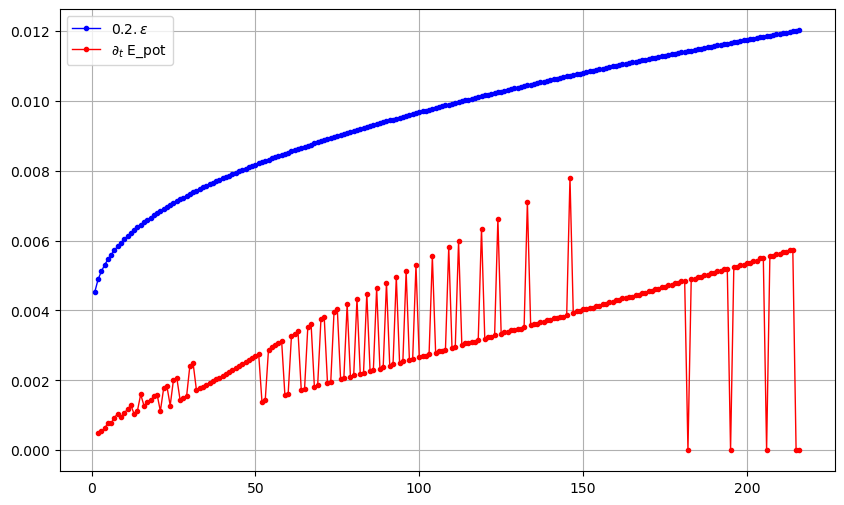

In [320]:
Gamma=0.2
plt.figure(figsize=(10, 6))
#plt.plot(t[1:]/hours, Epot_rot[1:],'.-', color='r', linewidth=1,label='$Epot_{rot}$')

plt.plot(t[1:]/hours, Gamma*epsilon_norot[1:] ,'.-', color='b', linewidth=1,label='$0.2 . \epsilon$')
plt.plot(t[2:]/hours, dEpb_norot[2:],'.-', color='r', linewidth=1,label='$\partial_t$ E_pot')
#plt.plot(t[2:]/hours, dEpot_rot[2:]+dEkin_rot[2:] - (a+1/1.5)*(U_rot[2:]*u_taus_rot[2:]**2)*1027,'.-', color='b', linewidth=1,label='$\partial_t Ekin_{rot}+\partial_t Ekin_{rot}$- In built')
#plt.plot(t[0:]/hours, dKe_rot[0:]+dPe_rot[0:] - (a+1/1.5)*(U_rot*u_taus_rot**2)*1027 ,'.-', color='r', linewidth=1,label='$\partial_t Ekin_{rot}+\partial_t Ekin_{rot}$ - calculated')
plt.legend()
plt.grid()

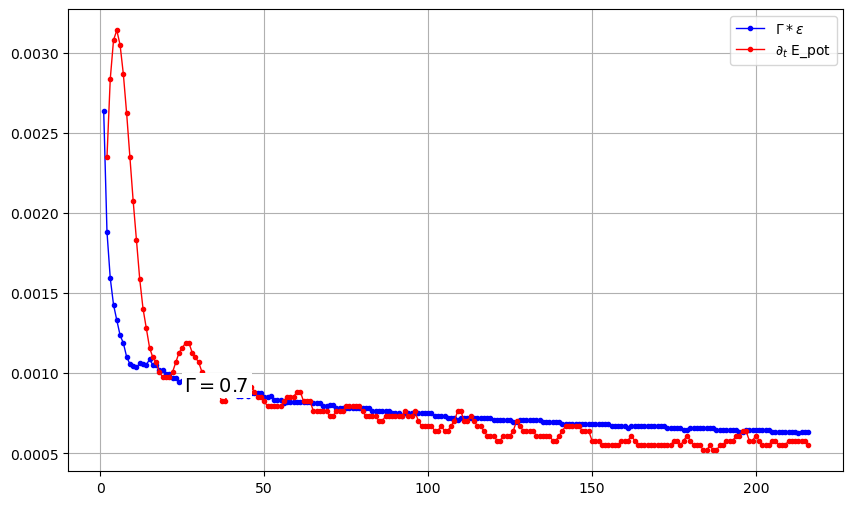

In [321]:
#alpha = -1/2
#Gamma=h_rot[1:]**alpha
Gamma=0.7
alpha = 1
#Gamma=t_14[1:]*alpha
plt.figure(figsize=(10, 6))
#plt.plot(t[1:]/hours, Epot_rot[1:],'.-', color='r', linewidth=1,label='$Epot_{rot}$')

plt.plot(t[1:]/hours, Gamma*epsilon_rot[1:]/h_rot[1:] ,'.-', color='b', linewidth=1,label='$\Gamma * \epsilon$')
plt.plot(t[2:]/hours, dEpot_rot[2:],'.-', color='r', linewidth=1,label='$\partial_t$ E_pot')
#plt.plot(t[2:]/hours, dEpot_rot[2:]+dEkin_rot[2:] - (a+1/1.5)*(U_rot[2:]*u_taus_rot[2:]**2)*1027,'.-', color='b', linewidth=1,label='$\partial_t Ekin_{rot}+\partial_t Ekin_{rot}$- In built')
#plt.plot(t[0:]/hours, dKe_rot[0:]+dPe_rot[0:] - (a+1/1.5)*(U_rot*u_taus_rot**2)*1027 ,'.-', color='r', linewidth=1,label='$\partial_t Ekin_{rot}+\partial_t Ekin_{rot}$ - calculated')
plt.legend()
plt.text(0.3, 0.3, r'$\Gamma= 0.7 $', verticalalignment='top', horizontalalignment='right',
         backgroundcolor='w', transform=ax2.transAxes, fontsize=14, bbox=bprops)

plt.grid()


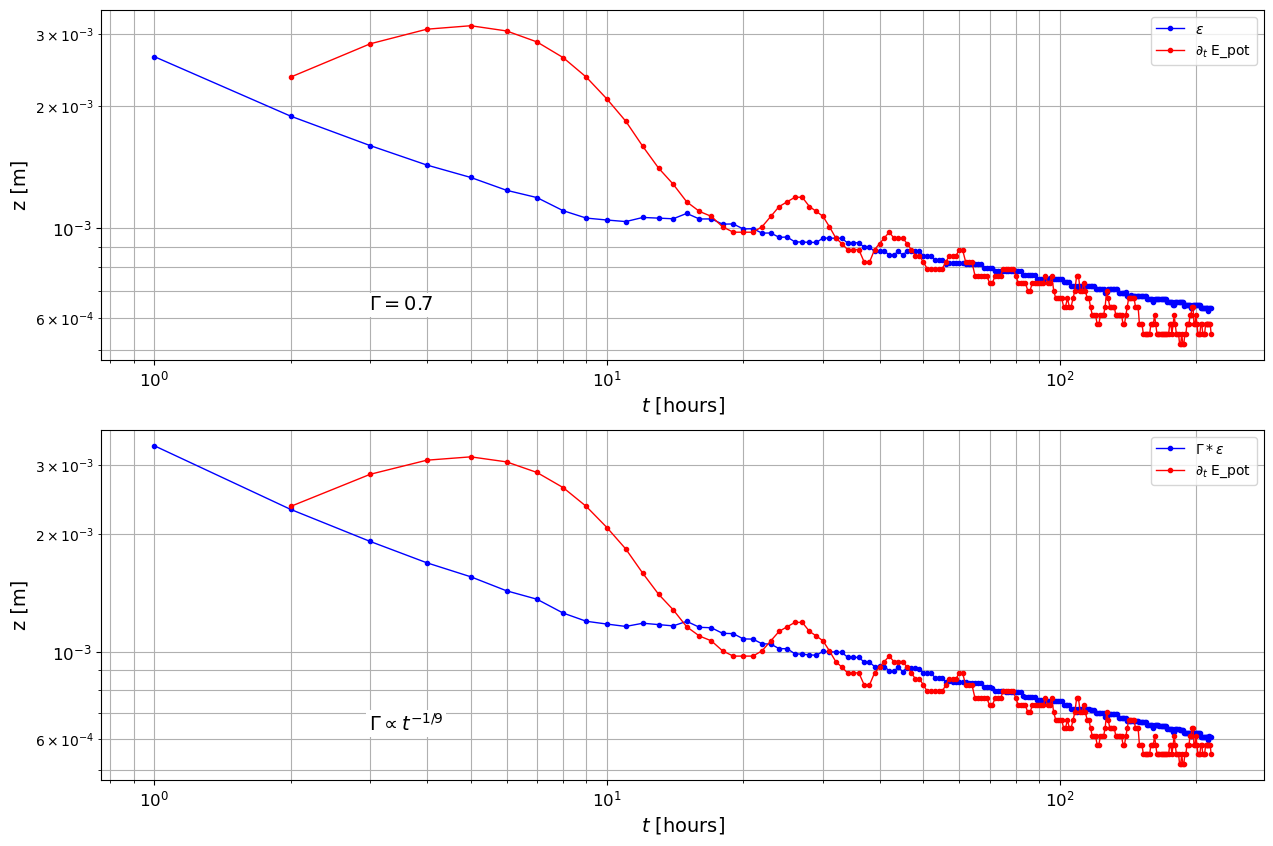

In [322]:
t_12 = np.sqrt(t/hour)
t_14 = (t/hour)**(-1/19)
t_15 = (t/hour)**(-1/5)*0.00238


Gamma=0.7
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

# With rotation
ax1.plot(t[1:]/hours, Gamma*epsilon_rot[1:]/h_rot[1:] ,'.-', color='b', linewidth=1,label='$\epsilon$')
ax1.plot(t[2:]/hours, dEpot_rot[2:],'.-', color='r', linewidth=1,label='$\partial_t$ E_pot')

ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.legend(loc='upper right')
ax1.text(0.23, 0.13, r'$\Gamma =0.7$', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax1.transAxes, fontsize=14, bbox=bprops)
ax1.set_ylabel('z [m]', fontsize=14)
ax1.set_xlabel('$t$ [hours]', fontsize=14)
ax1.tick_params(axis='both', labelsize=12)
ax1.grid(which='both')


alpha = 0.89
Gamma=t_14[1:]*alpha
# Without rotation
ax2.plot(t[1:]/hours, Gamma*epsilon_rot[1:]/h_rot[1:] ,'.-', color='b', linewidth=1,label='$\Gamma * \epsilon$')
ax2.plot(t[2:]/hours, dEpot_rot[2:],'.-', color='r', linewidth=1,label='$\partial_t$ E_pot')

ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.legend(loc='upper right')
ax2.text(0.23, 0.13, r'$\Gamma \propto t^{-1/9}$', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax2.transAxes, fontsize=14, bbox=bprops)
ax2.set_ylabel('z [m]', fontsize=14)
ax2.set_xlabel('$t$ [hours]', fontsize=14)
ax2.tick_params(axis='both', labelsize=12)
ax2.grid(which='both')

plt.savefig('mixing_efficiency')
plt.show()



In [323]:
3/16

0.1875

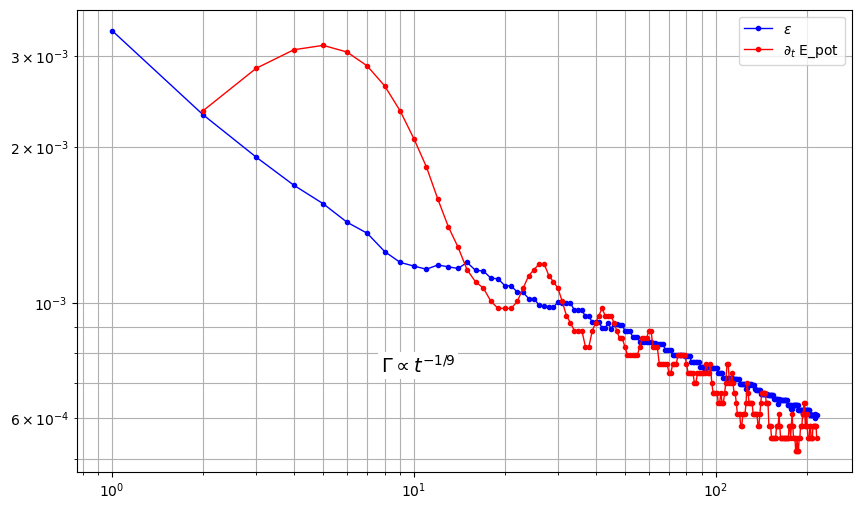

In [324]:
t_12 = np.sqrt(t/hour)
t_14 = (t/hour)**(-1/9)
t_15 = (t/hour)**(-1/5)*0.00238

alpha = 1
#Gamma=t_14[1:]*alpha
#Gamma=0.7
plt.figure(figsize=(10, 6))
plt.plot(t[1:]/hours, Gamma*epsilon_rot[1:]/h_rot[1:] ,'.-', color='b', linewidth=1,label='$\epsilon$')
plt.plot(t[2:]/hours, dEpot_rot[2:],'.-', color='r', linewidth=1,label='$\partial_t$ E_pot')

plt.legend()
plt.text(0.23, 0.13, r'$\Gamma \propto t^{-1/9}$', verticalalignment='top', horizontalalignment='right',
         backgroundcolor='w', transform=ax2.transAxes, fontsize=14, bbox=bprops)
plt.xscale('log')
plt.yscale('log')
plt.grid(which='both')



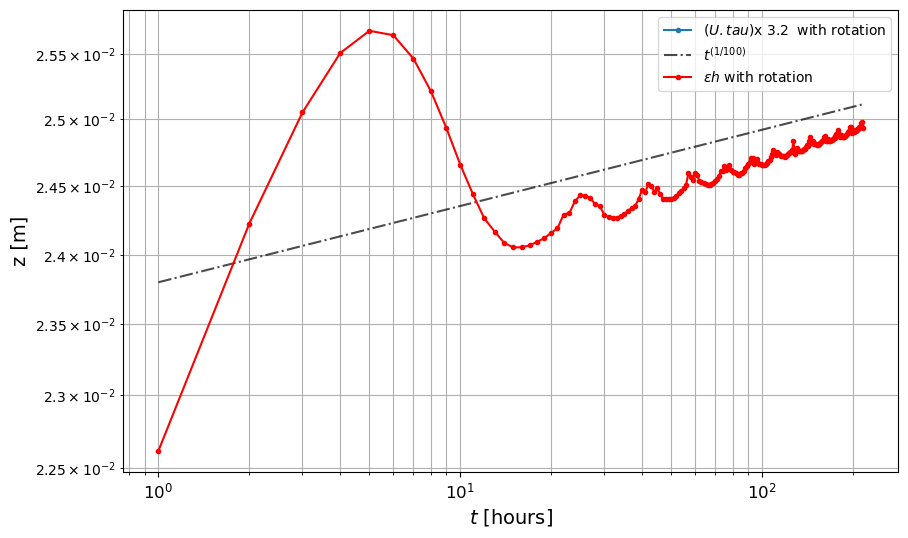

In [325]:
t_12 = np.sqrt(t/hour)
t_14 = (t/hour)**(1/4)*6
t_15 = (t/hour)**(1/100)*0.0238

Gamma=0.7

fig,ax=  plt.subplots(1, figsize=(10, 6))
ax.plot(t[1:]/hour, U_rot[1:]*u_taus_rot[1:]**2*1027*3.4,'.-', label='($U.tau $)x $3.2$  with rotation')
ax.plot(t[1:]/hour, t_15[1:],color='k',alpha=0.7, label='$t^{(1/100)}$', linestyle='-.')
ax.plot(t[1:]/hours,epsilon_rot[1:],'.-', color='r',label='$\epsilon h $ with rotation ' )
ax.set_xscale('log')
ax.set_yscale('log')
#ax.legend(loc='lower center')
ax.legend()
ax.set_ylabel('z [m]', fontsize=14)
ax.set_xlabel('$t$ [hours]', fontsize=14)
ax.tick_params(axis='both', labelsize=12)
ax.grid(which='both')

plt.savefig('hypothese1_eps1')

## Bilan d'energie dans le cas sans rotation


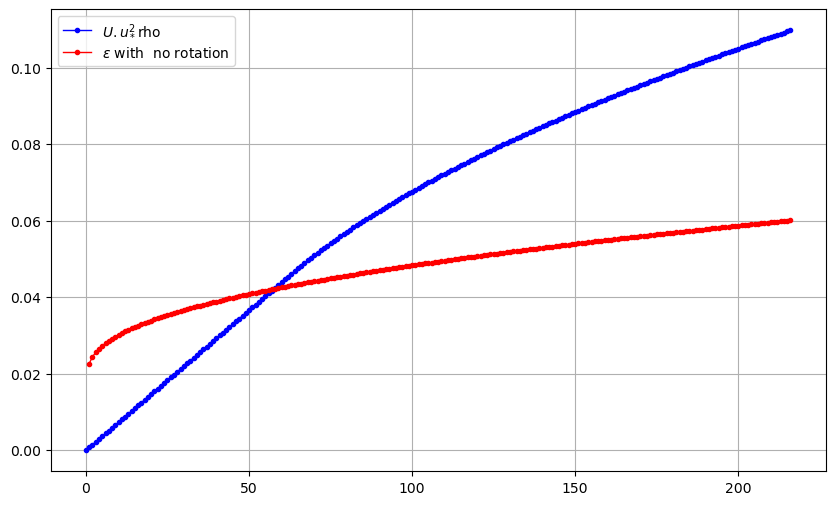

In [291]:
plt.figure(figsize=(10, 6))
plt.plot(t/hours, U_norot*u_taus_norot**2*1027.,'.-', color='b', linewidth=1,label='$ U.u_*^2$rho  ')
plt.plot(t[1:]/hours,epsilon_norot[1:],'.-', color='r', linewidth=1,label='$\epsilon $ with  no rotation')
plt.legend()
plt.grid()

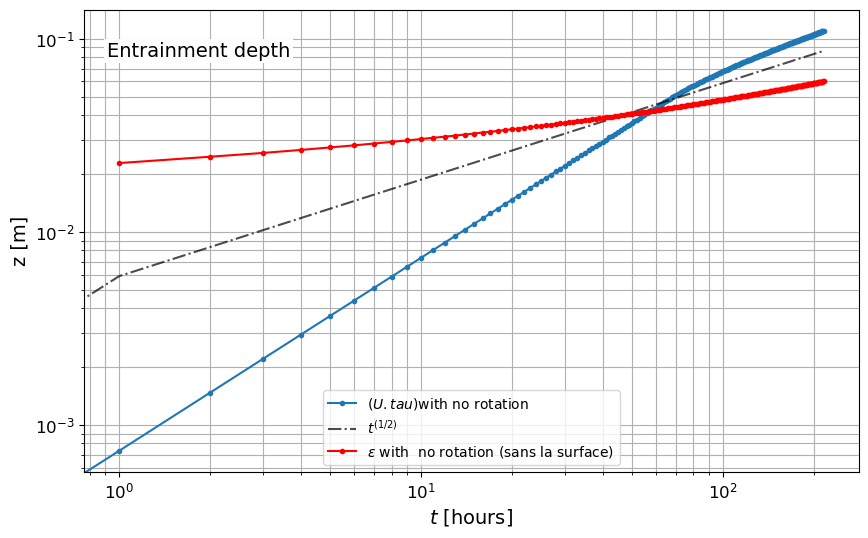

In [292]:
t_12 = np.sqrt(t/hour)
t_14 = (t/hour)**(1/4)*6
t_15 = (t/hour)**(1/6)



fig,ax=  plt.subplots(1, figsize=(10, 6))
ax.plot(t/hour, U_norot*u_taus_norot**2*1027,'.-', label='($U.tau$)with no rotation')
ax.plot(t/hour, t_12/170,color='k',alpha=0.7, label='$t^{(1/2)}$', linestyle='-.')
ax.plot(t[1:]/hours,epsilon_norot[1:],'.-', color='r',label='$\epsilon $ with  no rotation (sans la surface)' )
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(loc='lower center')
ax.text(0.03, 0.89, 'Entrainment depth', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax.transAxes, fontsize=14, bbox=bprops)
ax.set_ylabel('z [m]', fontsize=14)
ax.set_xlabel('$t$ [hours]', fontsize=14)
ax.tick_params(axis='both', labelsize=12)
ax.grid(which='both')
#plt.savefig('utau_epsilon_sans_rotation.png')

#### KE 

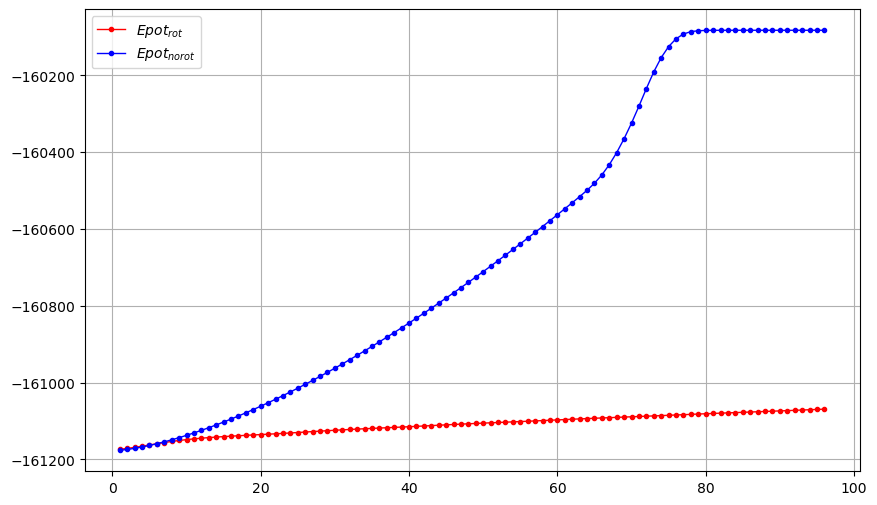

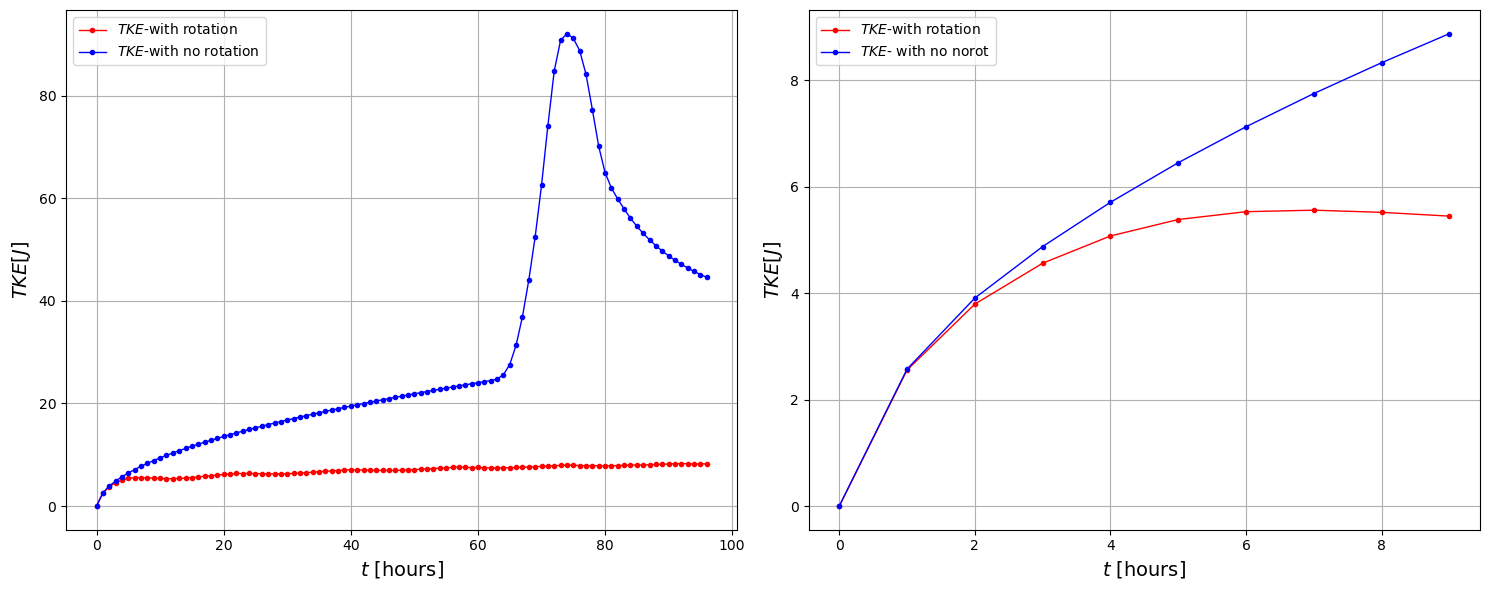

In [251]:
hours= 3600
plt.figure(figsize=(10, 6))
plt.plot(t[1:]/hours, Epot_rot[1:],'.-', color='r', linewidth=1,label='$Epot_{rot}$')
plt.plot(t[1:]/hours, Epot_norot[1:],'.-', color='b', linewidth=1,label='$Epot_{norot}$')
plt.legend()
plt.grid()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))


ax1.plot(t/hours, Eturb_rot,'.-', color='r', linewidth=1, label='$TKE$-with rotation')
ax1.plot(t/hours, Eturb_norot,'.-', color='b', linewidth=1, label='$TKE$-with no rotation')
ax1.legend()
ax1.grid()
ax1.set_xlabel('$t$ [hours]', fontsize=14)
ax1.set_ylabel('$TKE [J]$', fontsize=14)

#zoom on the early stages 
ax2.plot(t[:10]/hours, Eturb_rot[:10],'.-', color='r', linewidth=1, label='$TKE$-with rotation')
ax2.plot(t[:10]/hours, Eturb_norot[:10],'.-', color='b', linewidth=1, label='$TKE$- with no norot')
ax2.legend()
ax2.grid()
ax2.set_xlabel('$t$ [hours]', fontsize=14)
ax2.set_ylabel('$TKE [J] $', fontsize=14)

# Pour afficher les deux graphiques côte à côte
plt.tight_layout()
plt.show()

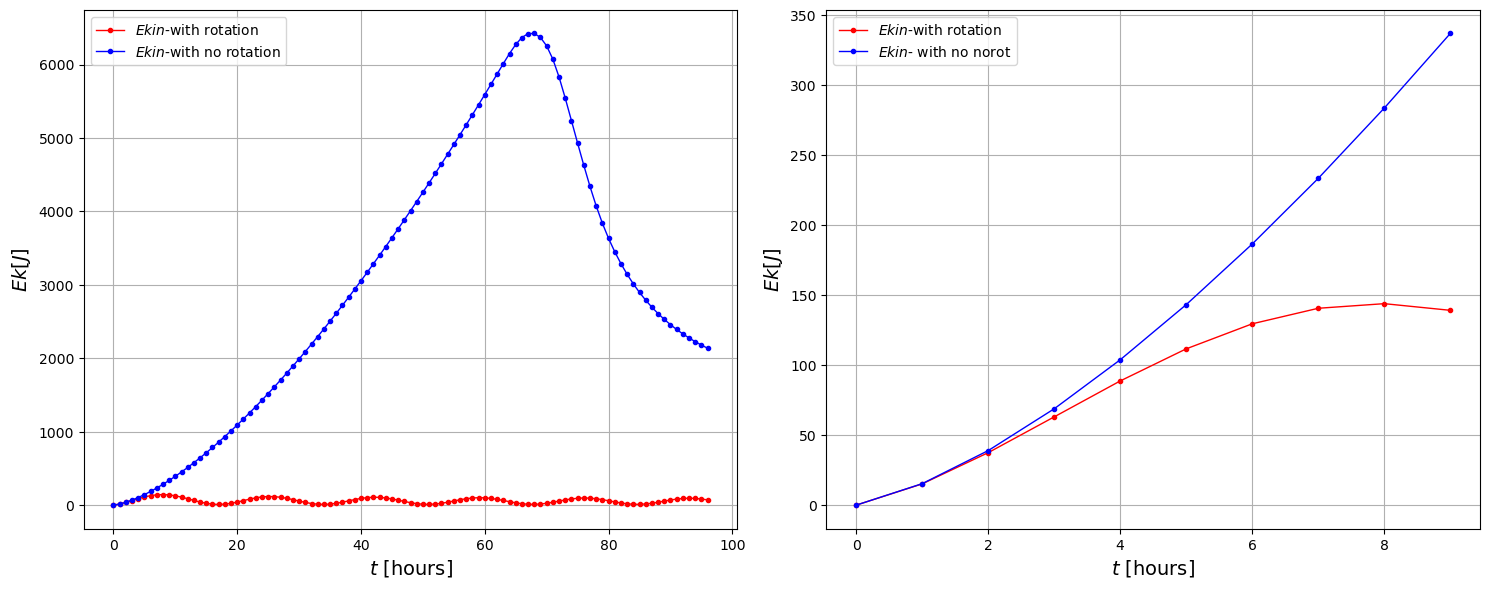

In [252]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))


ax1.plot(t/hours, Ekin_rot,'.-', color='r', linewidth=1, label='$Ekin$-with rotation')
ax1.plot(t/hours, Ekin_norot,'.-', color='b', linewidth=1, label='$Ekin$-with no rotation')
ax1.legend()
ax1.grid()
ax1.set_xlabel('$t$ [hours]', fontsize=14)
ax1.set_ylabel('$Ek [J]$', fontsize=14)

#zoom on the early stages 
ax2.plot(t[:10]/hours, Ekin_rot[:10],'.-', color='r', linewidth=1, label='$Ekin$-with rotation')
ax2.plot(t[:10]/hours, Ekin_norot[:10],'.-', color='b', linewidth=1, label='$Ekin$- with no norot')
ax2.legend()
ax2.grid()
ax2.set_xlabel('$t$ [hours]', fontsize=14)
ax2.set_ylabel('$Ek [J]$', fontsize=14)

# Pour afficher les deux graphiques côte à côte
plt.tight_layout()
plt.show()

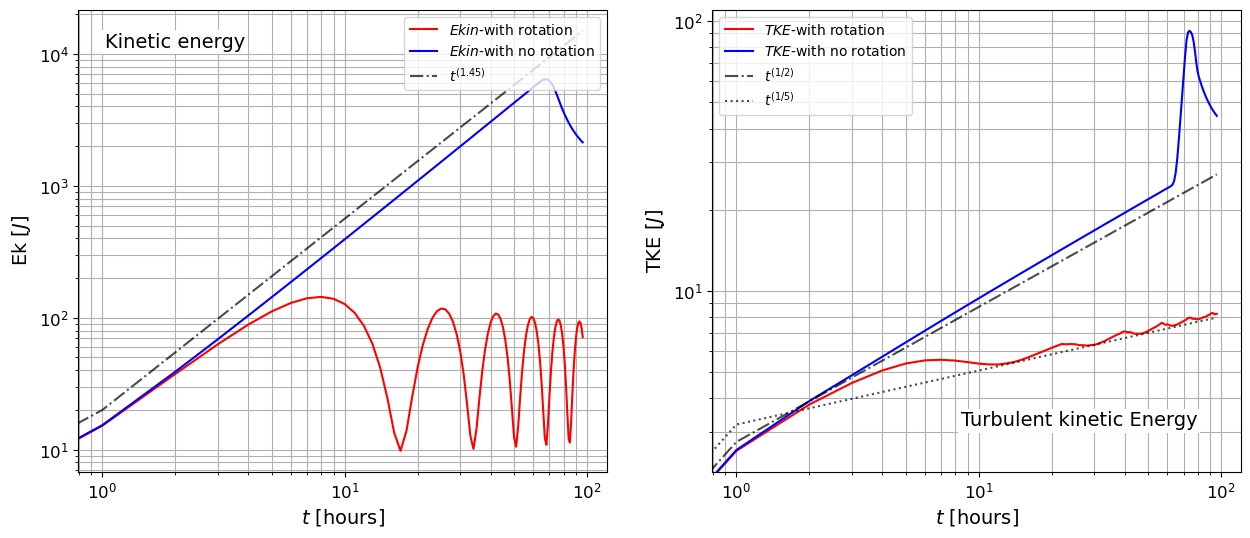

In [1805]:
t_1  =(t/hour)**1.45*20

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# With rotation
ax1.plot(t/hour, Ekin_rot, color='r', label='$Ekin$-with rotation')
ax1.plot(t/hour, Ekin_norot,color='b', label='$Ekin$-with no rotation')
ax1.plot(t/hour, t_1,color='k',alpha=0.7, label='$t^{(1.45)}$', linestyle='-.')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.legend(loc='upper right')
ax1.text(0.05, 0.91, 'Kinetic energy', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax1.transAxes, fontsize=14, bbox=bprops)
ax1.set_ylabel('Ek $[J]$', fontsize=14)
ax1.set_xlabel('$t$ [hours]', fontsize=14)
ax1.tick_params(axis='both', labelsize=12)
ax1.grid(which='both')




#TKE
t_12 = (t/hour)**(1/2)*2.76
t_15 = (t/hour)**(1/5)*3.2

ax2.plot(t/hour, Eturb_rot,color='r' ,label='$TKE$-with rotation')
ax2.plot(t/hour, Eturb_norot,color='b', label='$TKE$-with no rotation')
ax2.plot(t/hour, t_12,color='k',alpha=0.7, label='$t^{(1/2)}$', linestyle='-.')
ax2.plot(t/hour, t_15,color='k',alpha=0.7, label='$t^{(1/5)}$', linestyle=':')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.legend(loc='upper left')
ax2.text(0.47, 0.09, 'Turbulent kinetic Energy', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax2.transAxes, fontsize=14, bbox=bprops)
ax2.set_ylabel('TKE $[J]$', fontsize=14)
ax2.set_xlabel('$t$ [hours]', fontsize=14)
ax2.tick_params(axis='both', labelsize=12)
ax2.grid(which='both')


plt.show()

### Time evolution of local Turbulent kinetic energie

Evolution de $k$, $\epsilon$ , $P$ shear production, $G$ buoyancy production

In [11]:


hour  = 3600

#parametre of the plot
H       = - z[iPlt,0]#-470


# plot contour plot of entire time series
fig1, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize=(8, 13))
plt.subplots_adjust(hspace=0.2)

# generate 1D z-axes for plotting (assuming that grid doesn't change)
z1D   = z[0, :]
zi1D  = zi[0, :]

hour  = 3600
cmap = plt.cm.get_cmap('inferno')
levels = MaxNLocator(nbins=40).tick_values(tke_rot.min(), tke_rot.max())
CS1 = ax1.contourf(t/hour, zi1D,  tke_rot.T, levels=levels, cmap=cmap)#cmocean.cm.thermal)
#ax1.plot(t/hour, -h_poll_rot, '--', color='white',label='Pollard et al. (1973)')
ax1.text(0.94, 0.03, 'A', verticalalignment='bottom', horizontalalignment='left',
         transform=ax1.transAxes, fontsize=14, bbox=bprops)
ax1.text(0.03, 0.03, '$TKE_{rot}$ [m$^{2}$ s$^{-2}$]', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax1.transAxes, fontsize=14, bbox=bprops)
ax1.legend(loc='lower center')
ax1.set_ylabel('z [m]', fontsize=14)
ax1.set_ylim([-H, 0])
ax1.tick_params(labelsize=14)
ax1.xaxis.set_ticklabels([])
colorbar = fig1.colorbar(CS1, ax=ax1)
tick_locator = MaxNLocator(nbins=5)
colorbar.locator = tick_locator
colorbar.update_ticks()

cmap = plt.cm.get_cmap('seismic')
levels = MaxNLocator(nbins=40).tick_values(eps_rot.min(), eps_rot.max())
CS2 = ax2.contourf(t/hour, zi1D,eps_rot.T, levels=levels,  extend='min',cmap=cmap.reversed())
#ax2.plot(t/hour, -h_poll_rot, '--', color='white')
#ax2.axhline(y=-h_ref,color='white', linestyle='--')
ax2.text(0.94, 0.03, 'B', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax2.transAxes, fontsize=14, bbox=bprops)
ax2.text(0.03, 0.03, r'log($\epsilon_{rot}$)', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax2.transAxes, fontsize=14, bbox=bprops)
ax2.set_ylabel('z [m]', fontsize=14)
ax2.set_ylim([-H, 0])
ax2.tick_params(labelsize=14)
ax2.xaxis.set_ticklabels([])
colorbar2 = fig1.colorbar(CS2, ax=ax2)
tick_locator = MaxNLocator(nbins=5)
colorbar2.locator = tick_locator
colorbar2.update_ticks()

cmap = plt.cm.get_cmap('plasma')
levels = MaxNLocator(nbins=40).tick_values(-5.5, np.log10(P_rot).max())
CS3 = ax3.contourf(t/hour, zi1D, np.log10(P_rot.T), levels=levels, extend='min', cmap=cmap)
#ax3.plot(t/hour, -h_poll_rot, '--', color='white')
#ax3.axhline(y=-h_ref,color='white', linestyle='--')
ax3.text(0.94, 0.03, 'C', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax3.transAxes, fontsize=14, bbox=bprops)
ax3.text(0.03, 0.03, r'log($P_{rot}$ Shear prod', verticalalignment='bottom',
         horizontalalignment='left', backgroundcolor='w', transform=ax3.transAxes,
         fontsize=14, bbox=bprops)
ax3.xaxis.set_ticklabels([])
ax3.set_ylabel('z [m]', fontsize=14)
ax3.set_ylim([-H+25, 0])
ax3.tick_params(labelsize=14)
tick_locator = MaxNLocator(nbins=5)
colorbar3 = fig1.colorbar(CS3, ax=ax3)
colorbar3.locator = tick_locator
colorbar3.update_ticks()



cmap = plt.cm.get_cmap('plasma')
levels = MaxNLocator(nbins=40).tick_values(G_rot.min(), G_rot.max())
CS4 = ax4.contourf(t/hour, zi1D, G_rot.T, levels=levels, extend='min', cmap='jet')
#ax4.plot(t/hour, -h_poll_rot, '--', color='white')
#ax3.axhline(y=-h_ref,color='white', linestyle='--')
ax4.text(0.94, 0.03, 'D', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax4.transAxes, fontsize=14, bbox=bprops)
ax4.text(0.03, 0.03, r'$G_{rot}$ Buoyancy prod', verticalalignment='bottom',
         horizontalalignment='left', backgroundcolor='w', transform=ax4.transAxes,
         fontsize=14, bbox=bprops)
ax4.set_xlabel('$t$ [hours]', fontsize=14)
ax4.set_ylabel('z [m]', fontsize=14)
ax4.set_ylim([-H, 0])
ax4.tick_params(labelsize=14)
tick_locator = MaxNLocator(nbins=5)
colorbar4 = fig1.colorbar(CS4, ax=ax4)
colorbar4.locator = tick_locator
colorbar4.update_ticks()


plt.show()

NameError: name 'z' is not defined

In [ ]:
#parametre of the plot
H       = - z[iPlt,0]-470


# plot contour plot of entire time series
fig1, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize=(8, 13))
plt.subplots_adjust(hspace=0.2)

# generate 1D z-axes for plotting (assuming that grid doesn't change)
z1D   = z[0, :]
zi1D  = zi[0, :]

hour  = 3600
cmap = plt.cm.get_cmap('inferno')
levels = MaxNLocator(nbins=40).tick_values(tke_rot.min(), tke_rot.max())
CS1 = ax1.contourf(t/hour, zi1D,  tke_rot.T, levels=levels, cmap=cmap)#cmocean.cm.thermal)
ax1.plot(t/hour, -h_poll_rot, '--', color='white',label='Pollard et al. (1973)')
ax1.text(0.94, 0.03, 'A', verticalalignment='bottom', horizontalalignment='left',
         transform=ax1.transAxes, fontsize=14, bbox=bprops)
ax1.text(0.03, 0.03, '$TKE_{rot}$ [m$^{2}$ s$^{-2}$]', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax1.transAxes, fontsize=14, bbox=bprops)
ax1.legend(loc='lower center')
ax1.set_ylabel('z [m]', fontsize=14)
ax1.set_ylim([-H, 0])
ax1.tick_params(labelsize=14)
ax1.xaxis.set_ticklabels([])
colorbar = fig1.colorbar(CS1, ax=ax1)
tick_locator = MaxNLocator(nbins=5)
colorbar.locator = tick_locator
colorbar.update_ticks()

cmap = plt.cm.get_cmap('seismic')
levels = MaxNLocator(nbins=40).tick_values(1e-5, (eps_rot).max())
CS2 = ax2.contourf(t/hour, zi1D,(eps_rot).T, levels=levels,  extend='min',cmap=cmap.reversed())
ax2.plot(t/hour, -h_poll_rot, '--', color='white')
#ax2.axhline(y=-h_ref,color='white', linestyle='--')
ax2.text(0.94, 0.03, 'B', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax2.transAxes, fontsize=14, bbox=bprops)
ax2.text(0.03, 0.03, r'log($\epsilon_{rot}$)', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax2.transAxes, fontsize=14, bbox=bprops)
ax2.set_ylabel('z [m]', fontsize=14)
ax2.set_ylim([-H, 0])
ax2.tick_params(labelsize=14)
ax2.xaxis.set_ticklabels([])
colorbar2 = fig1.colorbar(CS2, ax=ax2)
tick_locator = MaxNLocator(nbins=5)
colorbar2.locator = tick_locator
colorbar2.update_ticks()

cmap = plt.cm.get_cmap('plasma')
levels = MaxNLocator(nbins=40).tick_values(-5.5, np.log10(P_rot).max())
CS3 = ax3.contourf(t/hour, zi1D, np.log10(P_rot.T), levels=levels, extend='min', cmap=cmap)
ax3.plot(t/hour, -h_poll_rot, '--', color='white')
#ax3.axhline(y=-h_ref,color='white', linestyle='--')
ax3.text(0.94, 0.03, 'C', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax3.transAxes, fontsize=14, bbox=bprops)
ax3.text(0.03, 0.03, r'log($P_{rot}$ Shear prod', verticalalignment='bottom',
         horizontalalignment='left', backgroundcolor='w', transform=ax3.transAxes,
         fontsize=14, bbox=bprops)
ax3.xaxis.set_ticklabels([])
ax3.set_ylabel('z [m]', fontsize=14)
ax3.set_ylim([-H+25, 0])
ax3.tick_params(labelsize=14)
tick_locator = MaxNLocator(nbins=5)
colorbar3 = fig1.colorbar(CS3, ax=ax3)
colorbar3.locator = tick_locator
colorbar3.update_ticks()



cmap = plt.cm.get_cmap('plasma')
levels = MaxNLocator(nbins=40).tick_values(G_rot.min(), G_rot.max())
CS4 = ax4.contourf(t/hour, zi1D, G_rot.T, levels=levels, extend='min', cmap=cmap.reversed())
ax4.plot(t/hour, -h_poll_rot, '--', color='white')
#ax3.axhline(y=-h_ref,color='white', linestyle='--')
ax4.text(0.94, 0.03, 'D', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax4.transAxes, fontsize=14, bbox=bprops)
ax4.text(0.03, 0.03, r'$G_{rot}$ Buoyancy prod', verticalalignment='bottom',
         horizontalalignment='left', backgroundcolor='w', transform=ax4.transAxes,
         fontsize=14, bbox=bprops)
ax4.set_xlabel('$t$ [hours]', fontsize=14)
ax4.set_ylabel('z [m]', fontsize=14)
ax4.set_ylim([-H, 0])
ax4.tick_params(labelsize=14)
tick_locator = MaxNLocator(nbins=5)
colorbar4 = fig1.colorbar(CS4, ax=ax4)
colorbar4.locator = tick_locator
colorbar4.update_ticks()


plt.show()

/var/folders/gl/qr_d872d4sj6k_rm1k6tskj80000gq/T/ipykernel_22327/3141910426.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('inferno')
/var/folders/gl/qr_d872d4sj6k_rm1k6tskj80000gq/T/ipykernel_22327/3141910426.py:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('seismic')
/var/folders/gl/qr_d872d4sj6k_rm1k6tskj80000gq/T/ipykernel_22327/3141910426.py:50: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('pl

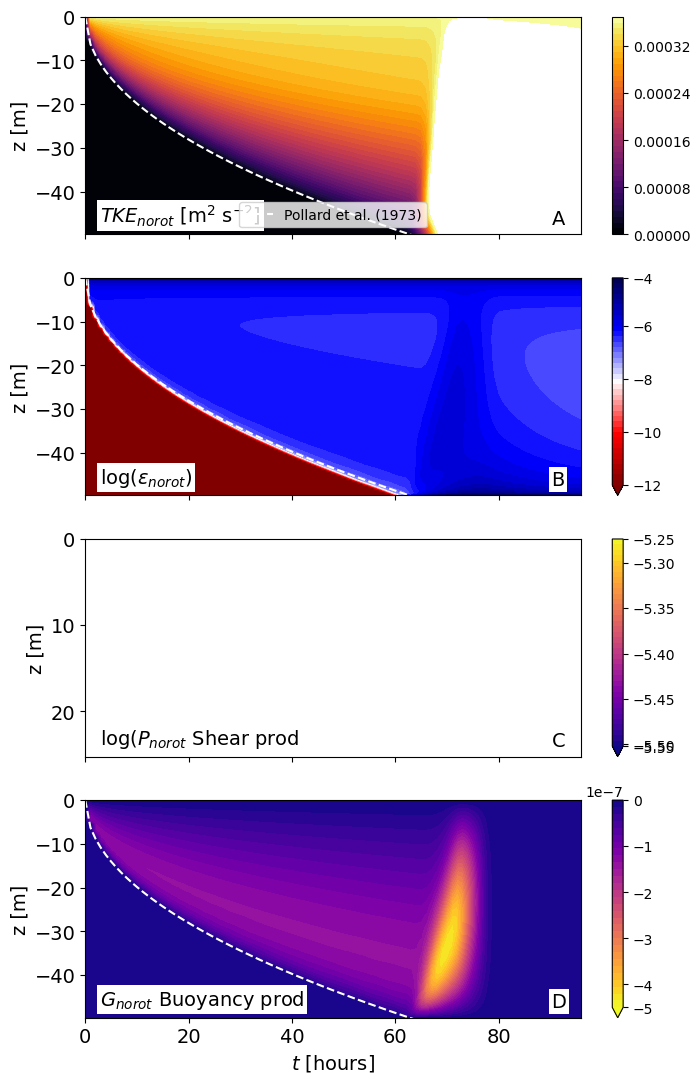

In [1809]:
#parametre of the plot
H       = - z[iPlt,0]#-420


# plot contour plot of entire time series
fig1, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize=(8, 13))
plt.subplots_adjust(hspace=0.2)

# generate 1D z-axes for plotting (assuming that grid doesn't change)
z1D   = z[0, :]
zi1D  = zi[0, :]

hour  = 3600
cmap = plt.cm.get_cmap('inferno')
levels = MaxNLocator(nbins=40).tick_values(tke_norot.min(), tke_rot.max())
CS1 = ax1.contourf(t/hour, zi1D,  tke_norot.T, levels=levels, cmap=cmap)#cmocean.cm.thermal)
ax1.plot(t/hour, -h_poll_norot, '--', color='white',label='Pollard et al. (1973)')
ax1.text(0.94, 0.03, 'A', verticalalignment='bottom', horizontalalignment='left',
         transform=ax1.transAxes, fontsize=14, bbox=bprops)
ax1.text(0.03, 0.03, '$TKE_{norot}$ [m$^{2}$ s$^{-2}$]', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax1.transAxes, fontsize=14, bbox=bprops)
ax1.legend(loc='lower center')
ax1.set_ylabel('z [m]', fontsize=14)
ax1.set_ylim([-H, 0])
ax1.tick_params(labelsize=14)
ax1.xaxis.set_ticklabels([])
colorbar = fig1.colorbar(CS1, ax=ax1)
tick_locator = MaxNLocator(nbins=5)
colorbar.locator = tick_locator
colorbar.update_ticks()

cmap = plt.cm.get_cmap('seismic')
levels = MaxNLocator(nbins=40).tick_values(-12, np.log10((eps_rot)).max())
CS2 = ax2.contourf(t/hour, zi1D,np.log10(eps_norot).T, levels=levels,  extend='min',cmap=cmap.reversed())
ax2.plot(t/hour, -h_poll_norot, '--', color='white')
#ax2.axhline(y=-h_ref,color='white', linestyle='--')
ax2.text(0.94, 0.03, 'B', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax2.transAxes, fontsize=14, bbox=bprops)
ax2.text(0.03, 0.03, r'log($\epsilon_{norot}$)', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax2.transAxes, fontsize=14, bbox=bprops)
ax2.set_ylabel('z [m]', fontsize=14)
ax2.set_ylim([-H, 0])
ax2.tick_params(labelsize=14)
ax2.xaxis.set_ticklabels([])
colorbar2 = fig1.colorbar(CS2, ax=ax2)
tick_locator = MaxNLocator(nbins=5)
colorbar2.locator = tick_locator
colorbar2.update_ticks()

cmap = plt.cm.get_cmap('plasma')
levels = MaxNLocator(nbins=40).tick_values(-5.5, np.log10(P_rot).max())
CS3 = ax3.contourf(t/hour, zi1D, np.log10(P_norot.T), levels=levels, extend='min', cmap=cmap)
ax3.plot(t/hour, -h_poll_norot, '--', color='white')
#ax3.axhline(y=-h_ref,color='white', linestyle='--')
ax3.text(0.94, 0.03, 'C', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax3.transAxes, fontsize=14, bbox=bprops)
ax3.text(0.03, 0.03, r'log($P_{norot}$ Shear prod', verticalalignment='bottom',
         horizontalalignment='left', backgroundcolor='w', transform=ax3.transAxes,
         fontsize=14, bbox=bprops)
ax3.xaxis.set_ticklabels([])
ax3.set_ylabel('z [m]', fontsize=14)
ax3.set_ylim([-H+75, 0])
ax3.tick_params(labelsize=14)
tick_locator = MaxNLocator(nbins=5)
colorbar3 = fig1.colorbar(CS3, ax=ax3)
colorbar3.locator = tick_locator
colorbar3.update_ticks()



cmap = plt.cm.get_cmap('plasma')
levels = MaxNLocator(nbins=40).tick_values(G_norot.min(), G_rot.max())
CS4 = ax4.contourf(t/hour, zi1D, G_norot.T, levels=levels, extend='min', cmap=cmap.reversed())
ax4.plot(t/hour, -h_poll_norot, '--', color='white')
#ax3.axhline(y=-h_ref,color='white', linestyle='--')
ax4.text(0.94, 0.03, 'D', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax4.transAxes, fontsize=14, bbox=bprops)
ax4.text(0.03, 0.03, r'$G_{norot}$ Buoyancy prod', verticalalignment='bottom',
         horizontalalignment='left', backgroundcolor='w', transform=ax4.transAxes,
         fontsize=14, bbox=bprops)
ax4.set_xlabel('$t$ [hours]', fontsize=14)
ax4.set_ylabel('z [m]', fontsize=14)
ax4.set_ylim([-H, 0])
ax4.tick_params(labelsize=14)
tick_locator = MaxNLocator(nbins=5)
colorbar4 = fig1.colorbar(CS4, ax=ax4)
colorbar4.locator = tick_locator
colorbar4.update_ticks()


plt.show()

### Time evolution of local Turbulent diffusivity

/var/folders/gl/qr_d872d4sj6k_rm1k6tskj80000gq/T/ipykernel_22327/347826264.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('cividis')
/Users/maxcoppin/anaconda3/envs/gotm/lib/python3.9/site-packages/xarray/core/computation.py:808: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/Users/maxcoppin/anaconda3/envs/gotm/lib/python3.9/site-packages/xarray/core/computation.py:808: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


ValueError: x and y must have same first dimension, but have shapes (97,) and (217,)

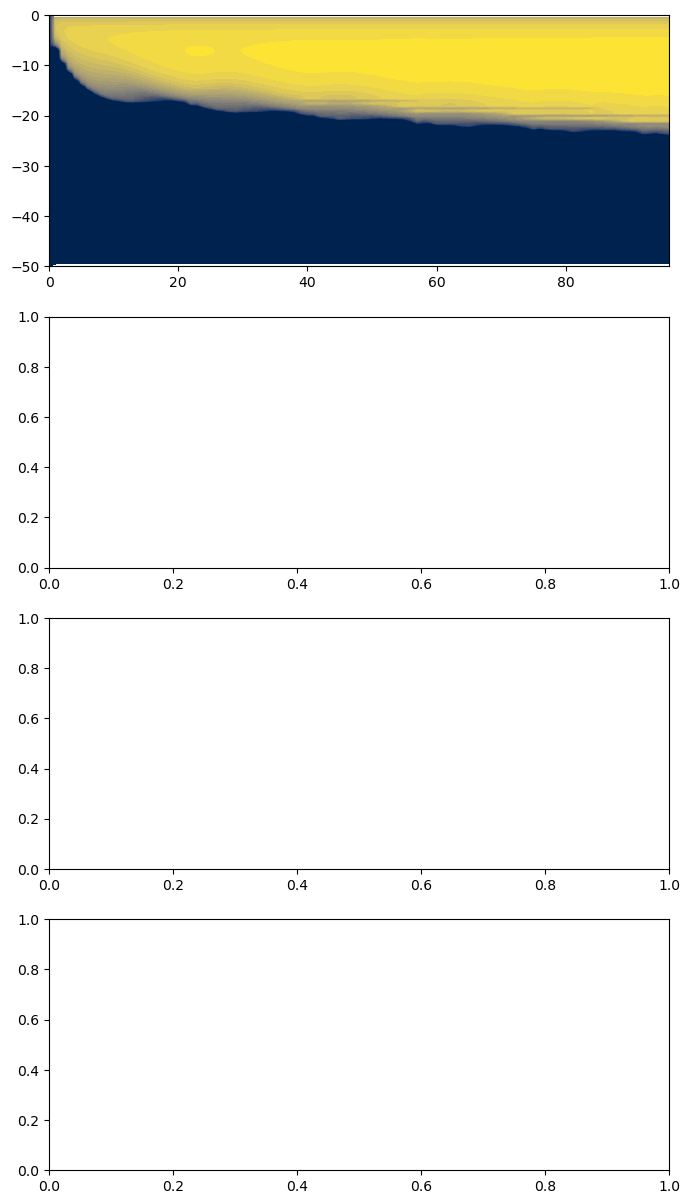

In [1808]:
#parametre of the plot
H       = - z[iPlt,0]-470


# plot contour plot of entire time series
fig1, (ax1, ax2, ax3,ax4) = plt.subplots(4, figsize=(8, 15))
plt.subplots_adjust(hspace=0.2)

# generate 1D z-axes for plotting (assuming that grid doesn't change)
z1D   = z[0, :]
zi1D  = zi[0, :]

hour  = 3600

cmap = plt.cm.get_cmap('cividis')
levels = MaxNLocator(nbins=40).tick_values(-6, np.log10(num_rot).max())
CS1 = ax1.contourf(t/hour, zi1D, np.log10(num_rot.T), levels=levels, extend='min', cmap=cmap)
ax1.plot(t/hour, -h_poll_rot, '--', color='white')
#ax2.axhline(y=-h_ref,color='white', linestyle='--')
ax1.text(0.94, 0.03, 'B', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax1.transAxes, fontsize=14, bbox=bprops)
ax1.text(0.03, 0.03, r'log($\nu^m_t$ [m$^2$ s$^{-1})$]', verticalalignment='bottom',
         horizontalalignment='left', backgroundcolor='w', transform=ax1.transAxes,
         fontsize=14, bbox=bprops)
ax1.set_ylabel('z [m]', fontsize=14)
ax1.set_ylim([-H, 0])
ax1.tick_params(labelsize=14)
ax1.xaxis.set_ticklabels([])
colorbar1 = fig1.colorbar(CS1, ax=ax1)
tick_locator = MaxNLocator(nbins=5)
colorbar1.locator = tick_locator
colorbar1.update_ticks()


cmap = plt.cm.get_cmap('cividis')
levels = MaxNLocator(nbins=40).tick_values(-6, np.log10(nus_rot).max())
CS2 = ax2.contourf(t/hour, zi1D, np.log10(nus_rot.T), levels=levels, extend='min', cmap=cmap)
ax2.plot(t/hour, -h_poll_rot, '--', color='white')
#ax2.axhline(y=-h_ref,color='white', linestyle='--')
ax2.text(0.94, 0.03, 'B', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax2.transAxes, fontsize=14, bbox=bprops)
ax2.text(0.03, 0.03, r'log($\nu^s_t$ [m$^2$ s$^{-1})$]', verticalalignment='bottom',
         horizontalalignment='left', backgroundcolor='w', transform=ax2.transAxes,
         fontsize=14, bbox=bprops)
ax2.set_ylabel('z [m]', fontsize=14)
ax2.set_ylim([-H, 0])
ax2.tick_params(labelsize=14)
ax2.xaxis.set_ticklabels([])
colorbar2 = fig1.colorbar(CS2, ax=ax2)
tick_locator = MaxNLocator(nbins=5)
colorbar2.locator = tick_locator
colorbar2.update_ticks()

cmap = plt.cm.get_cmap('cividis')
levels = MaxNLocator(nbins=40).tick_values(-6, np.log10(nuh_rot).max())
CS3 = ax3.contourf(t/hour, zi1D, np.log10(nuh_rot.T), levels=levels, extend='min', cmap=cmap)
ax3.plot(t/hour, -h_poll_rot, '--', color='white')
#ax3.axhline(y=-h_ref,color='white', linestyle='--')
ax3.text(0.94, 0.03, 'C', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax3.transAxes, fontsize=14, bbox=bprops)
ax3.text(0.03, 0.03, r'log($\nu^h_t$ [m$^2$ s$^{-1})$]', verticalalignment='bottom',
         horizontalalignment='left', backgroundcolor='w', transform=ax3.transAxes,
         fontsize=14, bbox=bprops)
ax2.xaxis.set_ticklabels([])
ax3.set_ylabel('z [m]', fontsize=14)
ax3.set_ylim([-H, 0])
ax3.tick_params(labelsize=14)
tick_locator = MaxNLocator(nbins=5)
colorbar3 = fig1.colorbar(CS3, ax=ax3)
colorbar3.locator = tick_locator
colorbar3.update_ticks()

cmap = plt.cm.get_cmap('cividis')
levels = MaxNLocator(nbins=40).tick_values(-6, np.log10(avh_rot).max())
CS4 = ax4.contourf(t/hour, z1D, np.log10(avh_rot.T), levels=levels, extend='min', cmap=cmap)
ax4.plot(t/hour, -h_poll_rot, '--', color='white')
#ax3.axhline(y=-h_ref,color='white', linestyle='--')
ax4.text(0.94, 0.03, 'C', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax4.transAxes, fontsize=14, bbox=bprops)
ax4.text(0.03, 0.03, r'log($avh$ [m$^2$ s$^{-1})$]', verticalalignment='bottom',
         horizontalalignment='left', backgroundcolor='w', transform=ax4.transAxes,
         fontsize=14, bbox=bprops)
ax4.set_xlabel('$t$ [hours]', fontsize=14)
ax4.set_ylabel('z [m]', fontsize=14)
ax4.set_ylim([-H, 0])
ax4.tick_params(labelsize=14)
tick_locator = MaxNLocator(nbins=5)
colorbar4 = fig1.colorbar(CS4, ax=ax4)
colorbar4.locator = tick_locator
colorbar4.update_ticks()
plt.savefig('entrainment2_rot.png')
plt.show()

<xarray.Variable (time: 97, zi: 1001)>
array([[ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  2.5727143e-10,  2.5664970e-10, ...,
        -4.4660131e-04, -2.9322261e-04,  0.0000000e+00],
       [ 0.0000000e+00,  1.4503745e-10,  1.4442406e-10, ...,
        -5.0584180e-04, -3.0681875e-04,  0.0000000e+00],
       ...,
       [ 0.0000000e+00,  1.7159521e-10,  1.4648546e-10, ...,
        -6.0515013e-04, -3.2665115e-04,  0.0000000e+00],
       [ 0.0000000e+00,  1.7188076e-10,  1.4652488e-10, ...,
        -6.0558156e-04, -3.2675825e-04,  0.0000000e+00],
       [ 0.0000000e+00,  1.7216623e-10,  1.4656457e-10, ...,
        -6.0558086e-04, -3.2675825e-04,  0.0000000e+00]], dtype=float32)

# 3rd Task : Wind stress on already formed mixed layer

The objective is to see what happen if a wind stress is exert on an already formed mixed layer wich is depper than the maximum depth calculated by Pollard et al, 

- Essayer de voir ce que ça fait avec et sans rotation

  

In [ ]:
# On pose les notation de la Task 1 : 



In [ ]:
file_norot        = 'entrainment_norot.nc'
file_norot        = 'entrainment_norot_5j.nc'
entrainment_norotdata = nc.Dataset(file_norot)         #  I use netCDF4 to convert the time date in second 
entrainment_norot = xr.open_dataset(file_norot)        #  I prefer use Xarray because it allow to better visualize the data (variable, shapes etc..)

# model parameters (have to be consistent with gotm.yaml)
NN0     = 1.0e-4                    # initial NN 
lat_norot     = 0.0                      # latitude 
tx      = 0.1027                    # surface stress

# derived parameters
f_norot       = 4.*np.pi/86400.*np.sin(np.pi*lat_norot/180.)      # Coriolis parameter
us      = np.sqrt(tx/1027.)                           # surface friction velocity
g=9.81